In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv')
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv')
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv')
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv')

# Data Imputation

In [3]:
import pandas as pd

def null_percentage(df):
    null_percent = (df.isnull().sum() / len(df)) * 100
    result_df = pd.DataFrame({'Column Name': df.columns, 'Null Percentage': null_percent.values})
    result_df.sort_values(by='Null Percentage',ascending= False,inplace= True)
    return result_df

In [4]:
null_result = null_percentage(loan_data_inputs_train)

In [5]:
null_result

,Column Name,Null Percentage
23,mths_since_last_record,86.566442
42,mths_since_last_major_derog,78.787006
22,mths_since_last_delinq,53.646304
39,next_pymnt_d,48.699291
46,total_rev_hi_lim,15.069899
...,...,...
76,sub_grade:D2,0.000000
77,sub_grade:D3,0.000000
78,sub_grade:D4,0.000000
79,sub_grade:D5,0.000000


In [6]:
high_null_columns = null_result[null_result['Null Percentage']>40]['Column Name'].tolist()

In [7]:
high_null_columns

['mths_since_last_record',
 'mths_since_last_major_derog',
 'mths_since_last_delinq',
 'next_pymnt_d']

In [8]:
loan_data_inputs_train.drop(columns=high_null_columns, inplace= True)

In [9]:
loan_data_inputs_train.shape

(326399, 175)

In [10]:
columns_for_imputation = null_result[(null_result['Null Percentage']>0) & (null_result['Null Percentage']<40)]['Column Name'].tolist()

In [11]:
columns_for_imputation

['total_rev_hi_lim',
 'tot_cur_bal',
 'tot_coll_amt',
 'emp_title',
 'emp_length',
 'emp_length_int',
 'last_pymnt_d',
 'revol_util',
 'collections_12_mths_ex_med',
 'last_credit_pull_d',
 'acc_now_delinq',
 'open_acc',
 'pub_rec',
 'mths_since_earliest_cr_line',
 'earliest_cr_line_date',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'total_acc',
 'annual_inc']

In [12]:
loan_data_inputs_train[columns_for_imputation].dtypes

total_rev_hi_lim               float64
tot_cur_bal                    float64
tot_coll_amt                   float64
emp_title                       object
emp_length                      object
emp_length_int                 float64
last_pymnt_d                    object
revol_util                     float64
collections_12_mths_ex_med     float64
last_credit_pull_d              object
acc_now_delinq                 float64
open_acc                       float64
pub_rec                        float64
mths_since_earliest_cr_line    float64
earliest_cr_line_date           object
delinq_2yrs                    float64
earliest_cr_line                object
inq_last_6mths                 float64
total_acc                      float64
annual_inc                     float64
dtype: object

In [13]:
import pandas as pd

def imputation(df_1, columns_to_imput: list):
    df = df_1.copy()  # Copying the DataFrame to avoid modifying the original
    for column in columns_to_imput:
        if column in df.columns:  # Ensure the column exists in the DataFrame
            if df[column].dtype == 'object':
                # Fill missing values with the mode (most frequent value)
                df[column] = df[column].fillna(df[column].mode()[0])
            else:
                # Fill missing values with the mean
                df[column] = df[column].fillna(df[column].mean())
        else:
            print(f"Warning: {column} not found in the DataFrame")
    
    return df

In [14]:
imputed_df = imputation(loan_data_inputs_train,columns_for_imputation)

In [15]:
imputed_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,15000,15000,15000.000000,36 months,11.67,495.86,B,B4,Medical secretary,10+ years,...,0,0,0,0,0,0,0,0,0,1
1,11000,11000,11000.000000,60 months,19.99,291.38,E,E3,EMT,2 years,...,0,0,0,0,0,0,0,0,0,1
2,25000,25000,25000.000000,36 months,14.33,858.46,C,C1,union pacific railroad,10+ years,...,1,0,0,0,0,0,0,0,1,0
3,10000,10000,9796.198894,36 months,6.54,306.68,A,A4,Vinculums,6 years,...,0,0,0,0,0,0,0,0,1,0
4,7000,7000,7000.000000,36 months,10.49,227.49,B,B3,Barista,< 1 year,...,0,0,0,0,0,0,0,0,1,0


In [16]:
null_result = null_percentage(imputed_df)

In [17]:
null_result

,Column Name,Null Percentage
0,loan_amnt,0.0
120,purpose:small_business,0.0
112,purpose:educational,0.0
113,purpose:home_improvement,0.0
114,purpose:house,0.0
...,...,...
60,sub_grade:A5,0.0
61,sub_grade:B1,0.0
62,sub_grade:B2,0.0
63,sub_grade:B3,0.0


In [18]:
imputed_df.isna().sum().sum()

0

In [19]:
imputed_df.shape

(326399, 175)

In [20]:
loan_data_targets_train.shape #This is to check if the number of observations is same in train X & Y

(326399, 1)

# Feature Selection

In [21]:
#Removing original categorical variables since one-hot encoding has already taken care of the information

#columns_to_drop = ['grade','sub_grade','home_ownership','verification_status','loan_status','purpose','addr_state','initial_list_status']

#imputed_df.drop(columns=columns_to_drop,inplace= True)

#print(imputed_df.shape)


### We need to use the original columns for our WOE and IV analysis for fine classing before we drop them 

In [22]:
# This is based on requirements
columns_to_drop_2 = ['term','emp_title','emp_length','issue_d','issue_d_date','pymnt_plan','earliest_cr_line','earliest_cr_line_date','last_pymnt_d','last_credit_pull_d']

imputed_df.drop(columns=columns_to_drop_2, inplace= True)

imputed_df.shape

(326399, 165)

In [23]:
imputed_df.columns.values

array(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'emp_length_int',
       'mths_since_earliest_cr_line', 'term_int', 'mths_since_issue_d',
       'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'sub_grade:A1', 'sub_grade:A2', 'sub_grade:A3',
       'sub_grade:A4', 'sub_grade:A5', 'sub_grade:B1', 'sub_grade:B2',
       'sub_grade:B3', 'sub_grade:B4', 'sub_grade:B5', 'sub_gr

In [24]:
correlation_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'emp_length_int',
       'mths_since_earliest_cr_line', 'term_int', 'mths_since_issue_d']

correlation_df = imputed_df[correlation_columns]

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
def plot_correlation_heatmap(df):
    # Calculate the correlation matrix
    correlation_matrix = df.corr()

    # Create a heatmap using seaborn
    plt.figure(figsize=(10, 8))  # Set the figure size
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix Heatmap')
    plt.show()


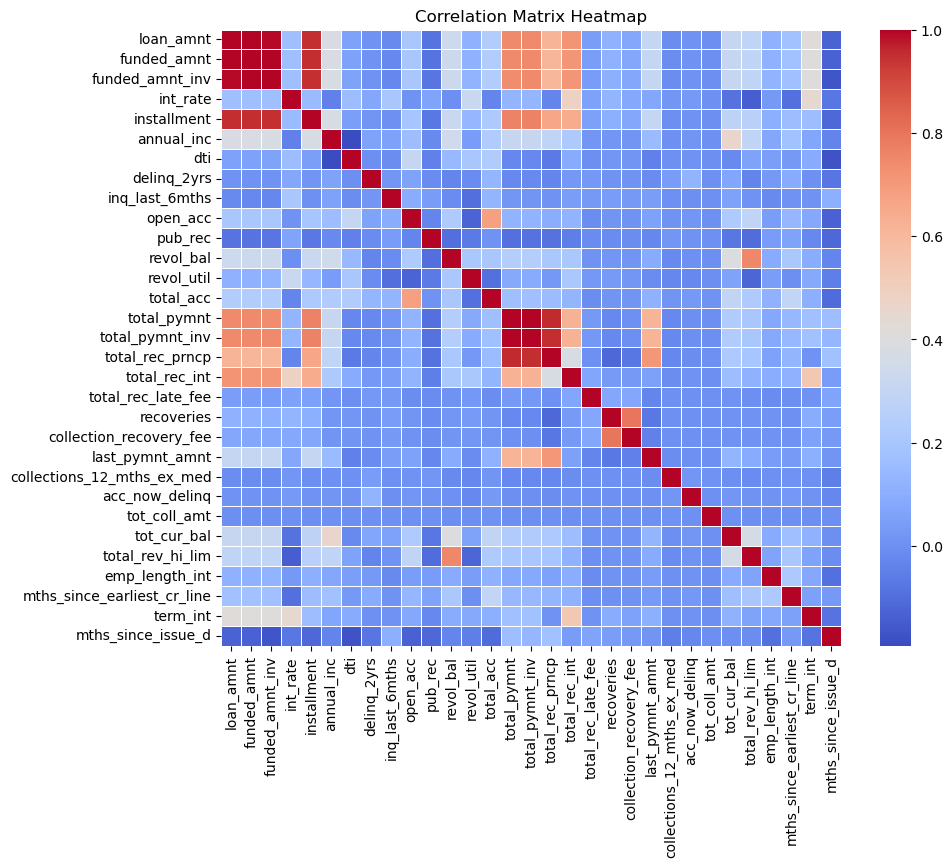

In [26]:
plot_correlation_heatmap(correlation_df)

In [27]:
imputed_df['installment'].value_counts(dropna= False)

327.34     875
336.90     808
332.10     677
491.01     613
392.81     596
          ... 
98.90        1
1175.13      1
258.86       1
679.92       1
464.48       1
Name: installment, Length: 48839, dtype: int64

In [28]:
columns_to_drop_3 = ['funded_amnt','funded_amnt_inv']

imputed_df.drop(columns=columns_to_drop_3, inplace= True)

imputed_df.shape

(326399, 163)

In [29]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    # Ensure that the input dataframe contains only numerical columns
    numeric_df = df.select_dtypes(include=['number'])

    # Create an empty DataFrame to store VIF values
    vif_data = pd.DataFrame()
    vif_data['Column Name'] = numeric_df.columns
    
    # Calculate VIF for each feature
    vif_data['VIF Value'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
    
    return vif_data

In [30]:
# Example usage:
vif_df = calculate_vif(correlation_df)
print(vif_df)


                    Column Name     VIF Value
0                     loan_amnt  1.391027e+03
1                   funded_amnt  5.194825e+03
2               funded_amnt_inv  3.576956e+03
3                      int_rate  3.453471e+01
4                   installment  1.739435e+02
5                    annual_inc  4.465686e+00
6                           dti  7.672077e+00
7                   delinq_2yrs  1.210196e+00
8                inq_last_6mths  1.772292e+00
9                      open_acc  1.263936e+01
10                      pub_rec  1.165223e+00
11                    revol_bal  5.011998e+00
12                   revol_util  9.772175e+00
13                    total_acc  1.246600e+01
14                  total_pymnt  1.286743e+14
15              total_pymnt_inv  2.477635e+03
16              total_rec_prncp  8.188363e+13
17                total_rec_int  8.225753e+12
18           total_rec_late_fee  1.795360e+07
19                   recoveries  1.995304e+11
20      collection_recovery_fee  2

In [31]:
# On-going performance related variables to be dropped as we want to predict default probability before the loan is booked

columns_to_drop_4 = ['total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp','recoveries','collection_recovery_fee']

imputed_df.drop(columns = columns_to_drop_4,inplace = True)

imputed_df.shape


(326399, 156)

# Feature Engineering

In [32]:
imputed_df.columns.values

array(['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'emp_length_int',
       'mths_since_earliest_cr_line', 'term_int', 'mths_since_issue_d',
       'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'sub_grade:A1', 'sub_grade:A2', 'sub_grade:A3',
       'sub_grade:A4', 'sub_grade:A5', 'sub_grade:B1', 'sub_grade:B2',
       'sub_grade:B3', 'sub_grade:B4', 'sub_grade:B5', 'sub_grade:C1',
       'sub_grade:C2', 'sub_grade:C3', 'sub_grade:C4', 'sub_grade:C5',
       'sub_grade:D1', 'sub_grade:D2', 'sub_grade:D3', 'sub_grade:D4',
       'sub_grade:D5', 'sub_grade:E1'

## WOE and IV functions

In [33]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [34]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [35]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

### Discrete Variable Analysis

In [36]:
df_temp = woe_discrete(imputed_df, 'grade', loan_data_targets_train)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2283,0.721857,0.006995,1648.0,635.0,0.005667,0.017844,-1.147035,NaN,NaN,0.290186
1,F,9205,0.754481,0.028202,6945.0,2260.0,0.023881,0.063508,-0.978071,0.032624,0.168964,0.290186
2,E,25001,0.805608,0.076596,20141.0,4860.0,0.069258,0.136571,-0.679009,0.051127,0.299062,0.290186
3,D,53839,0.846895,0.164948,45596.0,8243.0,0.156788,0.231636,-0.390273,0.041288,0.288737,0.290186
4,C,87820,0.885789,0.269057,77790.0,10030.0,0.267491,0.281852,-0.052296,0.038894,0.337977,0.290186
5,B,95831,0.921539,0.293601,88312.0,7519.0,0.303673,0.211291,0.362715,0.035750,0.415011,0.290186
6,A,52420,0.961103,0.160601,50381.0,2039.0,0.173242,0.057298,1.106426,0.039564,0.743712,0.290186


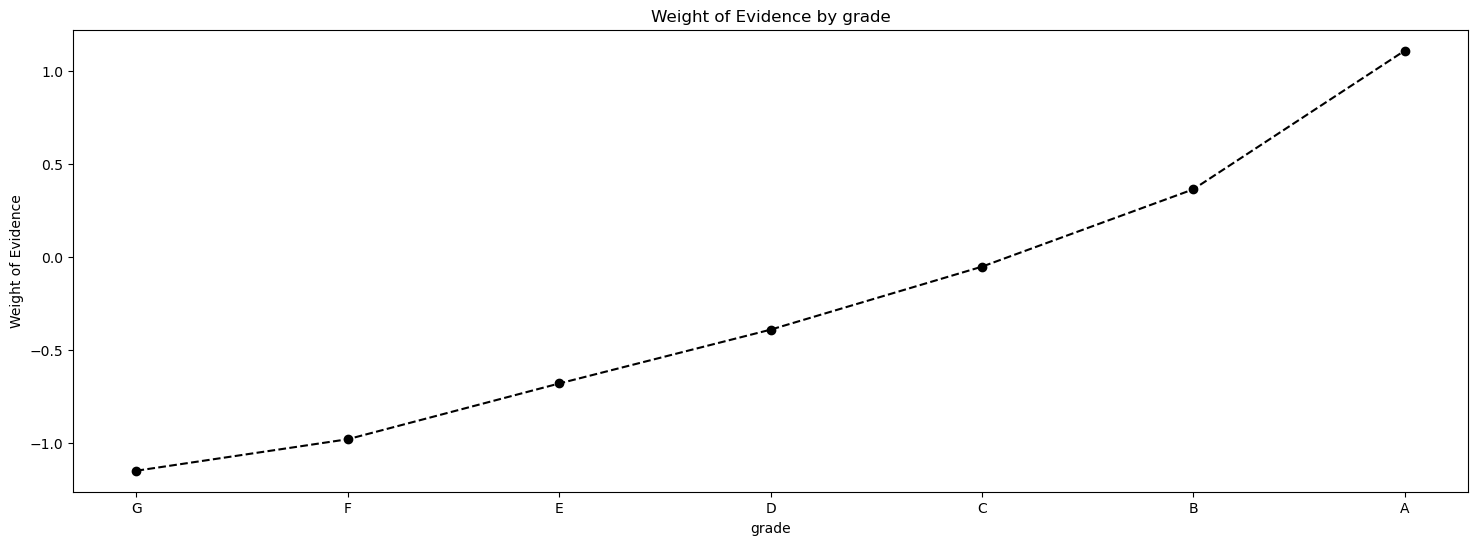

In [37]:
plot_by_woe(df_temp)

In [38]:
df_temp = woe_discrete(imputed_df, 'sub_grade', loan_data_targets_train)
df_temp

,sub_grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G3,390,0.694872,0.001195,271.0,119.0,0.000932,0.003344,-1.277733,NaN,NaN,0.314266
1,G1,761,0.709593,0.002332,540.0,221.0,0.001857,0.006210,-1.207322,0.014721,0.070411,0.314266
2,F5,1062,0.711864,0.003254,756.0,306.0,0.002600,0.008599,-1.196272,0.002272,0.011050,0.314266
3,G5,255,0.729412,0.000781,186.0,69.0,0.000640,0.001939,-1.109088,0.017547,0.087184,0.314266
4,F4,1439,0.737318,0.004409,1061.0,378.0,0.003648,0.010622,-1.068655,0.007906,0.040433,0.314266
5,G2,581,0.741824,0.001780,431.0,150.0,0.001482,0.004215,-1.045255,0.004507,0.023400,0.314266
6,G4,296,0.743243,0.000907,220.0,76.0,0.000756,0.002136,-1.037834,0.001419,0.007421,0.314266
7,F3,1868,0.746253,0.005723,1394.0,474.0,0.004793,0.013320,-1.022003,0.003009,0.015831,0.314266
8,F2,2057,0.757414,0.006302,1558.0,499.0,0.005357,0.014022,-0.962176,0.011161,0.059827,0.314266
9,E5,3580,0.780447,0.010968,2794.0,786.0,0.009608,0.022087,-0.832455,0.023033,0.129721,0.314266


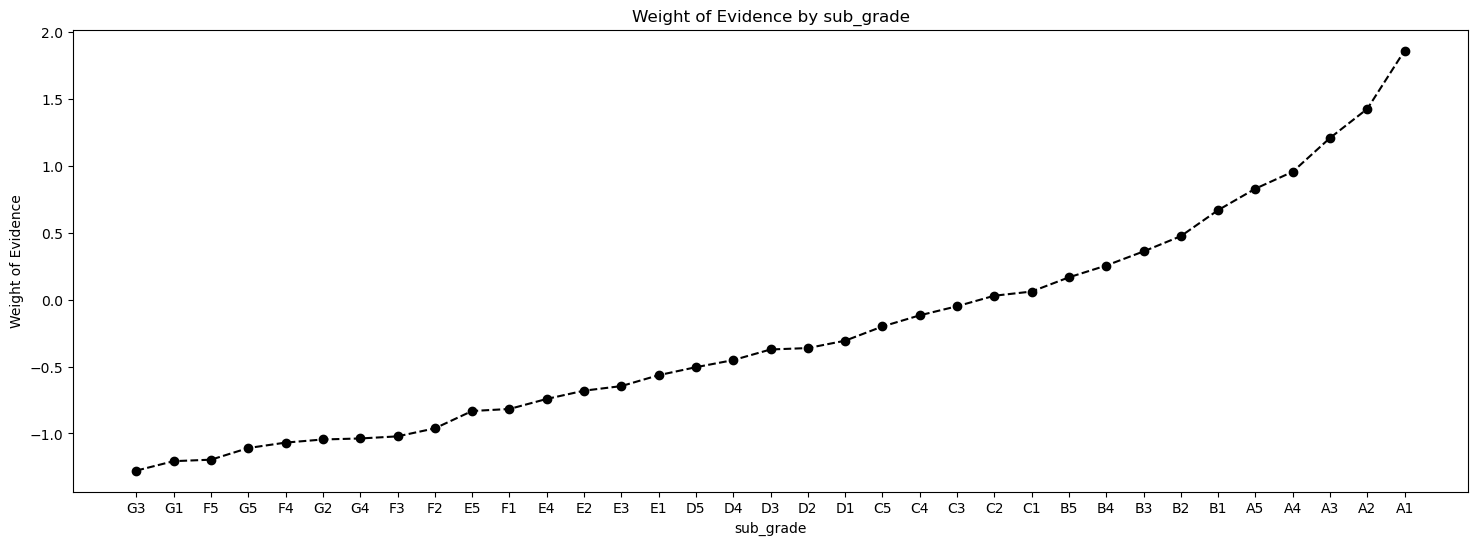

In [39]:
plot_by_woe(df_temp)

In [40]:
df_temp = woe_discrete(imputed_df, 'home_ownership', loan_data_targets_train)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,121,0.801653,0.000371,97.0,24.0,0.000334,0.000674,-0.704071,NaN,NaN,0.021441
1,NONE,34,0.823529,0.000104,28.0,6.0,0.000096,0.000169,-0.560283,0.021877,0.143788,0.021441
2,RENT,131606,0.874132,0.403206,115041.0,16565.0,0.395584,0.465492,-0.162732,0.050602,0.397552,0.021441
3,OWN,29256,0.893150,0.089633,26130.0,3126.0,0.089852,0.087844,0.022602,0.019018,0.185333,0.021441
4,MORTGAGE,165382,0.904071,0.506687,149517.0,15865.0,0.514135,0.445821,0.142567,0.010920,0.119965,0.021441


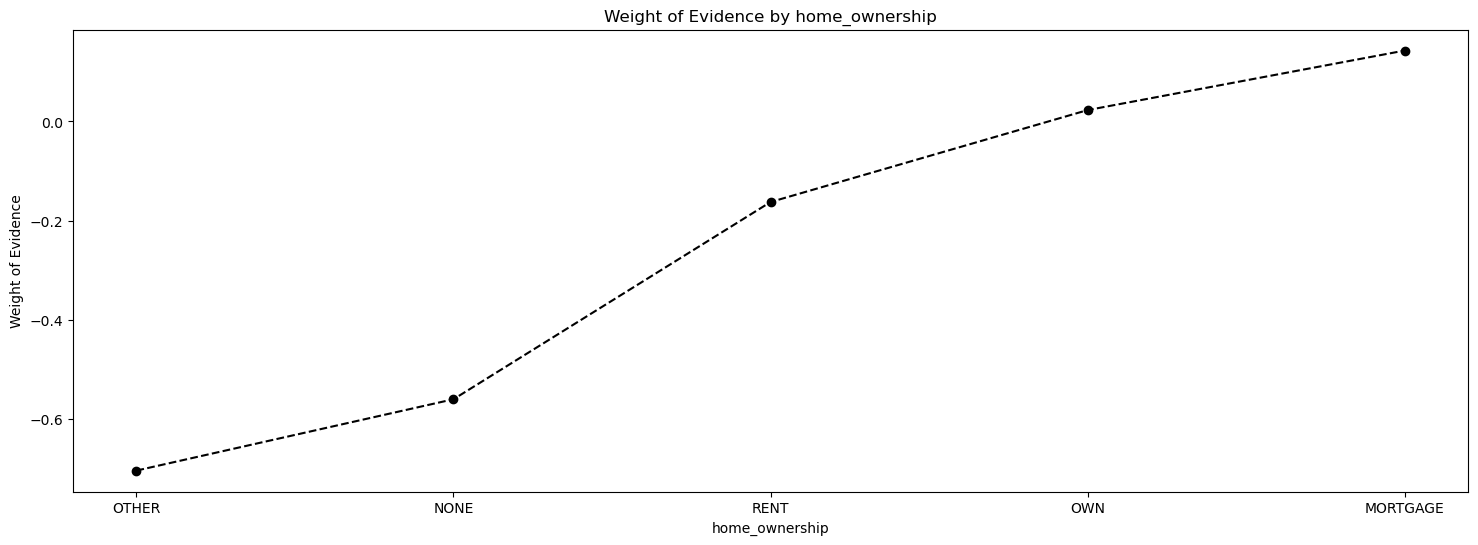

In [41]:
plot_by_woe(df_temp)

In [42]:
imputed_df['home_ownership:RENT_OTHER_NONE_ANY'] = sum([imputed_df['home_ownership:RENT'], imputed_df['home_ownership:OTHER'],
                                                            imputed_df['home_ownership:NONE'], imputed_df['home_ownership:ANY']])

In [43]:
df_temp = woe_discrete(imputed_df, 'verification_status', loan_data_targets_train)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,117690,0.872980,0.360571,102741.0,14949.0,0.353289,0.420081,-0.173161,NaN,NaN,0.020874
1,Source Verified,104994,0.896032,0.321674,94078.0,10916.0,0.323500,0.306750,0.053166,0.023052,0.226328,0.020874
2,Not Verified,103715,0.906272,0.317755,93994.0,9721.0,0.323211,0.273169,0.168214,0.010240,0.115048,0.020874


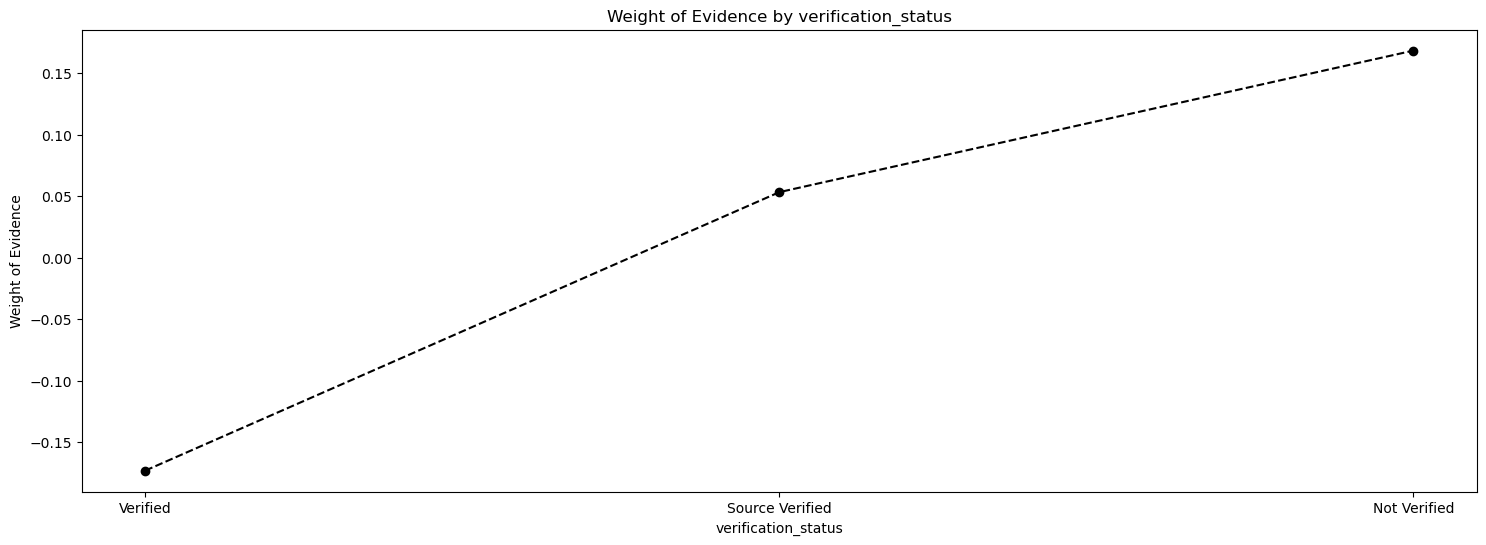

In [44]:
plot_by_woe(df_temp)

In [45]:
df_temp = woe_discrete(imputed_df, 'purpose', loan_data_targets_train)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,4861,0.785641,0.014893,3819.0,1042.0,0.013132,0.029281,-0.801881,NaN,NaN,0.035394
1,educational,288,0.798611,0.000882,230.0,58.0,0.000791,0.001630,-0.723092,0.012970,0.078790,0.035394
2,moving,2109,0.838312,0.006461,1768.0,341.0,0.006080,0.009582,-0.455006,0.039701,0.268085,0.035394
3,house,1602,0.860799,0.004908,1379.0,223.0,0.004742,0.006267,-0.278786,0.022487,0.176220,0.035394
4,other,16526,0.862217,0.050631,14249.0,2277.0,0.048997,0.063986,-0.266900,0.001418,0.011886,0.035394
5,renewable_energy,251,0.868526,0.000769,218.0,33.0,0.000750,0.000927,-0.212741,0.006309,0.054160,0.035394
6,medical,3217,0.870687,0.009856,2801.0,416.0,0.009632,0.011690,-0.193682,0.002161,0.019059,0.035394
7,wedding,1638,0.882173,0.005018,1445.0,193.0,0.004969,0.005423,-0.087554,0.011486,0.106128,0.035394
8,vacation,1775,0.882254,0.005438,1566.0,209.0,0.005385,0.005873,-0.086783,0.000080,0.000771,0.035394
9,debt_consolidation,191765,0.887315,0.587517,170156.0,21609.0,0.585105,0.607233,-0.037122,0.005062,0.049660,0.035394


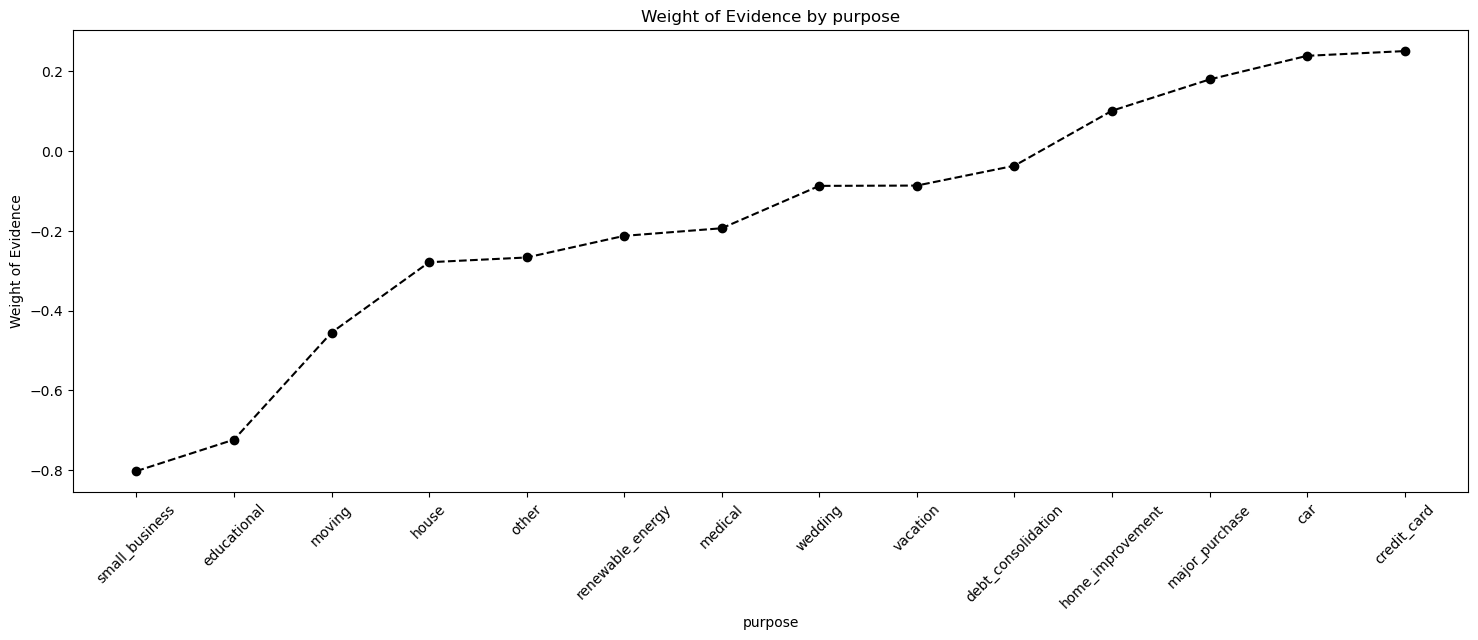

In [46]:
plot_by_woe(df_temp,rotation_of_x_axis_labels=45)

In [47]:
imputed_df['purpose:sm_b_edu_mov'] = sum([imputed_df['purpose:educational'], imputed_df['purpose:small_business'],
                                         imputed_df['purpose:moving']])

imputed_df['purpose:house_other_ren_en_med'] = sum([imputed_df['purpose:house'], imputed_df['purpose:other'],
                                         imputed_df['purpose:renewable_energy'],imputed_df['purpose:medical']])

imputed_df['purpose:wedding_vaccation_debt'] = sum([imputed_df['purpose:wedding'], imputed_df['purpose:vacation'],
                                         imputed_df['purpose:debt_consolidation']])

imputed_df['purpose:home_improv_major_purchase_car_credit_card'] = sum([imputed_df['purpose:home_improvement'], imputed_df['purpose:major_purchase'],
                                         imputed_df['purpose:car'],imputed_df['purpose:credit_card']])


In [48]:
df_temp = woe_discrete(imputed_df, 'initial_list_status', loan_data_targets_train)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,212255,0.880262,0.650293,186840.0,25415.0,0.642475,0.714185,-0.105815,NaN,NaN,0.023641
1,w,114144,0.910893,0.349707,103973.0,10171.0,0.357525,0.285815,0.223863,0.030631,0.329678,0.023641


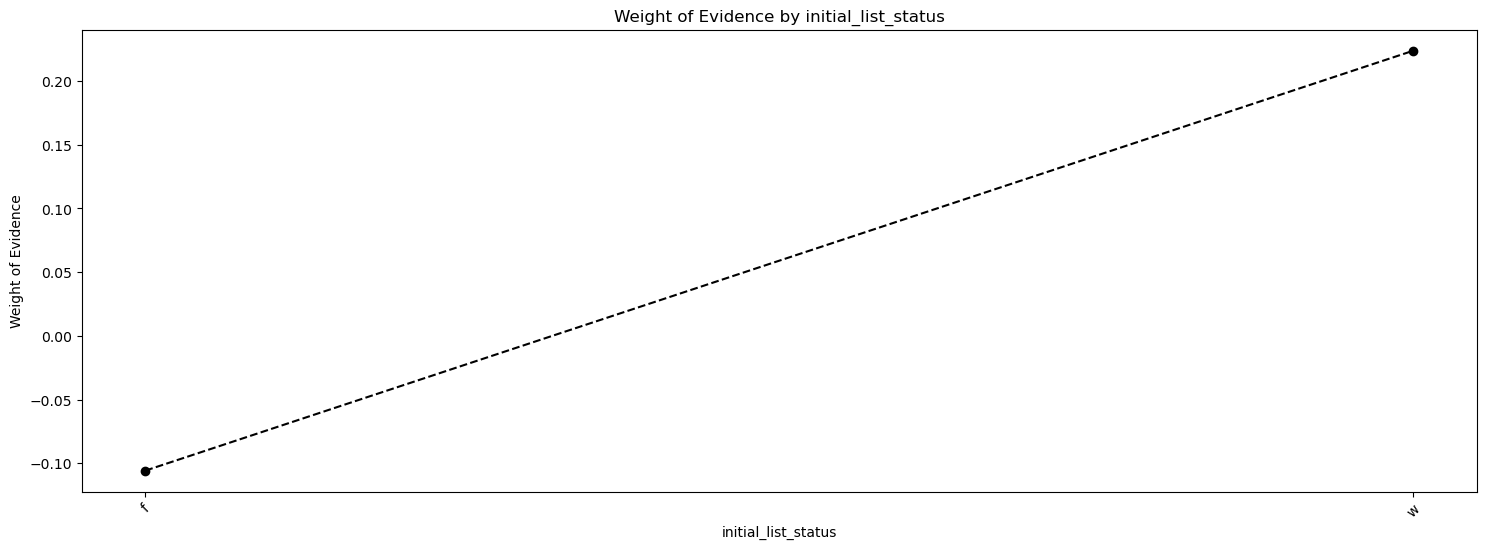

In [49]:
plot_by_woe(df_temp,rotation_of_x_axis_labels=45)

In [50]:
df_temp = woe_discrete(imputed_df, 'addr_state', loan_data_targets_train)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,12,0.500000,0.000037,6.0,6.0,0.000021,0.000169,-2.100728,NaN,NaN,inf
1,IA,11,0.727273,0.000034,8.0,3.0,0.000028,0.000084,-1.119899,0.227273,0.980829,inf
2,NV,4589,0.864676,0.014059,3968.0,621.0,0.013645,0.017451,-0.246042,0.137404,0.873857,inf
3,FL,22028,0.875885,0.067488,19294.0,2734.0,0.066345,0.076828,-0.146700,0.011209,0.099342,inf
4,AL,4085,0.876132,0.012515,3579.0,506.0,0.012307,0.014219,-0.144426,0.000247,0.002274,inf
5,HI,1761,0.877910,0.005395,1546.0,215.0,0.005316,0.006042,-0.127940,0.001778,0.016486,inf
6,TN,4226,0.880738,0.012947,3722.0,504.0,0.012799,0.014163,-0.101288,0.002828,0.026652,inf
7,NM,1777,0.881261,0.005444,1566.0,211.0,0.005385,0.005929,-0.096306,0.000522,0.004982,inf
8,VA,9912,0.883374,0.030368,8756.0,1156.0,0.030109,0.032485,-0.075955,0.002113,0.020352,inf
9,OK,2848,0.883427,0.008726,2516.0,332.0,0.008652,0.009330,-0.075437,0.000053,0.000517,inf


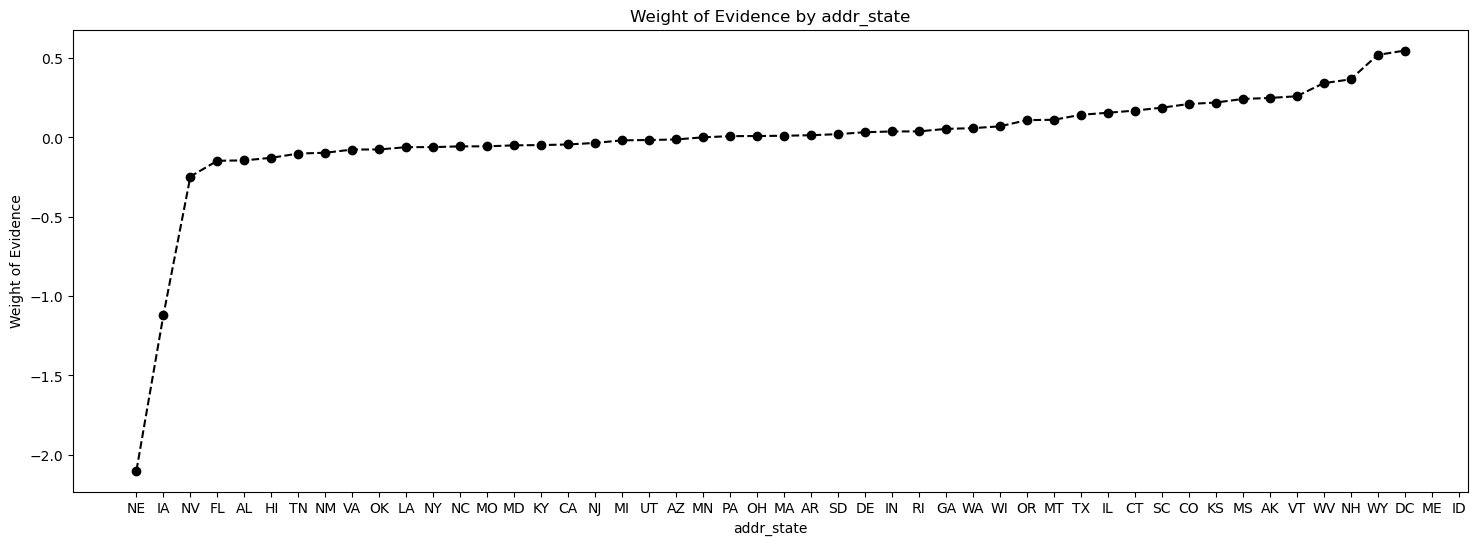

In [51]:
plot_by_woe(df_temp)

In [52]:
if ['addr_state:ND'] in imputed_df.columns.values:
    pass
else:
    imputed_df['addr_state:ND'] = 0

In [53]:
imputed_df['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([imputed_df['addr_state:ND'], imputed_df['addr_state:NE'],
                                                         imputed_df['addr_state:IA'], imputed_df['addr_state:NV'],
                                                         imputed_df['addr_state:FL'], imputed_df['addr_state:HI'],
                                                         imputed_df['addr_state:AL']])

imputed_df['addr_state:NM_VA'] = sum([imputed_df['addr_state:NM'], imputed_df['addr_state:VA']])

imputed_df['addr_state:OK_TN_MO_LA_MD_NC'] = sum([imputed_df['addr_state:OK'], imputed_df['addr_state:TN'],
                                              imputed_df['addr_state:MO'], imputed_df['addr_state:LA'],
                                              imputed_df['addr_state:MD'], imputed_df['addr_state:NC']])

imputed_df['addr_state:UT_KY_AZ_NJ'] = sum([imputed_df['addr_state:UT'], imputed_df['addr_state:KY'],
                                              imputed_df['addr_state:AZ'], imputed_df['addr_state:NJ']])

imputed_df['addr_state:AR_MI_PA_OH_MN'] = sum([imputed_df['addr_state:AR'], imputed_df['addr_state:MI'],
                                              imputed_df['addr_state:PA'], imputed_df['addr_state:OH'],
                                              imputed_df['addr_state:MN']])

imputed_df['addr_state:RI_MA_DE_SD_IN'] = sum([imputed_df['addr_state:RI'], imputed_df['addr_state:MA'],
                                              imputed_df['addr_state:DE'], imputed_df['addr_state:SD'],
                                              imputed_df['addr_state:IN']])

imputed_df['addr_state:GA_WA_OR'] = sum([imputed_df['addr_state:GA'], imputed_df['addr_state:WA'],
                                              imputed_df['addr_state:OR']])

imputed_df['addr_state:WI_MT'] = sum([imputed_df['addr_state:WI'], imputed_df['addr_state:MT']])

imputed_df['addr_state:IL_CT'] = sum([imputed_df['addr_state:IL'], imputed_df['addr_state:CT']])

imputed_df['addr_state:KS_SC_CO_VT_AK_MS'] = sum([imputed_df['addr_state:KS'], imputed_df['addr_state:SC'],
                                              imputed_df['addr_state:CO'], imputed_df['addr_state:VT'],
                                              imputed_df['addr_state:AK'], imputed_df['addr_state:MS']])

imputed_df['addr_state:WV_NH_WY_DC_ME_ID'] = sum([imputed_df['addr_state:WV'], imputed_df['addr_state:NH'],
                                              imputed_df['addr_state:WY'], imputed_df['addr_state:DC'],
                                              imputed_df['addr_state:ME'], imputed_df['addr_state:ID']])

### Continuous Variable Analysis

In [54]:
imputed_df.columns.values

array(['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'emp_length_int',
       'mths_since_earliest_cr_line', 'term_int', 'mths_since_issue_d',
       'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'sub_grade:A1', 'sub_grade:A2', 'sub_grade:A3',
       'sub_grade:A4', 'sub_grade:A5', 'sub_grade:B1', 'sub_grade:B2',
       'sub_grade:B3', 'sub_grade:B4', 'sub_grade:B5', 'sub_grade:C1',
       'sub_grade:C2', 'sub_grade:C3', 'sub_grade:C4', 'sub_grade:C5',
       'sub_grade:D1', 'sub_grade:D2', 'sub_grade:D3', 'sub_grade:D4',
       'sub_grade:D5', 'sub_grade:E1'

In [55]:
df_temp = woe_ordered_continuous(imputed_df, 'term_int', loan_data_targets_train)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,236703,0.903415,0.725195,213841.0,22862.0,0.735321,0.642444,0.135028,NaN,NaN,0.040477
1,60,89696,0.858143,0.274805,76972.0,12724.0,0.264679,0.357556,-0.300776,0.045272,0.435805,0.040477


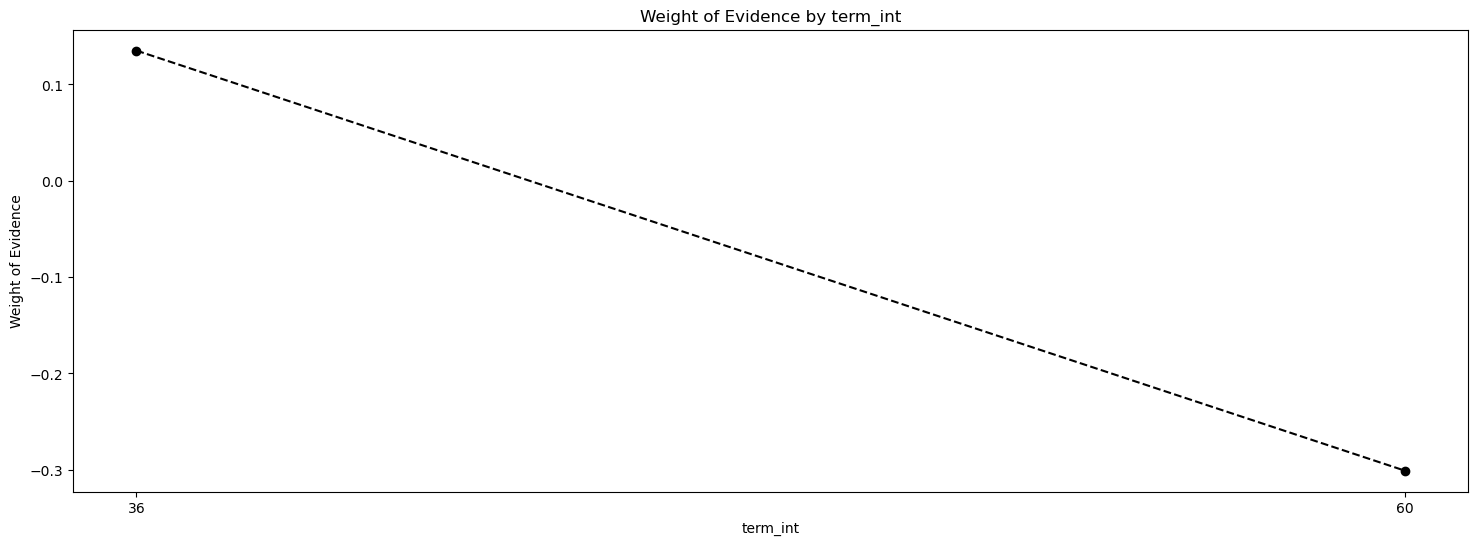

In [56]:
plot_by_woe(df_temp)

In [57]:
imputed_df['term:36'] = np.where((imputed_df['term_int'] == 36), 1, 0)
imputed_df['term:60'] = np.where((imputed_df['term_int'] == 60), 1, 0)

In [58]:
imputed_df['emp_length_int'].unique()

array([10.        ,  2.        ,  6.        ,  0.        ,  3.        ,
        1.        ,  8.        ,  4.        ,  7.        ,  5.99742073,
        5.        ,  9.        ])

In [59]:
import numpy as np

# Replace values close to 6 (e.g., 5.997...) with 6
imputed_df['emp_length_int'] = np.where(np.isclose(imputed_df['emp_length_int'], 5.99742073, atol=0.01), 6, imputed_df['emp_length_int'])

# Check the unique values again
print(imputed_df['emp_length_int'].unique())


[10.  2.  6.  0.  3.  1.  8.  4.  7.  5.  9.]


In [60]:
df_temp = woe_ordered_continuous(imputed_df, 'emp_length_int', loan_data_targets_train)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,25314,0.880935,0.077555,22300.0,3014.0,0.076682,0.084696,-0.099410,NaN,NaN,0.006544
1,1.0,20716,0.888492,0.063468,18406.0,2310.0,0.063292,0.064913,-0.025299,0.007557,0.074111,0.006544
2,2.0,29003,0.892149,0.088858,25875.0,3128.0,0.088975,0.087900,0.012155,0.003657,0.037454,0.006544
3,3.0,25539,0.890834,0.078245,22751.0,2788.0,0.078232,0.078345,-0.001444,0.001315,0.013599,0.006544
4,4.0,19650,0.891247,0.060202,17513.0,2137.0,0.060221,0.060052,0.002812,0.000413,0.004256,0.006544
5,5.0,21495,0.885787,0.065855,19040.0,2455.0,0.065472,0.068988,-0.052313,0.005459,0.055125,0.006544
6,6.0,32949,0.875535,0.100947,28848.0,4101.0,0.099198,0.115242,-0.149918,0.010252,0.097605,0.006544
7,7.0,18372,0.888254,0.056287,16319.0,2053.0,0.056115,0.057691,-0.027700,0.012719,0.122218,0.006544
8,8.0,15641,0.891056,0.047920,13937.0,1704.0,0.047924,0.047884,0.000841,0.002802,0.028541,0.006544
9,9.0,12450,0.888273,0.038143,11059.0,1391.0,0.038028,0.039088,-0.027506,0.002782,0.028347,0.006544


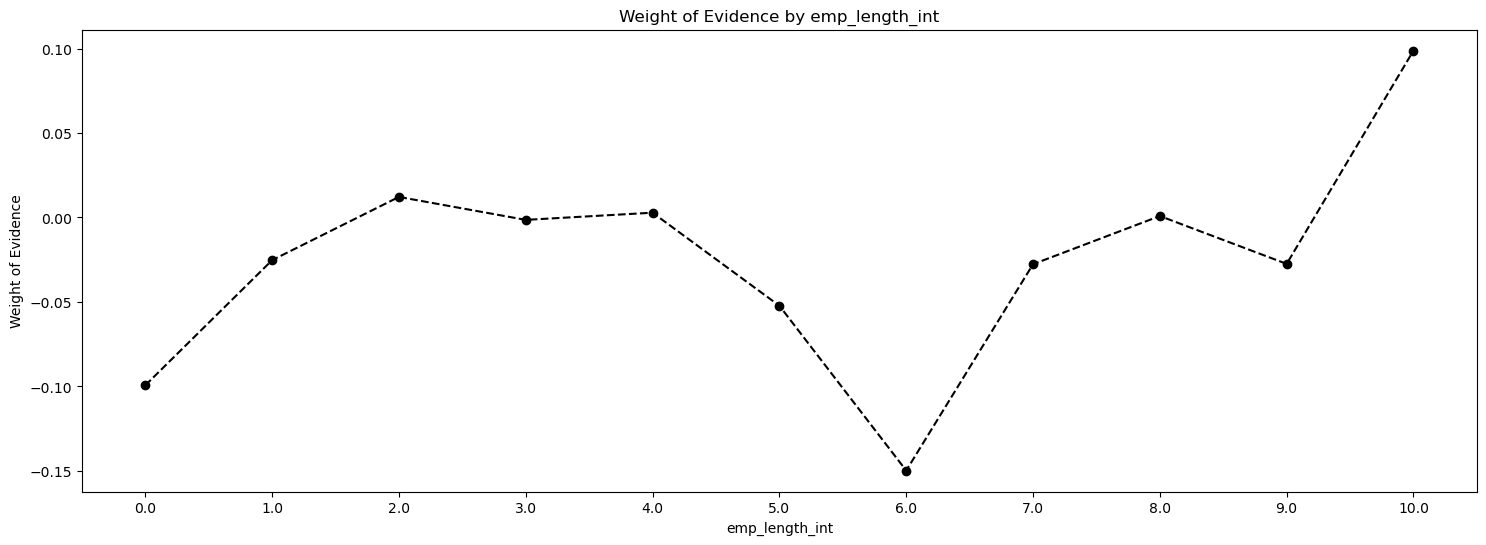

In [61]:
plot_by_woe(df_temp)

In [62]:
# Grouping employment length based on revised categories
imputed_df['emp_length:0-2'] = np.where(imputed_df['emp_length_int'].isin(range(0, 3)), 1, 0)
imputed_df['emp_length:3-6'] = np.where(imputed_df['emp_length_int'].isin(range(3, 7)), 1, 0)
imputed_df['emp_length:7-9'] = np.where(imputed_df['emp_length_int'].isin(range(7, 10)), 1, 0)
imputed_df['emp_length:10+'] = np.where(imputed_df['emp_length_int'] >= 10, 1, 0)

In [63]:
imputed_df['annual_inc_factor'] = pd.cut(imputed_df['annual_inc'], 100)

In [64]:
df_temp = woe_ordered_continuous(imputed_df, 'annual_inc_factor', loan_data_targets_train)
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5243.882, 73294.82]",202707,0.876393,0.621041,177651.0,25056.0,0.610877,0.704097,-0.142021,NaN,NaN,inf
1,"(73294.82, 144693.64]",105143,0.912909,0.322130,95986.0,9157.0,0.330061,0.257320,0.248956,0.036516,0.390976,inf
2,"(144693.64, 216092.46]",13946,0.925713,0.042727,12910.0,1036.0,0.044393,0.029113,0.421907,0.012804,0.172951,inf
3,"(216092.46, 287491.28]",2762,0.925054,0.008462,2555.0,207.0,0.008786,0.005817,0.412361,0.000659,0.009546,inf
4,"(287491.28, 358890.1]",960,0.926042,0.002941,889.0,71.0,0.003057,0.001995,0.426689,0.000987,0.014329,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(6784783.9, 6856182.72]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
96,"(6856182.72, 6927581.54]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
97,"(6927581.54, 6998980.36]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
98,"(6998980.36, 7070379.18]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


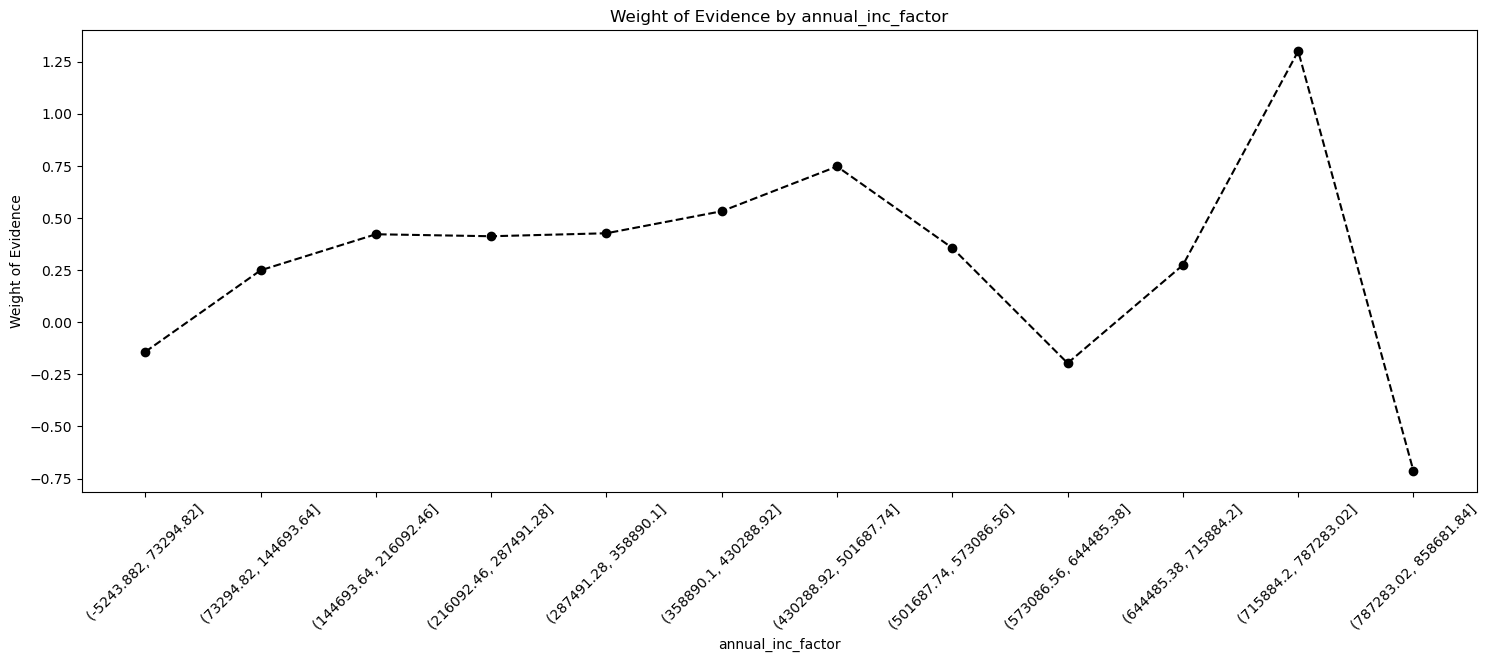

In [65]:
plot_by_woe(df_temp,45)

In [66]:
imputed_df['annual_inc:<30K'] = np.where((imputed_df['annual_inc'] <= 30000), 1, 0)
imputed_df['annual_inc:30K-40K'] = np.where((imputed_df['annual_inc'] > 30000) & (imputed_df['annual_inc'] <= 40000), 1, 0)
imputed_df['annual_inc:40K-50K'] = np.where((imputed_df['annual_inc'] > 40000) & (imputed_df['annual_inc'] <= 50000), 1, 0)
imputed_df['annual_inc:50K-60K'] = np.where((imputed_df['annual_inc'] > 50000) & (imputed_df['annual_inc'] <= 60000), 1, 0)
imputed_df['annual_inc:60K-70K'] = np.where((imputed_df['annual_inc'] > 60000) & (imputed_df['annual_inc'] <= 70000), 1, 0)
imputed_df['annual_inc:70K-80K'] = np.where((imputed_df['annual_inc'] > 70000) & (imputed_df['annual_inc'] <= 80000), 1, 0)
imputed_df['annual_inc:80K-90K'] = np.where((imputed_df['annual_inc'] > 80000) & (imputed_df['annual_inc'] <= 90000), 1, 0)
imputed_df['annual_inc:90K-100K'] = np.where((imputed_df['annual_inc'] > 90000) & (imputed_df['annual_inc'] <= 100000), 1, 0)
imputed_df['annual_inc:100K-120K'] = np.where((imputed_df['annual_inc'] > 100000) & (imputed_df['annual_inc'] <= 120000), 1, 0)
imputed_df['annual_inc:120K-140K'] = np.where((imputed_df['annual_inc'] > 120000) & (imputed_df['annual_inc'] <= 140000), 1, 0)
imputed_df['annual_inc:>140K'] = np.where((imputed_df['annual_inc'] > 140000), 1, 0)

In [67]:
imputed_df.columns.values

array(['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'emp_length_int',
       'mths_since_earliest_cr_line', 'term_int', 'mths_since_issue_d',
       'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'sub_grade:A1', 'sub_grade:A2', 'sub_grade:A3',
       'sub_grade:A4', 'sub_grade:A5', 'sub_grade:B1', 'sub_grade:B2',
       'sub_grade:B3', 'sub_grade:B4', 'sub_grade:B5', 'sub_grade:C1',
       'sub_grade:C2', 'sub_grade:C3', 'sub_grade:C4', 'sub_grade:C5',
       'sub_grade:D1', 'sub_grade:D2', 'sub_grade:D3', 'sub_grade:D4',
       'sub_grade:D5', 'sub_grade:E1'

In [68]:
imputed_df['dti'].unique()

array([23.62, 32.4 , 12.91, ..., 35.9 , 38.85, 37.99])

In [69]:
imputed_df['dti_factor'] = pd.cut(imputed_df['dti'], 100)
df_temp = woe_ordered_continuous(imputed_df, 'dti_factor', loan_data_targets_train)
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.4]",646,0.877709,0.001979,567.0,79.0,0.001950,0.002220,-0.129817,NaN,NaN,0.02745
1,"(0.4, 0.8]",710,0.921127,0.002175,654.0,56.0,0.002249,0.001574,0.357028,0.043418,0.486844,0.02745
2,"(0.8, 1.2]",783,0.888889,0.002399,696.0,87.0,0.002393,0.002445,-0.021287,0.032238,0.378314,0.02745
3,"(1.2, 1.6]",917,0.899673,0.002809,825.0,92.0,0.002837,0.002585,0.092867,0.010784,0.114153,0.02745
4,"(1.6, 2.0]",1036,0.905405,0.003174,938.0,98.0,0.003225,0.002754,0.158054,0.005733,0.065188,0.02745
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(37.991, 38.39]",188,0.861702,0.000576,162.0,26.0,0.000557,0.000731,-0.271228,0.051341,0.521875,0.02745
96,"(38.39, 38.79]",171,0.871345,0.000524,149.0,22.0,0.000512,0.000618,-0.187824,0.009643,0.083404,0.02745
97,"(38.79, 39.19]",168,0.869048,0.000515,146.0,22.0,0.000502,0.000618,-0.208164,0.002297,0.020340,0.02745
98,"(39.19, 39.59]",158,0.924051,0.000484,146.0,12.0,0.000502,0.000337,0.397972,0.055003,0.606136,0.02745


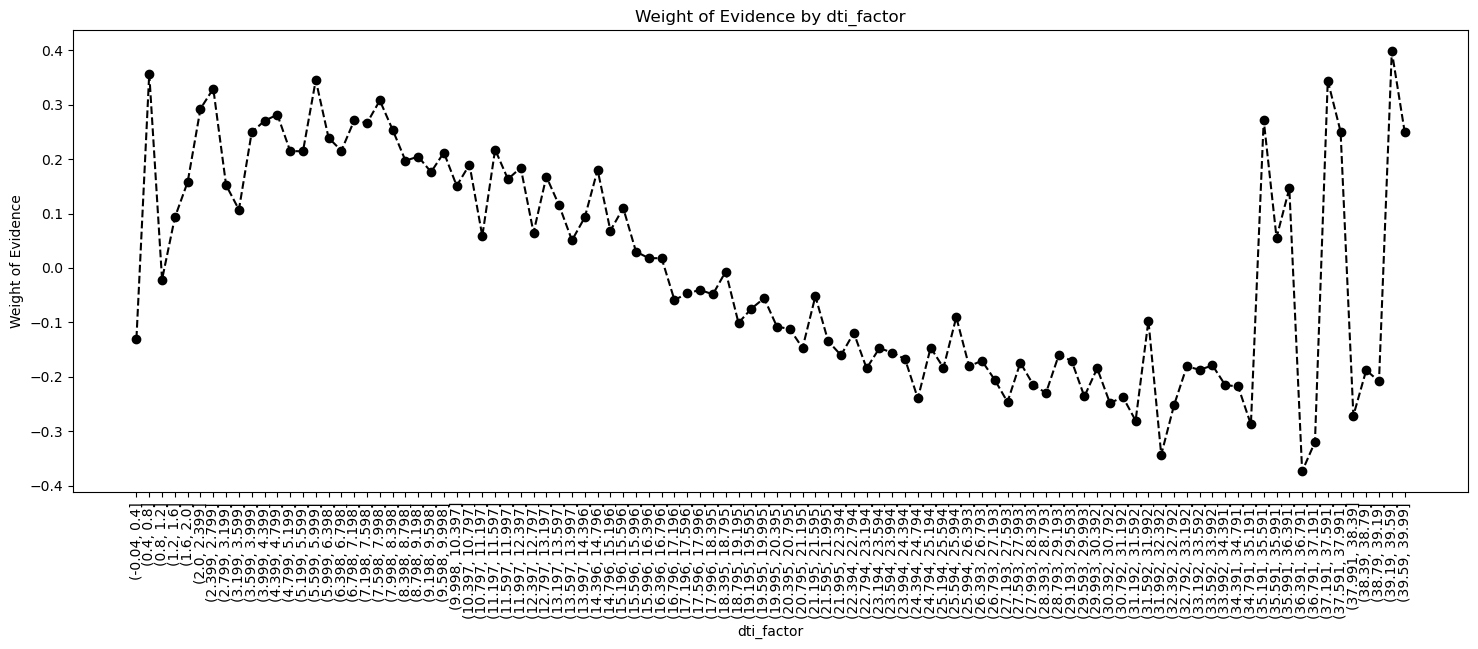

In [70]:
plot_by_woe(df_temp, 90)

In [71]:
df_inputs_prepr_temp = imputed_df.loc[imputed_df['dti'] <= 35, : ]

In [72]:
imputed_df['dti:<=1.4'] = np.where((imputed_df['dti'] <= 1.4), 1, 0)
imputed_df['dti:1.4-3.5'] = np.where((imputed_df['dti'] > 1.4) & (imputed_df['dti'] <= 3.5), 1, 0)
imputed_df['dti:3.5-7.7'] = np.where((imputed_df['dti'] > 3.5) & (imputed_df['dti'] <= 7.7), 1, 0)
imputed_df['dti:7.7-10.5'] = np.where((imputed_df['dti'] > 7.7) & (imputed_df['dti'] <= 10.5), 1, 0)
imputed_df['dti:10.5-16.1'] = np.where((imputed_df['dti'] > 10.5) & (imputed_df['dti'] <= 16.1), 1, 0)
imputed_df['dti:16.1-20.3'] = np.where((imputed_df['dti'] > 16.1) & (imputed_df['dti'] <= 20.3), 1, 0)
imputed_df['dti:20.3-21.7'] = np.where((imputed_df['dti'] > 20.3) & (imputed_df['dti'] <= 21.7), 1, 0)
imputed_df['dti:21.7-22.4'] = np.where((imputed_df['dti'] > 21.7) & (imputed_df['dti'] <= 22.4), 1, 0)
imputed_df['dti:22.4-35'] = np.where((imputed_df['dti'] > 22.4) & (imputed_df['dti'] <= 35), 1, 0)
imputed_df['dti:>35'] = np.where((imputed_df['dti'] > 35), 1, 0)

In [73]:
imputed_df.columns.values

array(['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'emp_length_int',
       'mths_since_earliest_cr_line', 'term_int', 'mths_since_issue_d',
       'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'sub_grade:A1', 'sub_grade:A2', 'sub_grade:A3',
       'sub_grade:A4', 'sub_grade:A5', 'sub_grade:B1', 'sub_grade:B2',
       'sub_grade:B3', 'sub_grade:B4', 'sub_grade:B5', 'sub_grade:C1',
       'sub_grade:C2', 'sub_grade:C3', 'sub_grade:C4', 'sub_grade:C5',
       'sub_grade:D1', 'sub_grade:D2', 'sub_grade:D3', 'sub_grade:D4',
       'sub_grade:D5', 'sub_grade:E1'

In [74]:
imputed_df['delinq_2yrs'].unique()

array([ 0.        ,  1.        ,  2.        ,  4.        ,  3.        ,
        8.        ,  5.        , 11.        , 10.        , 12.        ,
       14.        ,  7.        ,  6.        ,  9.        , 13.        ,
       17.        ,  0.28400811, 19.        , 15.        , 16.        ,
       22.        , 18.        , 21.        , 29.        ])

In [75]:
imputed_df['delinq_2yrs'] = np.where(np.isclose(imputed_df['delinq_2yrs'], 0.284008110, atol=0.1), 0, imputed_df['delinq_2yrs'])

In [76]:
imputed_df['delinq_2yrs'].unique()

array([ 0.,  1.,  2.,  4.,  3.,  8.,  5., 11., 10., 12., 14.,  7.,  6.,
        9., 13., 17., 19., 15., 16., 22., 18., 21., 29.])

In [77]:
df_temp = woe_ordered_continuous(imputed_df, 'delinq_2yrs', loan_data_targets_train)
df_temp

,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,268142,0.890979,0.821516,238909.0,29233.0,0.821521,0.821475,0.000056,NaN,NaN,inf
1,1.0,39328,0.892875,0.120491,35115.0,4213.0,0.120748,0.118389,0.019725,0.001896,0.019669,inf
2,2.0,11476,0.888899,0.035159,10201.0,1275.0,0.035078,0.035829,-0.021189,0.003977,0.040914,inf
3,3.0,3956,0.883974,0.012120,3497.0,459.0,0.012025,0.012898,-0.070118,0.004925,0.048929,inf
4,4.0,1612,0.893300,0.004939,1440.0,172.0,0.004952,0.004833,0.024176,0.009327,0.094293,inf
5,5.0,857,0.877480,0.002626,752.0,105.0,0.002586,0.002951,-0.131952,0.015821,0.156128,inf
6,6.0,432,0.891204,0.001324,385.0,47.0,0.001324,0.001321,0.002368,0.013724,0.134320,inf
7,7.0,244,0.868852,0.000748,212.0,32.0,0.000729,0.000899,-0.209878,0.022351,0.212245,inf
8,8.0,131,0.893130,0.000401,117.0,14.0,0.000402,0.000393,0.022388,0.024277,0.232266,inf
9,9.0,76,0.868421,0.000233,66.0,10.0,0.000227,0.000281,-0.213658,0.024709,0.236047,inf


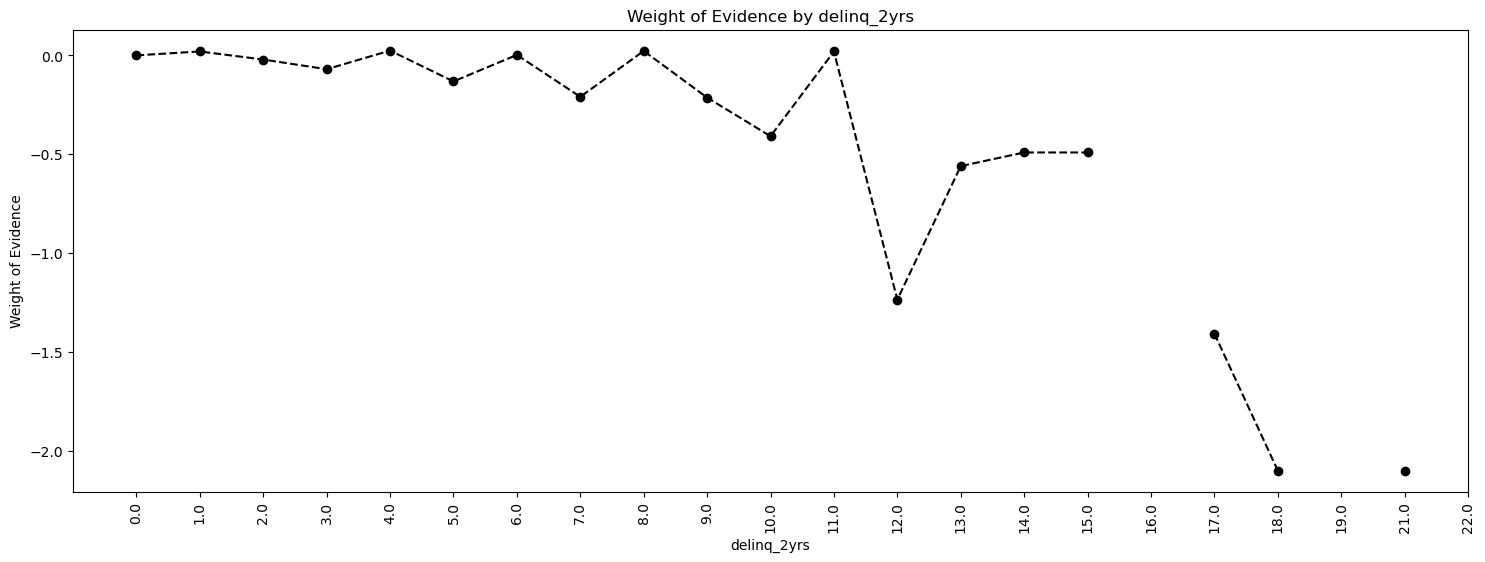

In [78]:
plot_by_woe(df_temp, 90)

In [79]:
imputed_df['delinq_2yrs:0'] = np.where((imputed_df['delinq_2yrs'] == 0), 1, 0)
imputed_df['delinq_2yrs:1-3'] = np.where((imputed_df['delinq_2yrs'] >= 1) & (imputed_df['delinq_2yrs'] <= 3), 1, 0)
imputed_df['delinq_2yrs:>=4'] = np.where((imputed_df['delinq_2yrs'] >= 9), 1, 0)

In [80]:
imputed_df.columns.values

array(['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'emp_length_int',
       'mths_since_earliest_cr_line', 'term_int', 'mths_since_issue_d',
       'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'sub_grade:A1', 'sub_grade:A2', 'sub_grade:A3',
       'sub_grade:A4', 'sub_grade:A5', 'sub_grade:B1', 'sub_grade:B2',
       'sub_grade:B3', 'sub_grade:B4', 'sub_grade:B5', 'sub_grade:C1',
       'sub_grade:C2', 'sub_grade:C3', 'sub_grade:C4', 'sub_grade:C5',
       'sub_grade:D1', 'sub_grade:D2', 'sub_grade:D3', 'sub_grade:D4',
       'sub_grade:D5', 'sub_grade:E1'

In [81]:
imputed_df['inq_last_6mths'].unique()

array([ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
        5.        ,  8.        ,  6.        , 13.        ,  7.        ,
       11.        , 10.        ,  9.        , 12.        , 15.        ,
       14.        , 20.        , 16.        , 24.        ,  0.80634724,
       17.        , 33.        , 18.        , 31.        , 19.        ,
       25.        , 27.        , 32.        ])

In [82]:
imputed_df['inq_last_6mths'] = np.where(np.isclose(imputed_df['inq_last_6mths'], 0.80634724, atol=0.1), 0, imputed_df['inq_last_6mths'])

In [83]:
imputed_df['inq_last_6mths'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  8.,  6., 13.,  7., 11., 10.,  9.,
       12., 15., 14., 20., 16., 24., 17., 33., 18., 31., 19., 25., 27.,
       32.])

In [84]:
df_temp = woe_ordered_continuous(imputed_df, 'inq_last_6mths', loan_data_targets_train)
df_temp

,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,168835,0.908816,0.517266,153440.0,15395.0,0.527624,0.432614,0.198539,NaN,NaN,inf
1,1.0,91268,0.885064,0.279621,80778.0,10490.0,0.277766,0.294779,-0.059446,0.023753,0.257985,inf
2,2.0,40512,0.865126,0.124118,35048.0,5464.0,0.120517,0.153544,-0.242191,0.019937,0.182745,inf
3,3.0,17565,0.839340,0.053815,14743.0,2822.0,0.050696,0.079301,-0.447406,0.025787,0.205215,inf
4,4.0,5069,0.845729,0.015530,4287.0,782.0,0.014741,0.021975,-0.399240,0.006389,0.048165,inf
5,5.0,1953,0.828981,0.005983,1619.0,334.0,0.005567,0.009386,-0.522305,0.016748,0.123065,inf
6,6.0,871,0.785304,0.002669,684.0,187.0,0.002352,0.005255,-0.803879,0.043677,0.281574,inf
7,7.0,134,0.649254,0.000411,87.0,47.0,0.000299,0.001321,-1.484968,0.136051,0.681089,inf
8,8.0,88,0.670455,0.000270,59.0,29.0,0.000203,0.000815,-1.390487,0.021201,0.094481,inf
9,9.0,38,0.684211,0.000116,26.0,12.0,0.000089,0.000337,-1.327538,0.013756,0.062948,inf


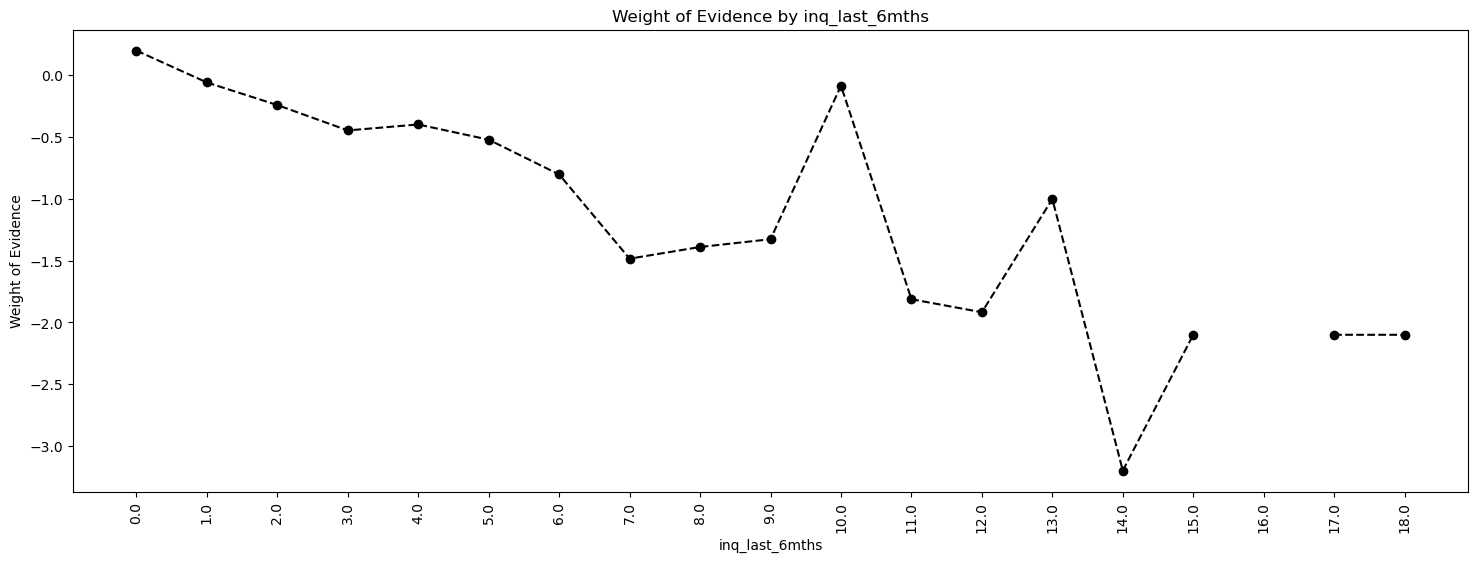

In [85]:
plot_by_woe(df_temp, 90)

In [86]:
imputed_df['inq_last_6mths:0'] = np.where((imputed_df['inq_last_6mths'] == 0), 1, 0)
imputed_df['inq_last_6mths:1-2'] = np.where((imputed_df['inq_last_6mths'] >= 1) & (imputed_df['inq_last_6mths'] <= 2), 1, 0)
imputed_df['inq_last_6mths:3-6'] = np.where((imputed_df['inq_last_6mths'] >= 3) & (imputed_df['inq_last_6mths'] <= 6), 1, 0)
imputed_df['inq_last_6mths:>6'] = np.where((imputed_df['inq_last_6mths'] > 6), 1, 0)

In [87]:
imputed_df.columns.values

array(['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'emp_length_int',
       'mths_since_earliest_cr_line', 'term_int', 'mths_since_issue_d',
       'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'sub_grade:A1', 'sub_grade:A2', 'sub_grade:A3',
       'sub_grade:A4', 'sub_grade:A5', 'sub_grade:B1', 'sub_grade:B2',
       'sub_grade:B3', 'sub_grade:B4', 'sub_grade:B5', 'sub_grade:C1',
       'sub_grade:C2', 'sub_grade:C3', 'sub_grade:C4', 'sub_grade:C5',
       'sub_grade:D1', 'sub_grade:D2', 'sub_grade:D3', 'sub_grade:D4',
       'sub_grade:D5', 'sub_grade:E1'

In [88]:
imputed_df['open_acc'].unique()

array([11.        , 15.        ,  9.        , 17.        , 14.        ,
        6.        ,  8.        ,  3.        , 19.        , 10.        ,
        7.        , 16.        ,  5.        , 18.        , 13.        ,
       12.        , 26.        ,  4.        , 21.        , 27.        ,
       22.        , 28.        , 25.        , 33.        , 53.        ,
       20.        , 32.        ,  2.        , 23.        , 34.        ,
       30.        , 31.        , 35.        , 24.        , 29.        ,
       36.        ,  1.        , 37.        , 45.        , 40.        ,
       38.        , 41.        , 43.        , 44.        , 39.        ,
       47.        , 48.        , 55.        , 42.        , 11.18812849,
        0.        , 49.        , 46.        , 51.        , 54.        ,
       50.        , 62.        , 76.        , 84.        , 58.        ,
       52.        , 75.        ])

In [89]:
imputed_df['open_acc'] = np.where(np.isclose(imputed_df['open_acc'], 11.18812849, atol=0.1), 11, imputed_df['open_acc'])

In [90]:
imputed_df['open_acc'].unique()

array([11., 15.,  9., 17., 14.,  6.,  8.,  3., 19., 10.,  7., 16.,  5.,
       18., 13., 12., 26.,  4., 21., 27., 22., 28., 25., 33., 53., 20.,
       32.,  2., 23., 34., 30., 31., 35., 24., 29., 36.,  1., 37., 45.,
       40., 38., 41., 43., 44., 39., 47., 48., 55., 42.,  0., 49., 46.,
       51., 54., 50., 62., 76., 84., 58., 52., 75.])

In [91]:
df_temp = woe_ordered_continuous(imputed_df, 'open_acc', loan_data_targets_train)
df_temp

,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,5,0.200000,0.000015,1.0,4.0,0.000003,0.000112,-3.487023,NaN,NaN,inf
1,1.0,94,0.861702,0.000288,81.0,13.0,0.000279,0.000365,-0.271228,0.661702,3.215794,inf
2,2.0,1294,0.849304,0.003964,1099.0,195.0,0.003779,0.005480,-0.371572,0.012398,0.100343,inf
3,3.0,3831,0.875750,0.011737,3355.0,476.0,0.011537,0.013376,-0.147939,0.026446,0.223633,inf
4,4.0,8794,0.893109,0.026942,7854.0,940.0,0.027007,0.026415,0.022170,0.017358,0.170109,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
56,58.0,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf
57,62.0,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf
58,75.0,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf
59,76.0,2,0.000000,0.000006,0.0,2.0,0.000000,0.000056,-inf,1.000000,inf,inf


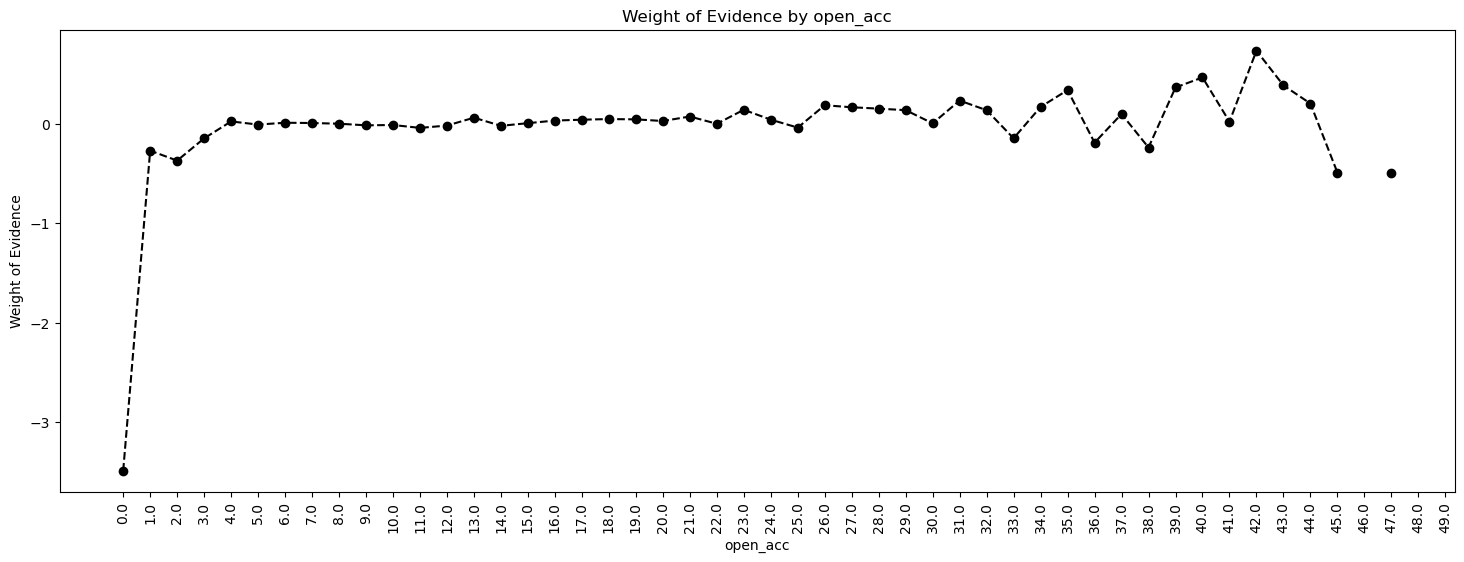

In [92]:
plot_by_woe(df_temp, 90)

In [93]:
imputed_df['open_acc:0'] = np.where((imputed_df['open_acc'] == 0), 1, 0)
imputed_df['open_acc:1-3'] = np.where((imputed_df['open_acc'] >= 1) & (imputed_df['open_acc'] <= 3), 1, 0)
imputed_df['open_acc:4-12'] = np.where((imputed_df['open_acc'] >= 4) & (imputed_df['open_acc'] <= 12), 1, 0)
imputed_df['open_acc:13-17'] = np.where((imputed_df['open_acc'] >= 13) & (imputed_df['open_acc'] <= 17), 1, 0)
imputed_df['open_acc:18-22'] = np.where((imputed_df['open_acc'] >= 18) & (imputed_df['open_acc'] <= 22), 1, 0)
imputed_df['open_acc:23-25'] = np.where((imputed_df['open_acc'] >= 23) & (imputed_df['open_acc'] <= 25), 1, 0)
imputed_df['open_acc:26-30'] = np.where((imputed_df['open_acc'] >= 26) & (imputed_df['open_acc'] <= 30), 1, 0)
imputed_df['open_acc:>=31'] = np.where((imputed_df['open_acc'] >= 31), 1, 0)

In [94]:
imputed_df.columns.values

array(['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'emp_length_int',
       'mths_since_earliest_cr_line', 'term_int', 'mths_since_issue_d',
       'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'sub_grade:A1', 'sub_grade:A2', 'sub_grade:A3',
       'sub_grade:A4', 'sub_grade:A5', 'sub_grade:B1', 'sub_grade:B2',
       'sub_grade:B3', 'sub_grade:B4', 'sub_grade:B5', 'sub_grade:C1',
       'sub_grade:C2', 'sub_grade:C3', 'sub_grade:C4', 'sub_grade:C5',
       'sub_grade:D1', 'sub_grade:D2', 'sub_grade:D3', 'sub_grade:D4',
       'sub_grade:D5', 'sub_grade:E1'

In [95]:
imputed_df['pub_rec'].unique()

array([ 0.        ,  1.        ,  2.        ,  4.        ,  6.        ,
        3.        ,  5.        ,  8.        ,  7.        , 10.        ,
       19.        ,  0.16038765, 11.        , 17.        ,  9.        ,
       34.        , 16.        , 12.        , 40.        , 18.        ,
       54.        , 13.        , 15.        , 63.        , 21.        ])

In [96]:
imputed_df['pub_rec'] = np.where(np.isclose(imputed_df['pub_rec'], 0.16038765, atol=0.1), 0, imputed_df['pub_rec'])

In [97]:
imputed_df['pub_rec'].unique()

array([ 0.,  1.,  2.,  4.,  6.,  3.,  5.,  8.,  7., 10., 19., 11., 17.,
        9., 34., 16., 12., 40., 18., 54., 13., 15., 63., 21.])

In [98]:
df_temp = woe_ordered_continuous(imputed_df, 'pub_rec', loan_data_targets_train)
df_temp

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,283462,0.890271,0.868452,252358.0,31104.0,0.867767,0.874052,-0.007216,NaN,NaN,inf
1,1.0,37131,0.893378,0.113760,33172.0,3959.0,0.114066,0.111252,0.024987,0.003106,0.032202,inf
2,2.0,3950,0.903291,0.012102,3568.0,382.0,0.012269,0.010735,0.133612,0.009914,0.108625,inf
3,3.0,1117,0.920322,0.003422,1028.0,89.0,0.003535,0.002501,0.346006,0.017031,0.212394,inf
4,4.0,364,0.920330,0.001115,335.0,29.0,0.001152,0.000815,0.346107,0.000007,0.000101,inf
5,5.0,175,0.931429,0.000536,163.0,12.0,0.000560,0.000337,0.508115,0.011099,0.162009,inf
6,6.0,98,0.938776,0.000300,92.0,6.0,0.000316,0.000169,0.629301,0.007347,0.121186,inf
7,7.0,43,0.953488,0.000132,41.0,2.0,0.000141,0.000056,0.919697,0.014713,0.290396,inf
8,8.0,24,1.000000,0.000074,24.0,0.0,0.000083,0.000000,inf,0.046512,inf,inf
9,9.0,10,0.700000,0.000031,7.0,3.0,0.000024,0.000084,-1.253430,0.300000,inf,inf


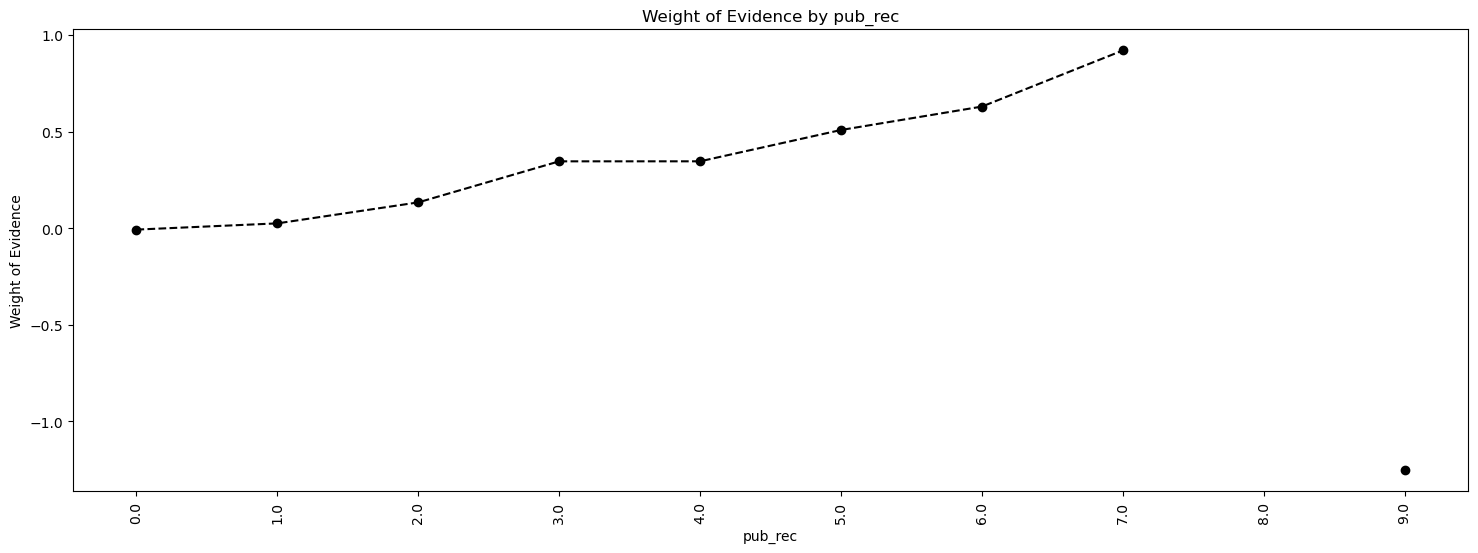

In [99]:
plot_by_woe(df_temp, 90)

In [100]:
imputed_df['pub_rec:0-2'] = np.where((imputed_df['pub_rec'] >= 0) & (imputed_df['pub_rec'] <= 2), 1, 0)
imputed_df['pub_rec:3-4'] = np.where((imputed_df['pub_rec'] >= 3) & (imputed_df['pub_rec'] <= 4), 1, 0)
imputed_df['pub_rec:>=5'] = np.where((imputed_df['pub_rec'] >= 5), 1, 0)

In [101]:
imputed_df.columns.values

array(['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'emp_length_int',
       'mths_since_earliest_cr_line', 'term_int', 'mths_since_issue_d',
       'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'sub_grade:A1', 'sub_grade:A2', 'sub_grade:A3',
       'sub_grade:A4', 'sub_grade:A5', 'sub_grade:B1', 'sub_grade:B2',
       'sub_grade:B3', 'sub_grade:B4', 'sub_grade:B5', 'sub_grade:C1',
       'sub_grade:C2', 'sub_grade:C3', 'sub_grade:C4', 'sub_grade:C5',
       'sub_grade:D1', 'sub_grade:D2', 'sub_grade:D3', 'sub_grade:D4',
       'sub_grade:D5', 'sub_grade:E1'

In [102]:
imputed_df['revol_bal_factor'] = pd.cut(imputed_df['revol_bal'],25)

In [103]:
df_temp = woe_ordered_continuous(imputed_df, 'revol_bal_factor', loan_data_targets_train)
df_temp

,revol_bal_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-2568.995, 102759.8]",324194,0.890769,0.993244,288782.0,35412.0,0.993016,0.995110,-0.002107,NaN,NaN,inf
1,"(102759.8, 205519.6]",1739,0.920069,0.005328,1600.0,139.0,0.005502,0.003906,0.342557,0.029300,0.344664,inf
2,"(205519.6, 308279.4]",317,0.930599,0.000971,295.0,22.0,0.001014,0.000618,0.495205,0.010530,0.152648,inf
3,"(308279.4, 411039.2]",100,0.930000,0.000306,93.0,7.0,0.000320,0.000197,0.485961,0.000599,0.009244,inf
4,"(411039.2, 513799.0]",27,0.925926,0.000083,25.0,2.0,0.000086,0.000056,0.425000,0.004074,0.060961,inf
5,"(513799.0, 616558.8]",5,0.800000,0.000015,4.0,1.0,0.000014,0.000028,-0.714434,0.125926,1.139434,inf
6,"(616558.8, 719318.6]",8,0.875000,0.000025,7.0,1.0,0.000024,0.000028,-0.154818,0.075000,0.559616,inf
7,"(719318.6, 822078.4]",1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.125000,inf,inf
8,"(822078.4, 924838.2]",1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf
9,"(924838.2, 1027598.0]",2,1.000000,0.000006,2.0,0.0,0.000007,0.000000,inf,0.000000,NaN,inf


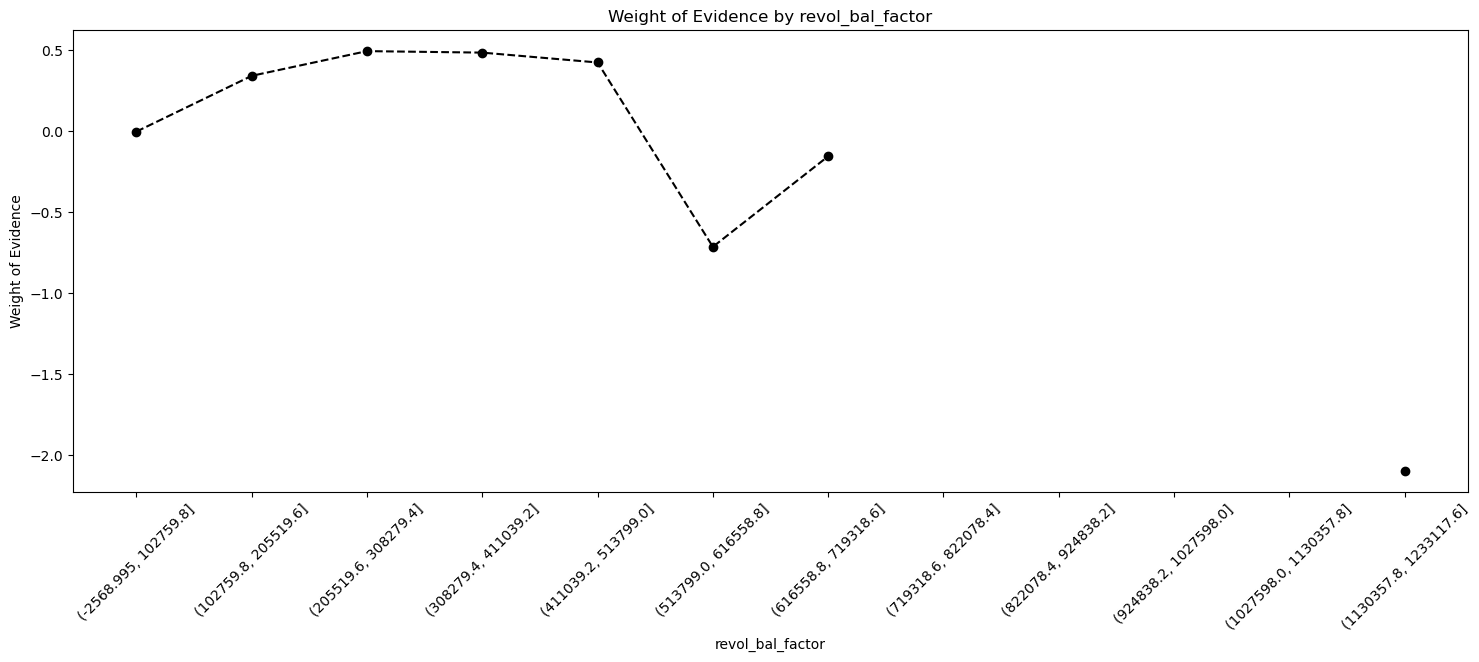

In [104]:
plot_by_woe(df_temp, 45)

In [105]:
imputed_df['revol_bal:0-10000'] = np.where((imputed_df['revol_bal'] >= 0) & (imputed_df['revol_bal'] <= 100000), 1, 0)
imputed_df['revol_bal:100000-400000'] = np.where((imputed_df['revol_bal'] >= 100000) & (imputed_df['revol_bal'] <= 400000), 1, 0)
imputed_df['revol_bal:>400000'] = np.where((imputed_df['revol_bal'] >400000), 1, 0)

In [106]:
imputed_df['revol_util'].unique()

array([ 69.6 ,  36.4 ,  92.5 , ..., 111.3 ,  29.53,  70.94])

In [107]:
imputed_df['rrevol_util_factor'] = pd.cut(imputed_df['revol_util'],25)

In [108]:
df_temp = woe_ordered_continuous(imputed_df, 'rrevol_util_factor', loan_data_targets_train)
df_temp

,rrevol_util_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.892, 35.692]",68514,0.912981,0.209909,62552.0,5962.0,0.215094,0.167538,0.249864,NaN,NaN,inf
1,"(35.692, 71.384]",161458,0.892882,0.494665,144163.0,17295.0,0.495724,0.486006,0.019799,0.020099,0.230065,inf
2,"(71.384, 107.076]",96330,0.872179,0.295130,84017.0,12313.0,0.288904,0.346007,-0.180365,0.020703,0.200164,inf
3,"(107.076, 142.768]",89,0.831461,0.000273,74.0,15.0,0.000254,0.000422,-0.504713,0.040718,0.324349,inf
4,"(142.768, 178.46]",6,0.833333,0.000018,5.0,1.0,0.000017,0.000028,-0.491290,0.001873,0.013423,inf
5,"(178.46, 214.152]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(214.152, 249.844]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
7,"(249.844, 285.536]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
8,"(285.536, 321.228]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
9,"(321.228, 356.92]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


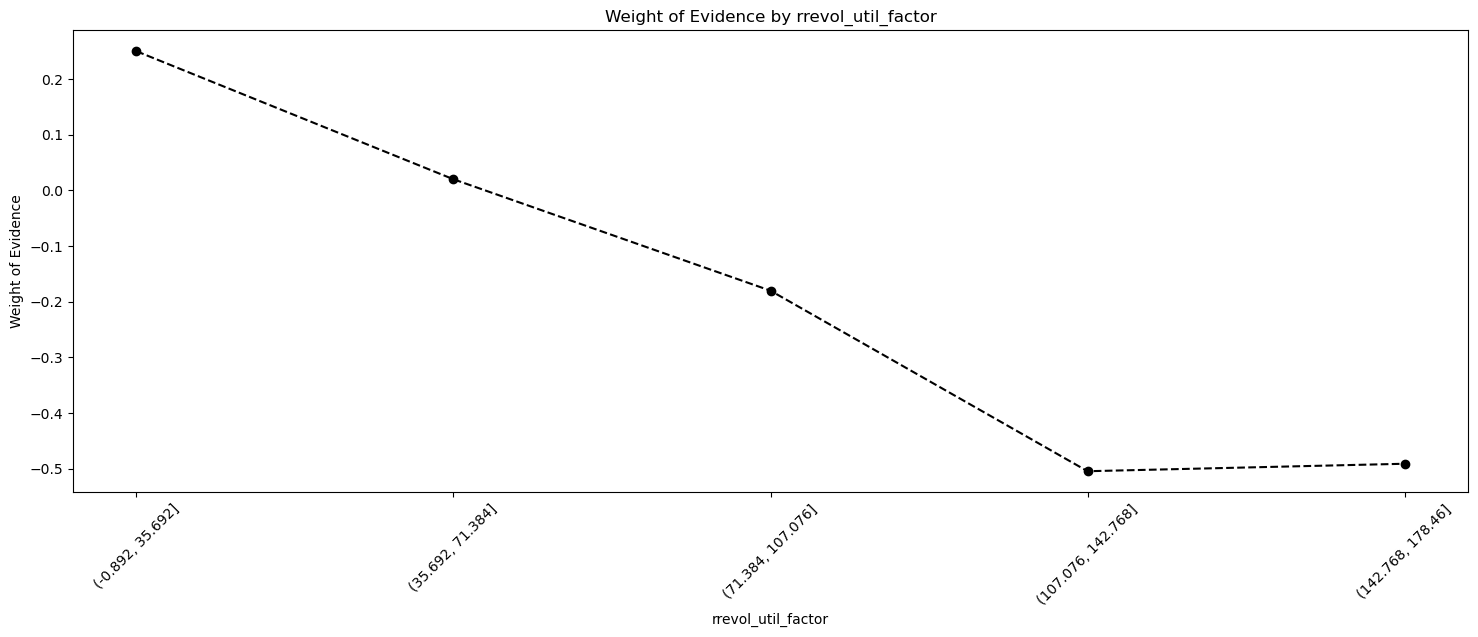

In [109]:
plot_by_woe(df_temp, 45)

In [110]:
imputed_df['revol_util:0-35'] = np.where((imputed_df['revol_util'] >= 0) & (imputed_df['revol_util'] <= 35), 1, 0)
imputed_df['revol_util:36-70'] = np.where((imputed_df['revol_util'] >= 36) & (imputed_df['revol_util'] <= 70), 1, 0)
imputed_df['revol_util:>70'] = np.where((imputed_df['revol_util'] >70), 1, 0)

In [111]:
imputed_df.columns.values

array(['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'emp_length_int',
       'mths_since_earliest_cr_line', 'term_int', 'mths_since_issue_d',
       'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'sub_grade:A1', 'sub_grade:A2', 'sub_grade:A3',
       'sub_grade:A4', 'sub_grade:A5', 'sub_grade:B1', 'sub_grade:B2',
       'sub_grade:B3', 'sub_grade:B4', 'sub_grade:B5', 'sub_grade:C1',
       'sub_grade:C2', 'sub_grade:C3', 'sub_grade:C4', 'sub_grade:C5',
       'sub_grade:D1', 'sub_grade:D2', 'sub_grade:D3', 'sub_grade:D4',
       'sub_grade:D5', 'sub_grade:E1'

In [112]:
imputed_df['total_acc'].unique()

array([ 20.        ,  21.        ,  35.        ,  32.        ,
        40.        ,  23.        ,  31.        ,  14.        ,
        11.        ,  36.        ,  34.        ,  24.        ,
        51.        ,  41.        ,   6.        ,  25.        ,
        30.        ,  29.        ,  38.        ,  17.        ,
        16.        ,  28.        ,  10.        ,  13.        ,
         9.        ,  27.        ,  37.        ,  49.        ,
         8.        ,  22.        ,  12.        ,  18.        ,
        19.        ,   7.        ,  43.        ,  39.        ,
        15.        ,  33.        ,  48.        ,  46.        ,
        45.        ,  26.        ,  63.        ,  95.        ,
        53.        ,  55.        ,  66.        ,  44.        ,
        42.        ,  52.        ,   5.        ,   4.        ,
        61.        ,  65.        ,  57.        ,  59.        ,
        47.        ,  54.        ,  73.        ,  58.        ,
        50.        ,  64.        ,  62.        ,   3.  

In [113]:
imputed_df['total_acc_factor'] = pd.cut(imputed_df['total_acc'],5)

In [114]:
df_temp = woe_ordered_continuous(imputed_df, 'total_acc_factor', loan_data_targets_train)
df_temp

,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(0.851, 30.8]",234350,0.887984,0.717986,208099.0,26251.0,0.715577,0.737678,-0.030418,NaN,NaN,inf
1,"(30.8, 60.6]",89277,0.898585,0.273521,80223.0,9054.0,0.275858,0.254426,0.080875,0.010602,0.111294,inf
2,"(60.6, 90.4]",2739,0.898503,0.008392,2461.0,278.0,0.008462,0.007812,0.079974,0.000082,0.000902,inf
3,"(90.4, 120.2]",31,0.903226,0.000095,28.0,3.0,0.000096,0.000084,0.132864,0.004723,0.052890,inf
4,"(120.2, 150.0]",2,1.000000,0.000006,2.0,0.0,0.000007,0.000000,inf,0.096774,inf,inf


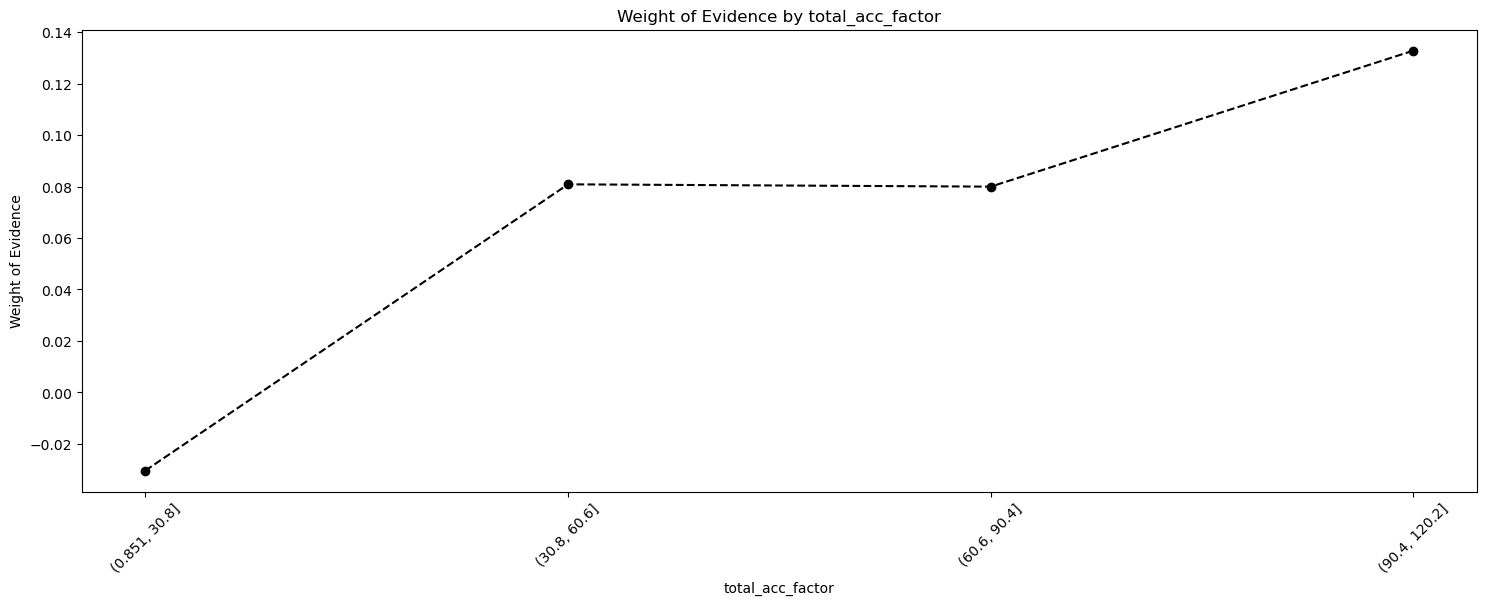

In [115]:
plot_by_woe(df_temp, 45)

In [116]:
imputed_df['total_acc:0-30'] = np.where((imputed_df['total_acc'] >= 0) & (imputed_df['total_acc'] <= 30), 1, 0)
imputed_df['total_acc:31-90'] = np.where((imputed_df['total_acc'] >= 31) & (imputed_df['total_acc'] <= 90), 1, 0)
imputed_df['total_acc:>90'] = np.where((imputed_df['total_acc'] >90), 1, 0)

In [117]:
imputed_df.columns.values

array(['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'emp_length_int',
       'mths_since_earliest_cr_line', 'term_int', 'mths_since_issue_d',
       'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'sub_grade:A1', 'sub_grade:A2', 'sub_grade:A3',
       'sub_grade:A4', 'sub_grade:A5', 'sub_grade:B1', 'sub_grade:B2',
       'sub_grade:B3', 'sub_grade:B4', 'sub_grade:B5', 'sub_grade:C1',
       'sub_grade:C2', 'sub_grade:C3', 'sub_grade:C4', 'sub_grade:C5',
       'sub_grade:D1', 'sub_grade:D2', 'sub_grade:D3', 'sub_grade:D4',
       'sub_grade:D5', 'sub_grade:E1'

In [118]:
imputed_df['last_pymnt_amnt'].unique()

array([ 495.86,  291.38, 7423.11, ...,  312.01,  657.06,  464.48])

In [119]:
#last_pymnt_amnt should be dropped as its variable after the loan is booked

imputed_df.drop(columns='last_pymnt_amnt', inplace=True)

In [120]:
imputed_df['collections_12_mths_ex_med'].value_counts(dropna=False)

0.000000     323538
1.000000       2572
2.000000        159
0.009197        106
3.000000         16
4.000000          4
16.000000         1
5.000000          1
20.000000         1
6.000000          1
Name: collections_12_mths_ex_med, dtype: int64

In [121]:
imputed_df['collections_12_mths_ex_med_factor'] = pd.cut(imputed_df['collections_12_mths_ex_med'],5)

df_temp = woe_ordered_continuous(imputed_df, 'collections_12_mths_ex_med_factor', loan_data_targets_train)
df_temp

,collections_12_mths_ex_med_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.02, 4.0]",326395,0.890973,0.999988,290809.0,35586.0,0.999986,1.0,-0.000014,NaN,NaN,inf
1,"(4.0, 8.0]",2,1.000000,0.000006,2.0,0.0,0.000007,0.0,inf,0.109027,inf,inf
2,"(8.0, 12.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(12.0, 16.0]",1,1.000000,0.000003,1.0,0.0,0.000003,0.0,inf,NaN,NaN,inf
4,"(16.0, 20.0]",1,1.000000,0.000003,1.0,0.0,0.000003,0.0,inf,0.000000,NaN,inf


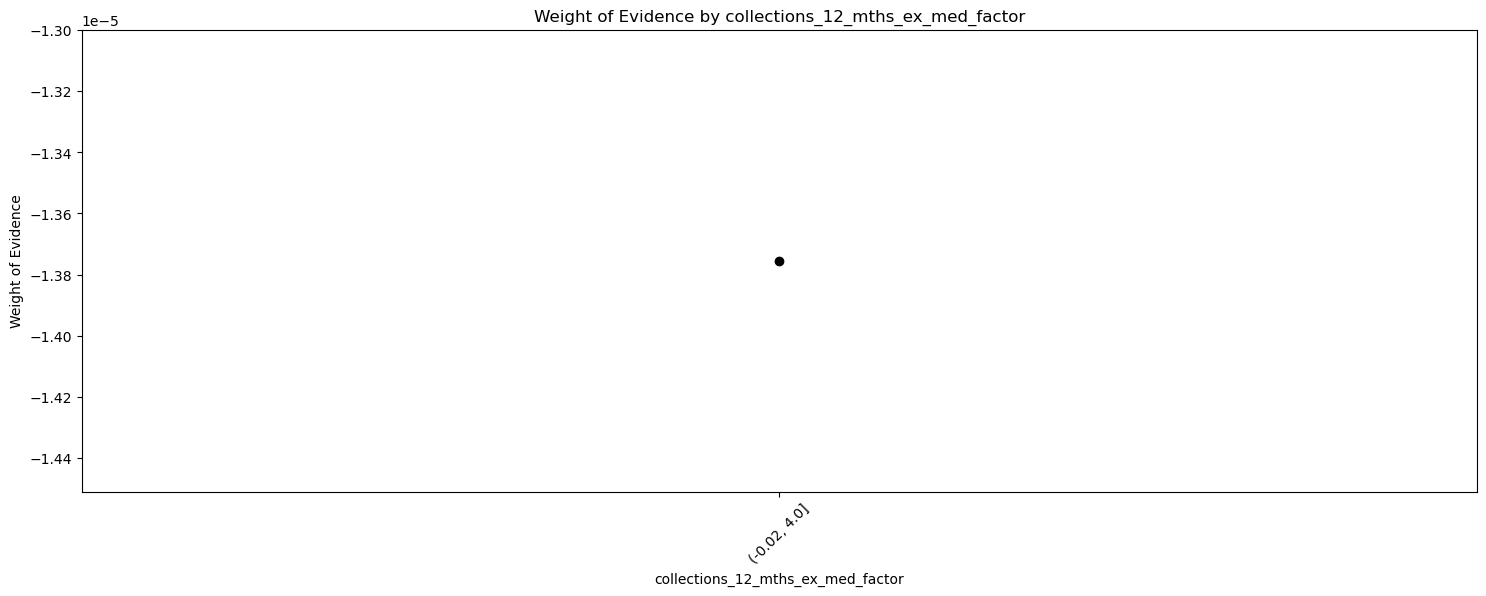

In [122]:
plot_by_woe(df_temp, 45)

In [123]:
# No proper WOE for collections_12_mths_ex_med.

imputed_df.drop(columns = 'collections_12_mths_ex_med',inplace= True)

In [124]:
imputed_df['acc_now_delinq'].unique()

array([0.00000000e+00, 2.00000000e+00, 1.00000000e+00, 4.00000000e+00,
       3.00000000e+00, 5.00000000e+00, 3.93715263e-03])

In [125]:
df_temp = woe_ordered_continuous(imputed_df, 'acc_now_delinq', loan_data_targets_train)
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.000000,325191,0.890941,0.996299,289726.0,35465.0,0.996262,0.996600,-0.000339,NaN,NaN,inf
1,0.003937,21,0.857143,0.000064,18.0,3.0,0.000062,0.000084,-0.308969,0.033798,0.308630,inf
2,1.000000,1109,0.899910,0.003398,998.0,111.0,0.003432,0.003119,0.095495,0.042767,0.404464,inf
3,2.000000,66,0.924242,0.000202,61.0,5.0,0.000210,0.000141,0.400708,0.024333,0.305213,inf
4,3.000000,6,0.833333,0.000018,5.0,1.0,0.000017,0.000028,-0.491290,0.090909,0.891998,inf
5,4.000000,4,1.000000,0.000012,4.0,0.0,0.000014,0.000000,inf,0.166667,inf,inf
6,5.000000,2,0.500000,0.000006,1.0,1.0,0.000003,0.000028,-2.100728,0.500000,inf,inf


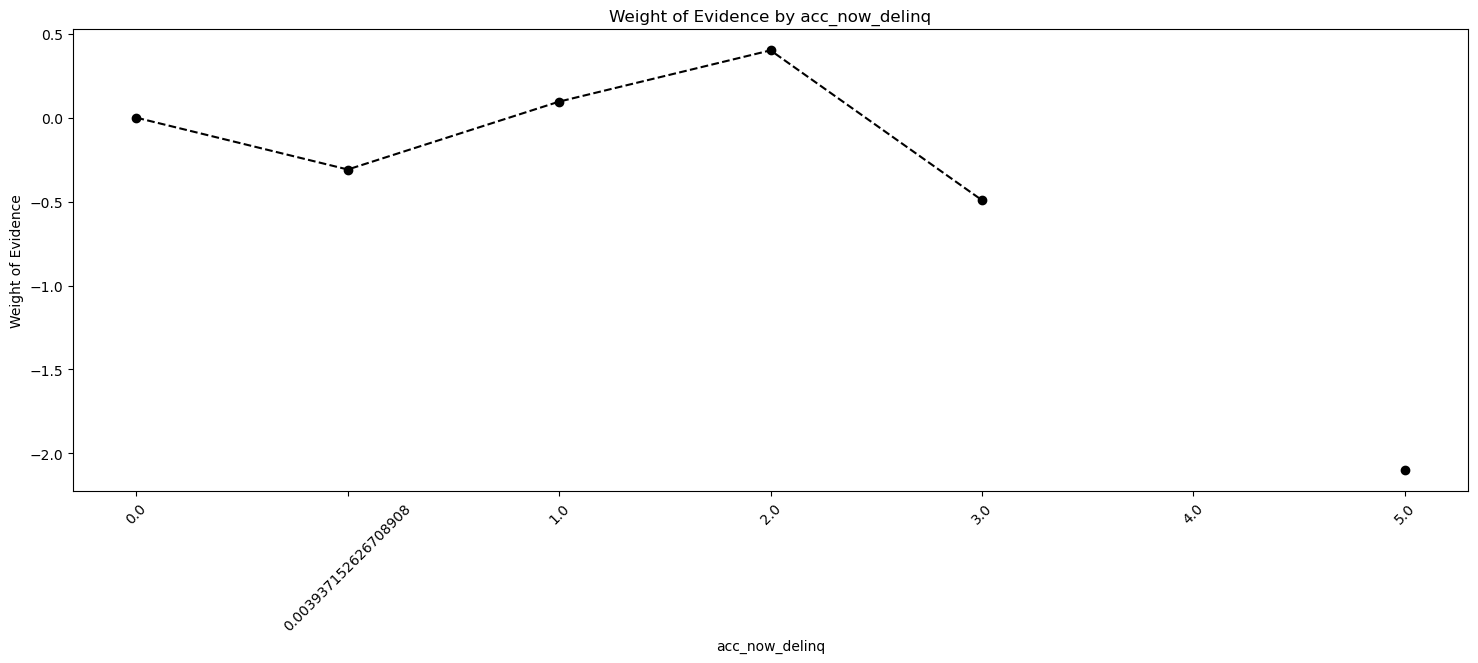

In [126]:
plot_by_woe(df_temp, 45)

In [127]:
imputed_df['acc_now_delinq:0'] = np.where((imputed_df['acc_now_delinq'] == 0), 1, 0)
imputed_df['acc_now_delinq:1'] = np.where((imputed_df['acc_now_delinq'] == 1), 1, 0)
imputed_df['acc_now_delinq:>1'] = np.where((imputed_df['acc_now_delinq'] >1), 1, 0)

In [128]:
imputed_df.columns.values

array(['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'emp_length_int', 'mths_since_earliest_cr_line', 'term_int',
       'mths_since_issue_d', 'grade:A', 'grade:B', 'grade:C', 'grade:D',
       'grade:E', 'grade:F', 'grade:G', 'sub_grade:A1', 'sub_grade:A2',
       'sub_grade:A3', 'sub_grade:A4', 'sub_grade:A5', 'sub_grade:B1',
       'sub_grade:B2', 'sub_grade:B3', 'sub_grade:B4', 'sub_grade:B5',
       'sub_grade:C1', 'sub_grade:C2', 'sub_grade:C3', 'sub_grade:C4',
       'sub_grade:C5', 'sub_grade:D1', 'sub_grade:D2', 'sub_grade:D3',
       'sub_grade:D4', 'sub_grade:D5', 'sub_grade:E1', 'sub_grade:E2',
       'sub_grade:E3', 'sub_grade:E4',

In [129]:
imputed_df['tot_coll_amt'].unique()

array([    0.        ,   203.25744289,  1834.        , ...,
        9279.        , 13436.        , 10228.        ])

In [130]:
imputed_df['tot_coll_amt_factor'] = pd.cut(imputed_df['tot_coll_amt'],25)

df_temp = woe_ordered_continuous(imputed_df, 'tot_coll_amt_factor', loan_data_targets_train)
df_temp

,tot_coll_amt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9152.545, 366101.8]",326398,0.890974,0.999997,290812.0,35586.0,0.999997,1.0,-0.000003,NaN,NaN,inf
1,"(366101.8, 732203.6]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(732203.6, 1098305.4]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(1098305.4, 1464407.2]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
4,"(1464407.2, 1830509.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
5,"(1830509.0, 2196610.8]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(2196610.8, 2562712.6]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
7,"(2562712.6, 2928814.4]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
8,"(2928814.4, 3294916.2]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
9,"(3294916.2, 3661018.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


In [131]:
# No WOE trend

imputed_df.drop(columns='tot_coll_amt',inplace=True)

In [132]:
imputed_df['tot_cur_bal'].unique()

array([209908.,  60381., 116252., ..., 233233., 106820., 278661.])

In [133]:
imputed_df['tot_cur_bal_factor'] = pd.cut(imputed_df['tot_cur_bal'],20)

df_temp = woe_ordered_continuous(imputed_df, 'tot_cur_bal_factor', loan_data_targets_train)
df_temp

,tot_cur_bal_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-8000.078, 400003.9]",309993,0.888581,0.949736,275454.0,34539.0,0.947186,0.970578,-0.024397,NaN,NaN,inf
1,"(400003.9, 800007.8]",15216,0.936120,0.046618,14244.0,972.0,0.048980,0.027314,0.584007,0.047539,0.608404,inf
2,"(800007.8, 1200011.7]",946,0.934461,0.002898,884.0,62.0,0.003040,0.001742,0.556595,0.001659,0.027413,inf
3,"(1200011.7, 1600015.6]",158,0.962025,0.000484,152.0,6.0,0.000523,0.000169,1.131393,0.027564,0.574798,inf
4,"(1600015.6, 2000019.5]",53,0.886792,0.000162,47.0,6.0,0.000162,0.000169,-0.042340,0.075233,1.173733,inf
5,"(2000019.5, 2400023.4]",15,1.000000,0.000046,15.0,0.0,0.000052,0.000000,inf,0.113208,inf,inf
6,"(2400023.4, 2800027.3]",7,1.000000,0.000021,7.0,0.0,0.000024,0.000000,inf,0.000000,NaN,inf
7,"(2800027.3, 3200031.2]",2,1.000000,0.000006,2.0,0.0,0.000007,0.000000,inf,0.000000,NaN,inf
8,"(3200031.2, 3600035.1]",3,0.666667,0.000009,2.0,1.0,0.000007,0.000028,-1.407581,0.333333,inf,inf
9,"(3600035.1, 4000039.0]",3,1.000000,0.000009,3.0,0.0,0.000010,0.000000,inf,0.333333,inf,inf


In [134]:
# No WOE trend:

imputed_df.drop(columns='tot_cur_bal', inplace= True)

In [135]:
imputed_df['total_rev_hi_lim'].unique()

array([43300., 28000., 11800., ..., 96960., 60438., 24816.])

In [136]:
imputed_df['total_rev_hi_lim_factor'] = pd.cut(imputed_df['total_rev_hi_lim'],10)

df_temp = woe_ordered_continuous(imputed_df, 'total_rev_hi_lim_factor', loan_data_targets_train)
df_temp

,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 999999.9]",326394,0.890975,0.999985,290809.0,35585.0,0.999986,0.999972,0.000014,NaN,NaN,inf
1,"(999999.9, 1999999.8]",4,0.750000,0.000012,3.0,1.0,0.000010,0.000028,-1.002116,0.140975,1.00213,inf
2,"(1999999.8, 2999999.7]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(2999999.7, 3999999.6]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
4,"(3999999.6, 4999999.5]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
5,"(4999999.5, 5999999.4]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(5999999.4, 6999999.3]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
7,"(6999999.3, 7999999.2]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
8,"(7999999.2, 8999999.1]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
9,"(8999999.1, 9999999.0]",1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,NaN,NaN,inf


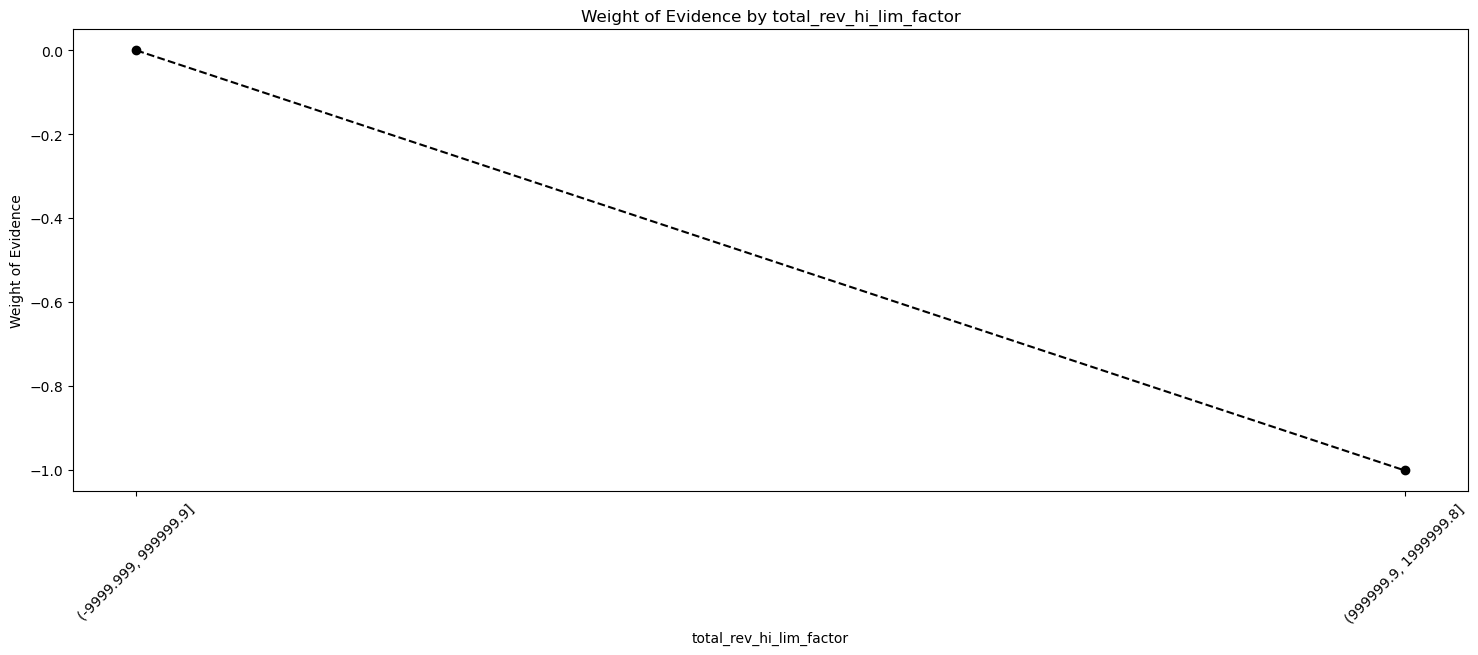

In [137]:
plot_by_woe(df_temp,45)

In [138]:
# No proper WOE trend

imputed_df.drop(columns='total_rev_hi_lim', inplace= True)

In [139]:
imputed_df['mths_since_earliest_cr_line'].unique()

array([171.       , 100.       , 210.       , 252.       , 200.       ,
       147.       , 232.       , 218.       , 242.       , 157.       ,
       279.       , 263.       , 249.       , 347.       , 136.       ,
       186.       , 203.       , 371.       , 407.       , 393.       ,
       174.       , 159.       , 202.       , 292.       , 379.       ,
       225.       , 385.       , 300.       , 162.       , 192.       ,
       540.       , 287.       , 334.       , 282.       , 330.       ,
       409.       , 340.       , 275.       , 175.       , 206.       ,
       196.       , 335.       , 322.       , 190.       , 163.       ,
       361.       , 241.       , 321.       , 204.       , 188.       ,
       173.       , 373.       , 254.       , 315.       , 333.       ,
       169.       , 170.       , 445.       , 352.       , 146.       ,
       158.       , 289.       , 189.       , 337.       , 426.       ,
       178.       , 243.       , 216.       , 208.       , 193. 

In [140]:
imputed_df['mths_since_earliest_cr_line_factor'] = pd.cut(imputed_df['mths_since_earliest_cr_line'],25)

df_temp = woe_ordered_continuous(imputed_df, 'mths_since_earliest_cr_line_factor', loan_data_targets_train)
df_temp

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(72.486, 93.56]",2320,0.890086,0.007108,2065.0,255.0,0.007101,0.007166,-0.009106,NaN,NaN,0.015633
1,"(93.56, 114.12]",5569,0.867122,0.017062,4829.0,740.0,0.016605,0.020795,-0.224984,0.022965,0.215877,0.015633
2,"(114.12, 134.68]",13679,0.862709,0.041909,11801.0,1878.0,0.040579,0.052774,-0.262751,0.004412,0.037768,0.015633
3,"(134.68, 155.24]",20669,0.875175,0.063324,18089.0,2580.0,0.062201,0.072500,-0.153214,0.012466,0.109538,0.015633
4,"(155.24, 175.8]",27163,0.881935,0.083220,23956.0,3207.0,0.082376,0.090120,-0.089845,0.006760,0.063368,0.015633
5,"(175.8, 196.36]",36143,0.887032,0.110733,32060.0,4083.0,0.110243,0.114736,-0.039951,0.005097,0.049894,0.015633
6,"(196.36, 216.92]",40018,0.883552,0.122605,35358.0,4660.0,0.121583,0.130950,-0.074219,0.003480,0.034268,0.015633
7,"(216.92, 237.48]",37466,0.890461,0.114786,33362.0,4104.0,0.114720,0.115326,-0.005273,0.006908,0.068946,0.015633
8,"(237.48, 258.04]",28996,0.892744,0.088836,25886.0,3110.0,0.089013,0.087394,0.018351,0.002283,0.023624,0.015633
9,"(258.04, 278.6]",25321,0.895976,0.077577,22687.0,2634.0,0.078012,0.074018,0.052560,0.003232,0.034209,0.015633


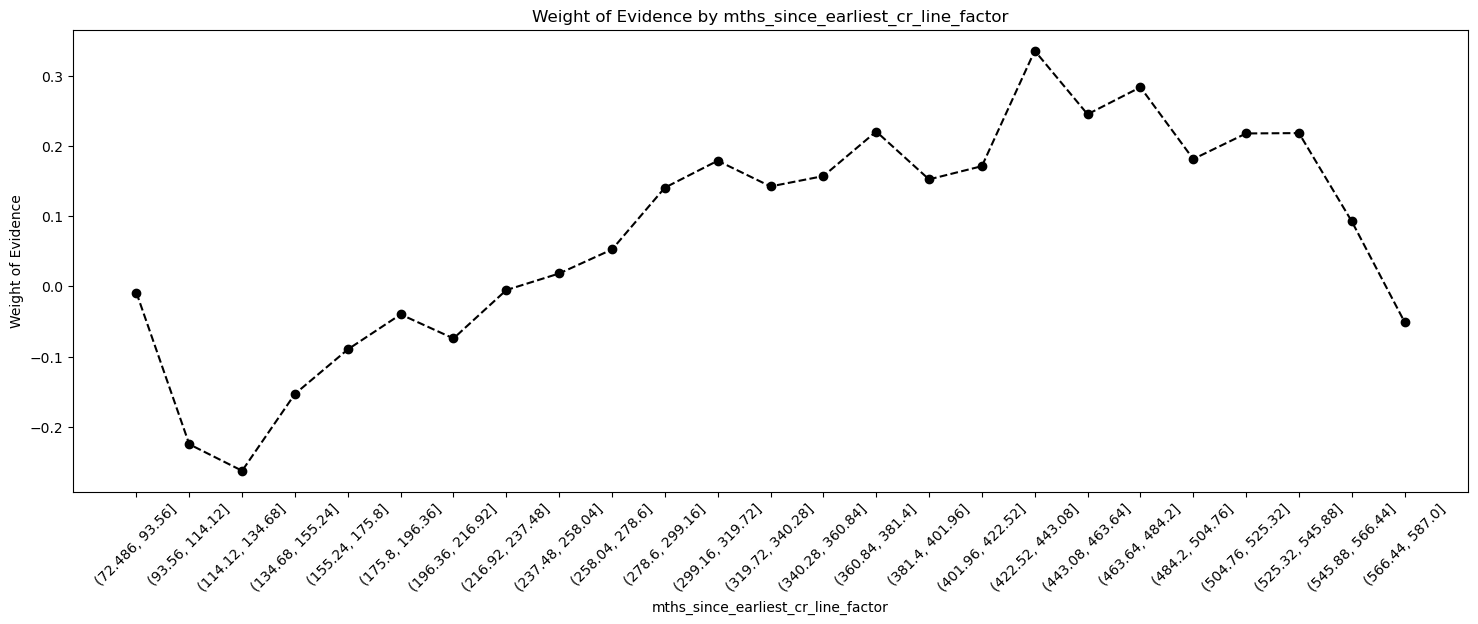

In [141]:
plot_by_woe(df_temp,45)

In [142]:
imputed_df['mths_since_earliest_cr_line:<140'] = np.where(imputed_df['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
imputed_df['mths_since_earliest_cr_line:141-164'] = np.where(imputed_df['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
imputed_df['mths_since_earliest_cr_line:165-247'] = np.where(imputed_df['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
imputed_df['mths_since_earliest_cr_line:248-270'] = np.where(imputed_df['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
imputed_df['mths_since_earliest_cr_line:271-352'] = np.where(imputed_df['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
imputed_df['mths_since_earliest_cr_line:>352'] = np.where(imputed_df['mths_since_earliest_cr_line'].isin(range(353, int(imputed_df['mths_since_earliest_cr_line'].max()))), 1, 0)

In [143]:
imputed_df.columns.values

array(['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'acc_now_delinq',
       'emp_length_int', 'mths_since_earliest_cr_line', 'term_int',
       'mths_since_issue_d', 'grade:A', 'grade:B', 'grade:C', 'grade:D',
       'grade:E', 'grade:F', 'grade:G', 'sub_grade:A1', 'sub_grade:A2',
       'sub_grade:A3', 'sub_grade:A4', 'sub_grade:A5', 'sub_grade:B1',
       'sub_grade:B2', 'sub_grade:B3', 'sub_grade:B4', 'sub_grade:B5',
       'sub_grade:C1', 'sub_grade:C2', 'sub_grade:C3', 'sub_grade:C4',
       'sub_grade:C5', 'sub_grade:D1', 'sub_grade:D2', 'sub_grade:D3',
       'sub_grade:D4', 'sub_grade:D5', 'sub_grade:E1', 'sub_grade:E2',
       'sub_grade:E3', 'sub_grade:E4', 'sub_grade:E5', 'sub_grade:F1',
       'sub_grade:F2', 's

In [144]:
imputed_df['mths_since_issue_d_factor'] = pd.cut(imputed_df['mths_since_issue_d'], 50)

In [145]:
df_temp = woe_ordered_continuous(imputed_df, 'mths_since_issue_d_factor', loan_data_targets_train)
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(35.91, 37.8]",24663,0.942100,0.075561,23235.0,1428.0,0.079897,0.040128,0.688657,NaN,NaN,0.112492
1,"(37.8, 39.6]",34789,0.929001,0.106584,32319.0,2470.0,0.111133,0.069409,0.470709,0.013099,0.217948,0.112492
2,"(39.6, 41.4]",33787,0.917365,0.103514,30995.0,2792.0,0.106581,0.078458,0.306340,0.011636,0.164369,0.112492
3,"(41.4, 43.2]",25359,0.908435,0.077693,23037.0,2322.0,0.079216,0.065250,0.193945,0.008930,0.112395,0.112492
4,"(43.2, 45.0]",24735,0.901071,0.075781,22288.0,2447.0,0.076640,0.068763,0.108457,0.007364,0.085487,0.112492
5,"(45.0, 46.8]",10672,0.899925,0.032696,9604.0,1068.0,0.033025,0.030012,0.095664,0.001146,0.012794,0.112492
6,"(46.8, 48.6]",21445,0.898951,0.065702,19278.0,2167.0,0.066290,0.060895,0.084893,0.000974,0.010771,0.112492
7,"(48.6, 50.4]",20099,0.888054,0.061578,17849.0,2250.0,0.061376,0.063227,-0.029711,0.010897,0.114604,0.112492
8,"(50.4, 52.2]",18050,0.883213,0.055300,15942.0,2108.0,0.054819,0.059237,-0.077511,0.004841,0.047800,0.112492
9,"(52.2, 54.0]",16001,0.866758,0.049023,13869.0,2132.0,0.047690,0.059911,-0.228133,0.016455,0.150622,0.112492


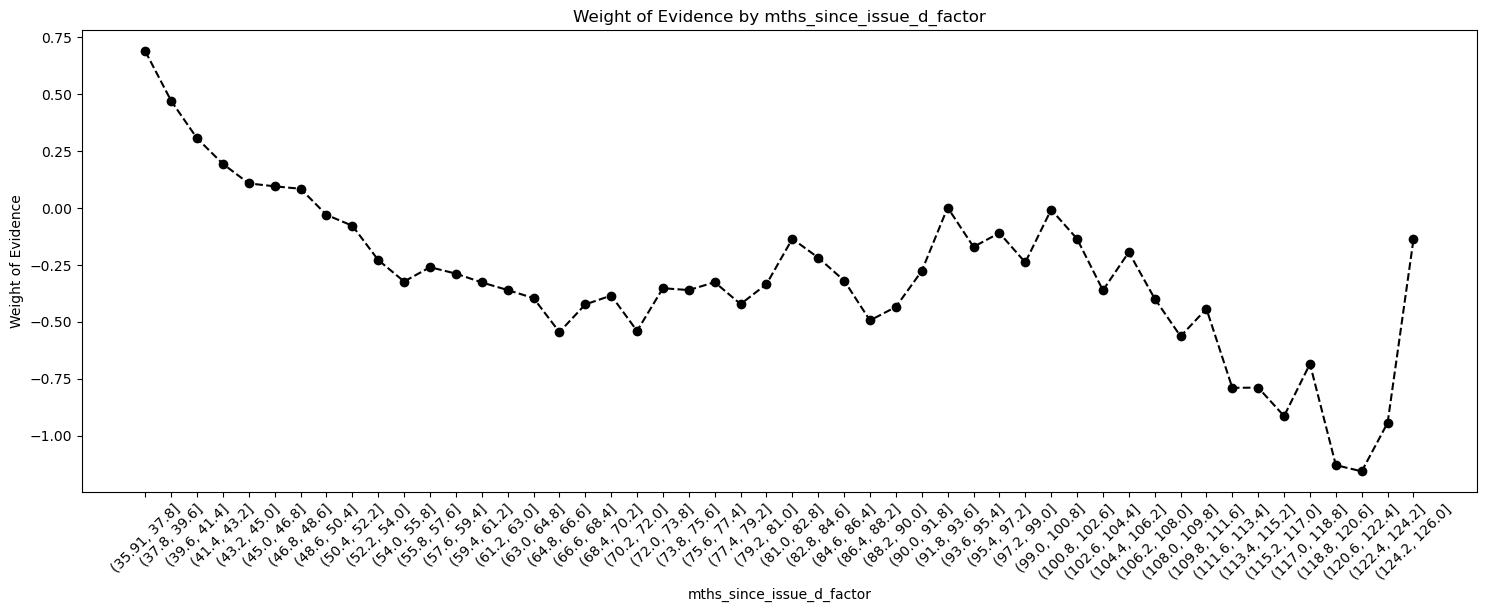

In [146]:
plot_by_woe(df_temp,45)

In [147]:
imputed_df['mths_since_issue_d:<38'] = np.where(imputed_df['mths_since_issue_d'].isin(range(38)), 1, 0)
imputed_df['mths_since_issue_d:38-39'] = np.where(imputed_df['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
imputed_df['mths_since_issue_d:40-41'] = np.where(imputed_df['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
imputed_df['mths_since_issue_d:42-48'] = np.where(imputed_df['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
imputed_df['mths_since_issue_d:49-52'] = np.where(imputed_df['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
imputed_df['mths_since_issue_d:53-64'] = np.where(imputed_df['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
imputed_df['mths_since_issue_d:>65'] = np.where(imputed_df['mths_since_issue_d'].isin(range(65, int(imputed_df['mths_since_issue_d'].max()))), 1, 0)

In [148]:
imputed_df.columns.values

array(['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'acc_now_delinq',
       'emp_length_int', 'mths_since_earliest_cr_line', 'term_int',
       'mths_since_issue_d', 'grade:A', 'grade:B', 'grade:C', 'grade:D',
       'grade:E', 'grade:F', 'grade:G', 'sub_grade:A1', 'sub_grade:A2',
       'sub_grade:A3', 'sub_grade:A4', 'sub_grade:A5', 'sub_grade:B1',
       'sub_grade:B2', 'sub_grade:B3', 'sub_grade:B4', 'sub_grade:B5',
       'sub_grade:C1', 'sub_grade:C2', 'sub_grade:C3', 'sub_grade:C4',
       'sub_grade:C5', 'sub_grade:D1', 'sub_grade:D2', 'sub_grade:D3',
       'sub_grade:D4', 'sub_grade:D5', 'sub_grade:E1', 'sub_grade:E2',
       'sub_grade:E3', 'sub_grade:E4', 'sub_grade:E5', 'sub_grade:F1',
       'sub_grade:F2', 's

In [149]:
imputed_df['loan_amnt_factor'] = pd.cut(imputed_df['loan_amnt'], 5)

In [150]:
df_temp = woe_ordered_continuous(imputed_df, 'loan_amnt_factor', loan_data_targets_train)
df_temp

,loan_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 7400.0]",72572,0.895745,0.222341,65006.0,7566.0,0.223532,0.212612,0.050087,NaN,NaN,0.001891
1,"(7400.0, 14300.0]",109666,0.893112,0.335988,97944.0,11722.0,0.336794,0.329399,0.022200,0.002633,0.027887,0.001891
2,"(14300.0, 21200.0]",83270,0.888555,0.255117,73990.0,9280.0,0.254425,0.260777,-0.024660,0.004557,0.046860,0.001891
3,"(21200.0, 28100.0]",36472,0.887914,0.111741,32384.0,4088.0,0.111357,0.114877,-0.031120,0.000641,0.006460,0.001891
4,"(28100.0, 35000.0]",24419,0.880011,0.074813,21489.0,2930.0,0.073893,0.082336,-0.108189,0.007903,0.077070,0.001891


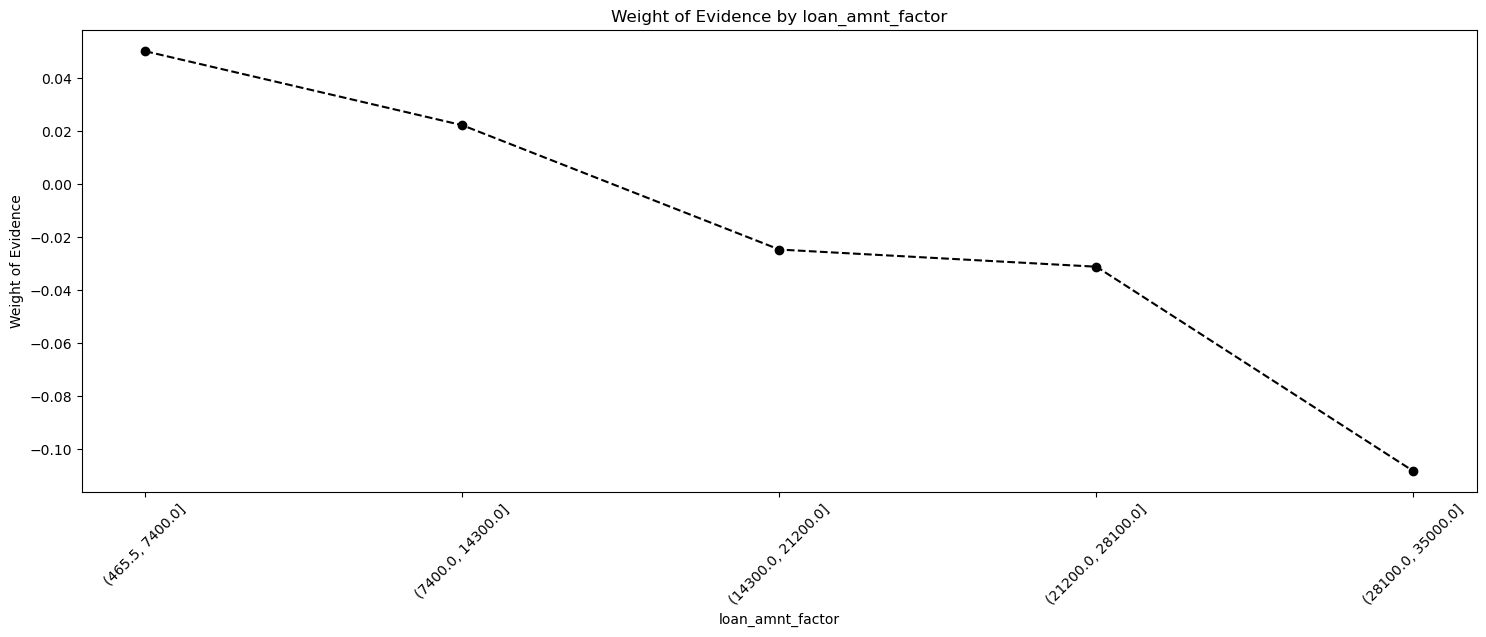

In [151]:
plot_by_woe(df_temp,45)

In [152]:
imputed_df['loan_amnt:<14K'] = np.where(imputed_df['loan_amnt'].isin(range(14000)), 1, 0)
imputed_df['loan_amnt:14K-28K'] = np.where(imputed_df['loan_amnt'].isin(range(14000, 28000)), 1, 0)
imputed_df['loan_amnt>28K'] = np.where(imputed_df['loan_amnt']>28000, 1, 0)

In [153]:
imputed_df.columns.values

array(['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'acc_now_delinq',
       'emp_length_int', 'mths_since_earliest_cr_line', 'term_int',
       'mths_since_issue_d', 'grade:A', 'grade:B', 'grade:C', 'grade:D',
       'grade:E', 'grade:F', 'grade:G', 'sub_grade:A1', 'sub_grade:A2',
       'sub_grade:A3', 'sub_grade:A4', 'sub_grade:A5', 'sub_grade:B1',
       'sub_grade:B2', 'sub_grade:B3', 'sub_grade:B4', 'sub_grade:B5',
       'sub_grade:C1', 'sub_grade:C2', 'sub_grade:C3', 'sub_grade:C4',
       'sub_grade:C5', 'sub_grade:D1', 'sub_grade:D2', 'sub_grade:D3',
       'sub_grade:D4', 'sub_grade:D5', 'sub_grade:E1', 'sub_grade:E2',
       'sub_grade:E3', 'sub_grade:E4', 'sub_grade:E5', 'sub_grade:F1',
       'sub_grade:F2', 's

In [154]:
imputed_df['int_rate_factor'] = pd.cut(imputed_df['int_rate'], 10)

In [155]:
df_temp = woe_ordered_continuous(imputed_df, 'int_rate_factor', loan_data_targets_train)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 7.484]",19303,0.975548,0.059139,18831.0,472.0,0.064753,0.013264,1.585553,NaN,NaN,0.327268
1,"(7.484, 9.548]",39488,0.954974,0.120981,37710.0,1778.0,0.129671,0.049963,0.953708,0.020574,0.631845,0.327268
2,"(9.548, 11.612]",41159,0.928059,0.126100,38198.0,2961.0,0.131349,0.083207,0.456528,0.026914,0.497180,0.327268
3,"(11.612, 13.676]",66178,0.911874,0.202752,60346.0,5832.0,0.207508,0.163885,0.236007,0.016185,0.220521,0.327268
4,"(13.676, 15.74]",61468,0.886526,0.188322,54493.0,6975.0,0.187382,0.196004,-0.044988,0.025348,0.280995,0.327268
5,"(15.74, 17.804]",42246,0.848293,0.129431,35837.0,6409.0,0.123230,0.180099,-0.379451,0.038233,0.334462,0.327268
6,"(17.804, 19.868]",26620,0.824080,0.081557,21937.0,4683.0,0.075433,0.131597,-0.556492,0.024214,0.177042,0.327268
7,"(19.868, 21.932]",13853,0.803653,0.042442,11133.0,2720.0,0.038282,0.076435,-0.691446,0.020427,0.134954,0.327268
8,"(21.932, 23.996]",9989,0.772249,0.030604,7714.0,2275.0,0.026526,0.063930,-0.879671,0.031403,0.188225,0.327268
9,"(23.996, 26.06]",6095,0.757014,0.018673,4614.0,1481.0,0.015866,0.041617,-0.964351,0.015236,0.084679,0.327268


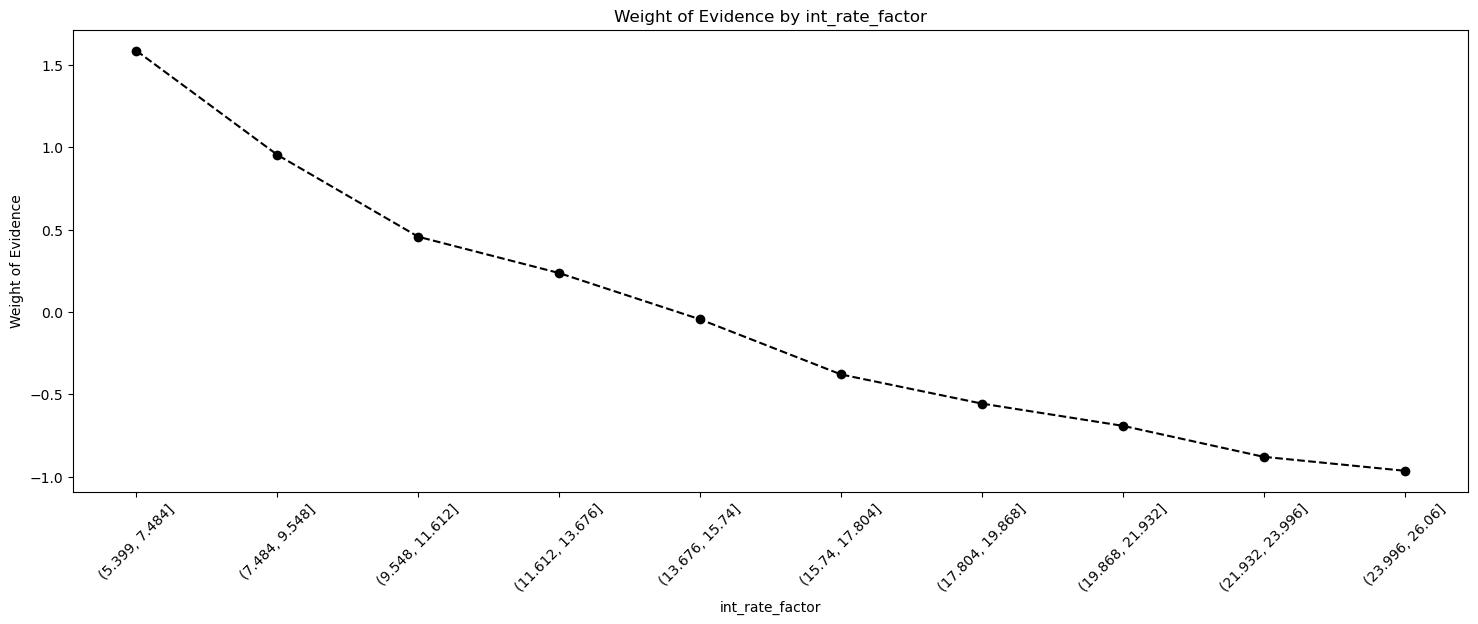

In [156]:
plot_by_woe(df_temp,45)

In [157]:
imputed_df['int_rate:<9.548'] = np.where((imputed_df['int_rate'] <= 9.548), 1, 0)
imputed_df['int_rate:9.548-12.025'] = np.where((imputed_df['int_rate'] > 9.548) & (imputed_df['int_rate'] <= 12.025), 1, 0)
imputed_df['int_rate:12.025-15.74'] = np.where((imputed_df['int_rate'] > 12.025) & (imputed_df['int_rate'] <= 15.74), 1, 0)
imputed_df['int_rate:15.74-20.281'] = np.where((imputed_df['int_rate'] > 15.74) & (imputed_df['int_rate'] <= 20.281), 1, 0)
imputed_df['int_rate:>20.281'] = np.where((imputed_df['int_rate'] > 20.281), 1, 0)

In [158]:
imputed_df.columns.values

array(['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'acc_now_delinq',
       'emp_length_int', 'mths_since_earliest_cr_line', 'term_int',
       'mths_since_issue_d', 'grade:A', 'grade:B', 'grade:C', 'grade:D',
       'grade:E', 'grade:F', 'grade:G', 'sub_grade:A1', 'sub_grade:A2',
       'sub_grade:A3', 'sub_grade:A4', 'sub_grade:A5', 'sub_grade:B1',
       'sub_grade:B2', 'sub_grade:B3', 'sub_grade:B4', 'sub_grade:B5',
       'sub_grade:C1', 'sub_grade:C2', 'sub_grade:C3', 'sub_grade:C4',
       'sub_grade:C5', 'sub_grade:D1', 'sub_grade:D2', 'sub_grade:D3',
       'sub_grade:D4', 'sub_grade:D5', 'sub_grade:E1', 'sub_grade:E2',
       'sub_grade:E3', 'sub_grade:E4', 'sub_grade:E5', 'sub_grade:F1',
       'sub_grade:F2', 's

In [159]:
imputed_df['installment'].unique()

array([495.86, 291.38, 858.46, ..., 735.11, 878.62, 464.48])

In [160]:
imputed_df['installment_factor'] = pd.cut(imputed_df['installment'], 10)

In [161]:
df_temp = woe_ordered_continuous(imputed_df, 'installment_factor', loan_data_targets_train)
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.276, 155.102]",28610,0.894373,0.087653,25588.0,3022.0,0.087988,0.084921,0.035476,NaN,NaN,0.004907
1,"(155.102, 294.534]",77009,0.898259,0.235935,69174.0,7835.0,0.237864,0.220171,0.077296,0.003886,0.041820,0.004907
2,"(294.534, 433.966]",84309,0.890285,0.258300,75059.0,9250.0,0.258101,0.259934,-0.007077,0.007974,0.084373,0.004907
3,"(433.966, 573.398]",57114,0.884162,0.174982,50498.0,6616.0,0.173644,0.185916,-0.068285,0.006123,0.061208,0.004907
4,"(573.398, 712.83]",37183,0.890918,0.113919,33127.0,4056.0,0.113912,0.113977,-0.000577,0.006756,0.067709,0.004907
5,"(712.83, 852.262]",19846,0.892069,0.060803,17704.0,2142.0,0.060878,0.060192,0.011322,0.001151,0.011899,0.004907
6,"(852.262, 991.694]",12224,0.875491,0.037451,10702.0,1522.0,0.036800,0.042770,-0.150323,0.016578,0.161645,0.004907
7,"(991.694, 1131.126]",4914,0.885022,0.015055,4349.0,565.0,0.014955,0.015877,-0.059853,0.009532,0.090470,0.004907
8,"(1131.126, 1270.558]",4452,0.902740,0.013640,4019.0,433.0,0.013820,0.012168,0.127323,0.017718,0.187175,0.004907
9,"(1270.558, 1409.99]",738,0.803523,0.002261,593.0,145.0,0.002039,0.004075,-0.692267,0.099217,0.819590,0.004907


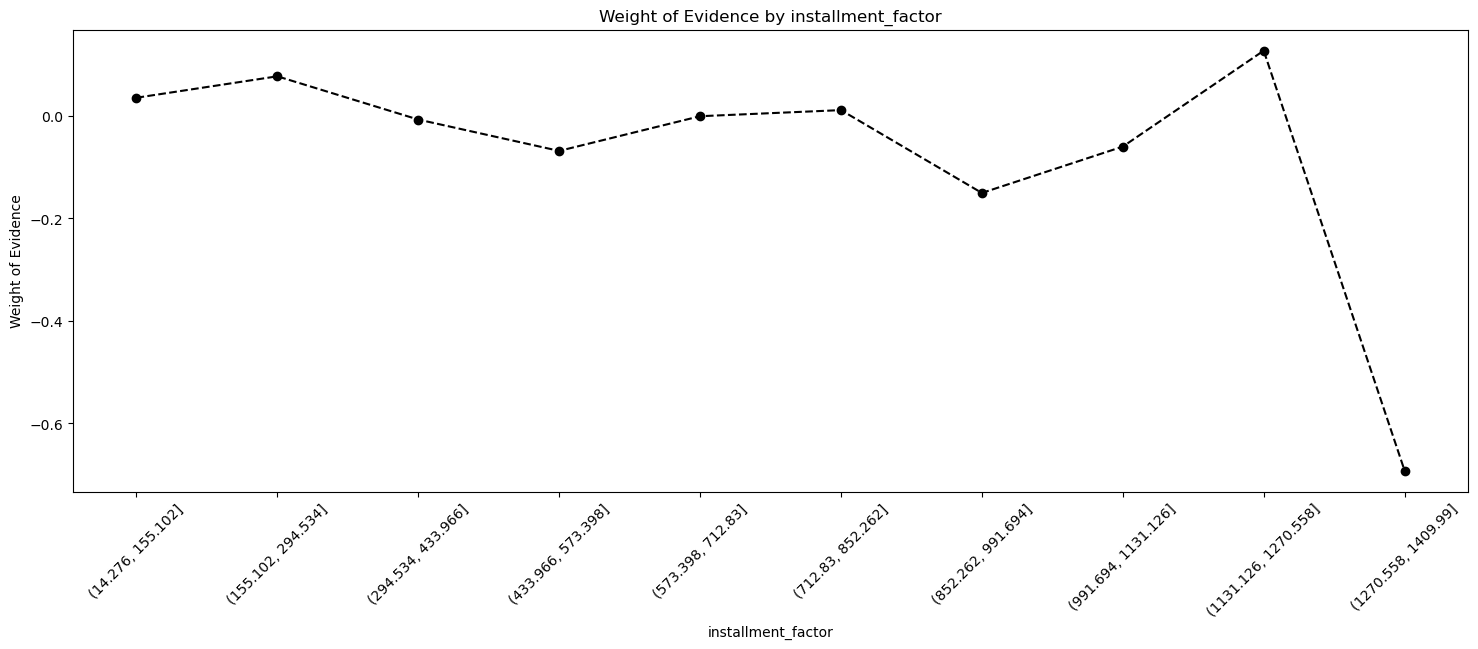

In [162]:
plot_by_woe(df_temp,45)

In [163]:
#No WOE Trend

imputed_df.drop(columns='installment',inplace=True)

In [164]:
imputed_df.shape

(326399, 259)

In [165]:
loan_data_targets_train.shape

(326399, 1)

In [166]:
imputed_df.columns.values

array(['loan_amnt', 'int_rate', 'grade', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'acc_now_delinq', 'emp_length_int',
       'mths_since_earliest_cr_line', 'term_int', 'mths_since_issue_d',
       'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'sub_grade:A1', 'sub_grade:A2', 'sub_grade:A3',
       'sub_grade:A4', 'sub_grade:A5', 'sub_grade:B1', 'sub_grade:B2',
       'sub_grade:B3', 'sub_grade:B4', 'sub_grade:B5', 'sub_grade:C1',
       'sub_grade:C2', 'sub_grade:C3', 'sub_grade:C4', 'sub_grade:C5',
       'sub_grade:D1', 'sub_grade:D2', 'sub_grade:D3', 'sub_grade:D4',
       'sub_grade:D5', 'sub_grade:E1', 'sub_grade:E2', 'sub_grade:E3',
       'sub_grade:E4', 'sub_grade:E5', 'sub_grade:F1', 'sub_grade:F2',
       'sub_grade:F3', '

In [167]:
columns_to_drop_5 = [
    'sub_grade', 'sub_grade:A4', 'sub_grade:A5', 'sub_grade:B1', 'sub_grade:B2',
    'sub_grade:B3', 'sub_grade:B4', 'sub_grade:B5', 'sub_grade:C1',
    'sub_grade:C2', 'sub_grade:C3', 'sub_grade:C4', 'sub_grade:C5',
    'sub_grade:D1', 'sub_grade:D2', 'sub_grade:D3', 'sub_grade:D4',
    'sub_grade:D5', 'sub_grade:E1', 'sub_grade:E2', 'sub_grade:E3',
    'sub_grade:E4', 'sub_grade:E5', 'sub_grade:F1', 'sub_grade:F2',
    'sub_grade:F3', 'sub_grade:F4', 'sub_grade:F5', 'sub_grade:G1',
    'sub_grade:G2', 'sub_grade:G3', 'sub_grade:G4', 'sub_grade:G5',
    'loan_status:Charged Off', 'loan_status:Current', 'loan_status:Default',
    'loan_status:Does not meet the credit policy. Status:Charged Off',
    'loan_status:Does not meet the credit policy. Status:Fully Paid',
    'loan_status:Fully Paid', 'loan_status:In Grace Period',
    'loan_status:Late (16-30 days)', 'loan_status:Late (31-120 days)'
]

In [168]:
imputed_df.drop(columns=columns_to_drop_5,inplace=True)

In [169]:
original_variables_list = [
    'grade',
    'home_ownership',
    'verification_status',
    'purpose',
    'initial_list_status',
    'addr_state',
    'term_int',
    'emp_length_int',
    'annual_inc',
    'dti',
    'delinq_2yrs',
    'inq_last_6mths',
    'open_acc',
    'pub_rec',
    'revol_bal',
    'revol_util',
    'total_acc',
    'acc_now_delinq',
    'mths_since_earliest_cr_line',
    'mths_since_issue_d',
    'loan_amnt',
    'int_rate'
]


In [170]:
imputed_df.drop(columns=original_variables_list, inplace= True)

In [171]:
imputed_df.shape

(326399, 195)

In [172]:
imputed_df.columns.values

array(['loan_status', 'grade:A', 'grade:B', 'grade:C', 'grade:D',
       'grade:E', 'grade:F', 'grade:G', 'sub_grade:A1', 'sub_grade:A2',
       'sub_grade:A3', 'home_ownership:ANY', 'home_ownership:MORTGAGE',
       'home_ownership:NONE', 'home_ownership:OTHER',
       'home_ownership:OWN', 'home_ownership:RENT',
       'verification_status:Not Verified',
       'verification_status:Source Verified',
       'verification_status:Verified', 'purpose:car',
       'purpose:credit_card', 'purpose:debt_consolidation',
       'purpose:educational', 'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'addr_state:AK', 'addr_state:AL', 'addr_state:AR', 'addr_state:AZ',
       'addr_state:CA', 'addr_state:CO', 'addr_state:CT', 'addr_state:DC',
       'addr_state:DE', 'addr_state:FL', 'addr_state:GA', 'add

In [173]:
def get_factor_columns(df):
    """
    This function takes a DataFrame as input and returns a list of column names
    that end with '_factor'.

    Parameters:
    df (pd.DataFrame): The input DataFrame

    Returns:
    list: A list of column names ending with '_factor'
    """
    return [col for col in df.columns if col.endswith('_factor')]

# Example usage:
# Assuming 'df' is your DataFrame
factor_columns = get_factor_columns(imputed_df)
print(factor_columns)


['annual_inc_factor', 'dti_factor', 'revol_bal_factor', 'rrevol_util_factor', 'total_acc_factor', 'collections_12_mths_ex_med_factor', 'tot_coll_amt_factor', 'tot_cur_bal_factor', 'total_rev_hi_lim_factor', 'mths_since_earliest_cr_line_factor', 'mths_since_issue_d_factor', 'loan_amnt_factor', 'int_rate_factor', 'installment_factor']


In [174]:
imputed_df.drop(columns=factor_columns, inplace= True)

In [175]:
imputed_df.shape

(326399, 181)

In [176]:
imputed_df.columns.values

array(['loan_status', 'grade:A', 'grade:B', 'grade:C', 'grade:D',
       'grade:E', 'grade:F', 'grade:G', 'sub_grade:A1', 'sub_grade:A2',
       'sub_grade:A3', 'home_ownership:ANY', 'home_ownership:MORTGAGE',
       'home_ownership:NONE', 'home_ownership:OTHER',
       'home_ownership:OWN', 'home_ownership:RENT',
       'verification_status:Not Verified',
       'verification_status:Source Verified',
       'verification_status:Verified', 'purpose:car',
       'purpose:credit_card', 'purpose:debt_consolidation',
       'purpose:educational', 'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'addr_state:AK', 'addr_state:AL', 'addr_state:AR', 'addr_state:AZ',
       'addr_state:CA', 'addr_state:CO', 'addr_state:CT', 'addr_state:DC',
       'addr_state:DE', 'addr_state:FL', 'addr_state:GA', 'add

In [177]:
columns_to_drop_6 = [
    'sub_grade:A1', 'sub_grade:A2',
       'sub_grade:A3', 'home_ownership:ANY', 'home_ownership:MORTGAGE',
       'home_ownership:NONE', 'home_ownership:OTHER',
       'home_ownership:OWN', 'home_ownership:RENT',
       'purpose:car',
       'purpose:credit_card', 'purpose:debt_consolidation',
       'purpose:educational', 'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'addr_state:AK', 'addr_state:AL', 'addr_state:AR', 'addr_state:AZ',
       'addr_state:CA', 'addr_state:CO', 'addr_state:CT', 'addr_state:DC',
       'addr_state:DE', 'addr_state:FL', 'addr_state:GA', 'addr_state:HI',
       'addr_state:IA', 'addr_state:ID', 'addr_state:IL', 'addr_state:IN',
       'addr_state:KS', 'addr_state:KY', 'addr_state:LA', 'addr_state:MA',
       'addr_state:MD', 'addr_state:ME', 'addr_state:MI', 'addr_state:MN',
       'addr_state:MO', 'addr_state:MS', 'addr_state:MT', 'addr_state:NC',
       'addr_state:NE', 'addr_state:NH', 'addr_state:NJ', 'addr_state:NM',
       'addr_state:NV', 'addr_state:NY', 'addr_state:OH', 'addr_state:OK',
       'addr_state:OR', 'addr_state:PA', 'addr_state:RI', 'addr_state:SC',
       'addr_state:SD', 'addr_state:TN', 'addr_state:TX', 'addr_state:UT',
       'addr_state:VA', 'addr_state:VT', 'addr_state:WA', 'addr_state:WI',
       'addr_state:WV', 'addr_state:WY'
]

In [178]:
imputed_df.drop(columns=columns_to_drop_6, inplace= True)

In [179]:
imputed_df.shape

(326399, 108)

In [180]:
imputed_df.columns.values

array(['loan_status', 'grade:A', 'grade:B', 'grade:C', 'grade:D',
       'grade:E', 'grade:F', 'grade:G',
       'verification_status:Not Verified',
       'verification_status:Source Verified',
       'verification_status:Verified', 'initial_list_status:f',
       'initial_list_status:w', 'home_ownership:RENT_OTHER_NONE_ANY',
       'purpose:sm_b_edu_mov', 'purpose:house_other_ren_en_med',
       'purpose:wedding_vaccation_debt',
       'purpose:home_improv_major_purchase_car_credit_card',
       'addr_state:ND', 'addr_state:ND_NE_IA_NV_FL_HI_AL',
       'addr_state:NM_VA', 'addr_state:OK_TN_MO_LA_MD_NC',
       'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
       'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR',
       'addr_state:WI_MT', 'addr_state:IL_CT',
       'addr_state:KS_SC_CO_VT_AK_MS', 'addr_state:WV_NH_WY_DC_ME_ID',
       'term:36', 'term:60', 'emp_length:0-2', 'emp_length:3-6',
       'emp_length:7-9', 'emp_length:10+', 'annual_inc:<30K',
       'annual_inc:3

In [181]:
imputed_df.drop(columns='loan_status', inplace= True)

In [182]:
imputed_df.shape

(326399, 107)

In [183]:
loan_data_targets_train.shape

(326399, 1)

## Feature Selection & Engineering in Test data

In [184]:
loan_data_inputs_test.shape

(139886, 179)

In [185]:
loan_data_targets_test.shape

(139886, 1)

In [186]:
columns_to_drop_test = [
    'mths_since_last_record',
    'mths_since_last_major_derog',
    'mths_since_last_delinq',
    'next_pymnt_d'
]

In [187]:
loan_data_inputs_test.drop(columns=columns_to_drop_test, inplace= True)

In [188]:
columns_for_imputation

['total_rev_hi_lim',
 'tot_cur_bal',
 'tot_coll_amt',
 'emp_title',
 'emp_length',
 'emp_length_int',
 'last_pymnt_d',
 'revol_util',
 'collections_12_mths_ex_med',
 'last_credit_pull_d',
 'acc_now_delinq',
 'open_acc',
 'pub_rec',
 'mths_since_earliest_cr_line',
 'earliest_cr_line_date',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'total_acc',
 'annual_inc']

In [189]:
loan_data_inputs_test.shape

(139886, 175)

In [190]:
imputed_df_test = imputation(loan_data_inputs_test,columns_for_imputation)

In [191]:
# This is based on requirements
columns_to_drop_2 = ['term','emp_title','emp_length','issue_d','issue_d_date','pymnt_plan','earliest_cr_line','earliest_cr_line_date','last_pymnt_d','last_credit_pull_d']

imputed_df_test.drop(columns=columns_to_drop_2, inplace= True)

imputed_df_test.shape

(139886, 165)

In [192]:
columns_to_drop_3 = ['funded_amnt','funded_amnt_inv']

imputed_df_test.drop(columns=columns_to_drop_3, inplace= True)

imputed_df_test.shape

(139886, 163)

In [193]:
# On-going performance related variables to be dropped as we want to predict default probability before the loan is booked

columns_to_drop_4 = ['total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp','recoveries','collection_recovery_fee']

imputed_df_test.drop(columns = columns_to_drop_4,inplace = True)

imputed_df_test.shape


(139886, 156)

In [194]:
imputed_df_test['home_ownership:RENT_OTHER_NONE_ANY'] = sum([imputed_df_test['home_ownership:RENT'], imputed_df_test['home_ownership:OTHER'],
                                                            imputed_df_test['home_ownership:NONE'], imputed_df_test['home_ownership:ANY']])

In [195]:
imputed_df_test['purpose:sm_b_edu_mov'] = sum([imputed_df_test['purpose:educational'], imputed_df_test['purpose:small_business'],
                                         imputed_df_test['purpose:moving']])

imputed_df_test['purpose:house_other_ren_en_med'] = sum([imputed_df_test['purpose:house'], imputed_df_test['purpose:other'],
                                         imputed_df_test['purpose:renewable_energy'],imputed_df_test['purpose:medical']])

imputed_df_test['purpose:wedding_vaccation_debt'] = sum([imputed_df_test['purpose:wedding'], imputed_df_test['purpose:vacation'],
                                         imputed_df_test['purpose:debt_consolidation']])

imputed_df_test['purpose:home_improv_major_purchase_car_credit_card'] = sum([imputed_df_test['purpose:home_improvement'], imputed_df_test['purpose:major_purchase'],
                                         imputed_df_test['purpose:car'],imputed_df_test['purpose:credit_card']])


In [196]:
if ['addr_state:ND'] in imputed_df_test.columns.values:
    pass
else:
    imputed_df_test['addr_state:ND'] = 0

In [197]:
imputed_df_test['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([imputed_df_test['addr_state:ND'], imputed_df_test['addr_state:NE'],
                                                         imputed_df_test['addr_state:IA'], imputed_df_test['addr_state:NV'],
                                                         imputed_df_test['addr_state:FL'], imputed_df_test['addr_state:HI'],
                                                         imputed_df_test['addr_state:AL']])

imputed_df_test['addr_state:NM_VA'] = sum([imputed_df_test['addr_state:NM'], imputed_df_test['addr_state:VA']])

imputed_df_test['addr_state:OK_TN_MO_LA_MD_NC'] = sum([imputed_df_test['addr_state:OK'], imputed_df_test['addr_state:TN'],
                                              imputed_df_test['addr_state:MO'], imputed_df_test['addr_state:LA'],
                                              imputed_df_test['addr_state:MD'], imputed_df_test['addr_state:NC']])

imputed_df_test['addr_state:UT_KY_AZ_NJ'] = sum([imputed_df_test['addr_state:UT'], imputed_df_test['addr_state:KY'],
                                              imputed_df_test['addr_state:AZ'], imputed_df_test['addr_state:NJ']])

imputed_df_test['addr_state:AR_MI_PA_OH_MN'] = sum([imputed_df_test['addr_state:AR'], imputed_df_test['addr_state:MI'],
                                              imputed_df_test['addr_state:PA'], imputed_df_test['addr_state:OH'],
                                              imputed_df_test['addr_state:MN']])

imputed_df_test['addr_state:RI_MA_DE_SD_IN'] = sum([imputed_df_test['addr_state:RI'], imputed_df_test['addr_state:MA'],
                                              imputed_df_test['addr_state:DE'], imputed_df_test['addr_state:SD'],
                                              imputed_df_test['addr_state:IN']])

imputed_df_test['addr_state:GA_WA_OR'] = sum([imputed_df_test['addr_state:GA'], imputed_df_test['addr_state:WA'],
                                              imputed_df_test['addr_state:OR']])

imputed_df_test['addr_state:WI_MT'] = sum([imputed_df_test['addr_state:WI'], imputed_df_test['addr_state:MT']])

imputed_df_test['addr_state:IL_CT'] = sum([imputed_df_test['addr_state:IL'], imputed_df_test['addr_state:CT']])

imputed_df_test['addr_state:KS_SC_CO_VT_AK_MS'] = sum([imputed_df_test['addr_state:KS'], imputed_df_test['addr_state:SC'],
                                              imputed_df_test['addr_state:CO'], imputed_df_test['addr_state:VT'],
                                              imputed_df_test['addr_state:AK'], imputed_df_test['addr_state:MS']])

imputed_df_test['addr_state:WV_NH_WY_DC_ME_ID'] = sum([imputed_df_test['addr_state:WV'], imputed_df_test['addr_state:NH'],
                                              imputed_df_test['addr_state:WY'], imputed_df_test['addr_state:DC'],
                                              imputed_df_test['addr_state:ME'], imputed_df_test['addr_state:ID']])

In [198]:
imputed_df_test['term:36'] = np.where((imputed_df_test['term_int'] == 36), 1, 0)
imputed_df_test['term:60'] = np.where((imputed_df_test['term_int'] == 60), 1, 0)

In [199]:
# Grouping employment length based on revised categories
imputed_df_test['emp_length:0-2'] = np.where(imputed_df_test['emp_length_int'].isin(range(0, 3)), 1, 0)
imputed_df_test['emp_length:3-6'] = np.where(imputed_df_test['emp_length_int'].isin(range(3, 7)), 1, 0)
imputed_df_test['emp_length:7-9'] = np.where(imputed_df_test['emp_length_int'].isin(range(7, 10)), 1, 0)
imputed_df_test['emp_length:10+'] = np.where(imputed_df_test['emp_length_int'] >= 10, 1, 0)

In [200]:
imputed_df_test['annual_inc:<30K'] = np.where((imputed_df_test['annual_inc'] <= 30000), 1, 0)
imputed_df_test['annual_inc:30K-40K'] = np.where((imputed_df_test['annual_inc'] > 30000) & (imputed_df_test['annual_inc'] <= 40000), 1, 0)
imputed_df_test['annual_inc:40K-50K'] = np.where((imputed_df_test['annual_inc'] > 40000) & (imputed_df_test['annual_inc'] <= 50000), 1, 0)
imputed_df_test['annual_inc:50K-60K'] = np.where((imputed_df_test['annual_inc'] > 50000) & (imputed_df_test['annual_inc'] <= 60000), 1, 0)
imputed_df_test['annual_inc:60K-70K'] = np.where((imputed_df_test['annual_inc'] > 60000) & (imputed_df_test['annual_inc'] <= 70000), 1, 0)
imputed_df_test['annual_inc:70K-80K'] = np.where((imputed_df_test['annual_inc'] > 70000) & (imputed_df_test['annual_inc'] <= 80000), 1, 0)
imputed_df_test['annual_inc:80K-90K'] = np.where((imputed_df_test['annual_inc'] > 80000) & (imputed_df_test['annual_inc'] <= 90000), 1, 0)
imputed_df_test['annual_inc:90K-100K'] = np.where((imputed_df_test['annual_inc'] > 90000) & (imputed_df_test['annual_inc'] <= 100000), 1, 0)
imputed_df_test['annual_inc:100K-120K'] = np.where((imputed_df_test['annual_inc'] > 100000) & (imputed_df_test['annual_inc'] <= 120000), 1, 0)
imputed_df_test['annual_inc:120K-140K'] = np.where((imputed_df_test['annual_inc'] > 120000) & (imputed_df_test['annual_inc'] <= 140000), 1, 0)
imputed_df_test['annual_inc:>140K'] = np.where((imputed_df_test['annual_inc'] > 140000), 1, 0)

In [201]:
imputed_df_test['dti:<=1.4'] = np.where((imputed_df_test['dti'] <= 1.4), 1, 0)
imputed_df_test['dti:1.4-3.5'] = np.where((imputed_df_test['dti'] > 1.4) & (imputed_df_test['dti'] <= 3.5), 1, 0)
imputed_df_test['dti:3.5-7.7'] = np.where((imputed_df_test['dti'] > 3.5) & (imputed_df_test['dti'] <= 7.7), 1, 0)
imputed_df_test['dti:7.7-10.5'] = np.where((imputed_df_test['dti'] > 7.7) & (imputed_df_test['dti'] <= 10.5), 1, 0)
imputed_df_test['dti:10.5-16.1'] = np.where((imputed_df_test['dti'] > 10.5) & (imputed_df_test['dti'] <= 16.1), 1, 0)
imputed_df_test['dti:16.1-20.3'] = np.where((imputed_df_test['dti'] > 16.1) & (imputed_df_test['dti'] <= 20.3), 1, 0)
imputed_df_test['dti:20.3-21.7'] = np.where((imputed_df_test['dti'] > 20.3) & (imputed_df_test['dti'] <= 21.7), 1, 0)
imputed_df_test['dti:21.7-22.4'] = np.where((imputed_df_test['dti'] > 21.7) & (imputed_df_test['dti'] <= 22.4), 1, 0)
imputed_df_test['dti:22.4-35'] = np.where((imputed_df_test['dti'] > 22.4) & (imputed_df_test['dti'] <= 35), 1, 0)
imputed_df_test['dti:>35'] = np.where((imputed_df_test['dti'] > 35), 1, 0)

In [202]:
imputed_df_test['delinq_2yrs:0'] = np.where((imputed_df_test['delinq_2yrs'] == 0), 1, 0)
imputed_df_test['delinq_2yrs:1-3'] = np.where((imputed_df_test['delinq_2yrs'] >= 1) & (imputed_df_test['delinq_2yrs'] <= 3), 1, 0)
imputed_df_test['delinq_2yrs:>=4'] = np.where((imputed_df_test['delinq_2yrs'] >= 9), 1, 0)

In [203]:
imputed_df_test['inq_last_6mths:0'] = np.where((imputed_df_test['inq_last_6mths'] == 0), 1, 0)
imputed_df_test['inq_last_6mths:1-2'] = np.where((imputed_df_test['inq_last_6mths'] >= 1) & (imputed_df_test['inq_last_6mths'] <= 2), 1, 0)
imputed_df_test['inq_last_6mths:3-6'] = np.where((imputed_df_test['inq_last_6mths'] >= 3) & (imputed_df_test['inq_last_6mths'] <= 6), 1, 0)
imputed_df_test['inq_last_6mths:>6'] = np.where((imputed_df_test['inq_last_6mths'] > 6), 1, 0)

In [204]:
imputed_df_test['open_acc:0'] = np.where((imputed_df_test['open_acc'] == 0), 1, 0)
imputed_df_test['open_acc:1-3'] = np.where((imputed_df_test['open_acc'] >= 1) & (imputed_df_test['open_acc'] <= 3), 1, 0)
imputed_df_test['open_acc:4-12'] = np.where((imputed_df_test['open_acc'] >= 4) & (imputed_df_test['open_acc'] <= 12), 1, 0)
imputed_df_test['open_acc:13-17'] = np.where((imputed_df_test['open_acc'] >= 13) & (imputed_df_test['open_acc'] <= 17), 1, 0)
imputed_df_test['open_acc:18-22'] = np.where((imputed_df_test['open_acc'] >= 18) & (imputed_df_test['open_acc'] <= 22), 1, 0)
imputed_df_test['open_acc:23-25'] = np.where((imputed_df_test['open_acc'] >= 23) & (imputed_df_test['open_acc'] <= 25), 1, 0)
imputed_df_test['open_acc:26-30'] = np.where((imputed_df_test['open_acc'] >= 26) & (imputed_df_test['open_acc'] <= 30), 1, 0)
imputed_df_test['open_acc:>=31'] = np.where((imputed_df_test['open_acc'] >= 31), 1, 0)

In [205]:
imputed_df_test['pub_rec:0-2'] = np.where((imputed_df_test['pub_rec'] >= 0) & (imputed_df_test['pub_rec'] <= 2), 1, 0)
imputed_df_test['pub_rec:3-4'] = np.where((imputed_df_test['pub_rec'] >= 3) & (imputed_df_test['pub_rec'] <= 4), 1, 0)
imputed_df_test['pub_rec:>=5'] = np.where((imputed_df_test['pub_rec'] >= 5), 1, 0)

In [206]:
imputed_df_test['revol_bal:0-10000'] = np.where((imputed_df_test['revol_bal'] >= 0) & (imputed_df_test['revol_bal'] <= 100000), 1, 0)
imputed_df_test['revol_bal:100000-400000'] = np.where((imputed_df_test['revol_bal'] >= 100000) & (imputed_df_test['revol_bal'] <= 400000), 1, 0)
imputed_df_test['revol_bal:>400000'] = np.where((imputed_df_test['revol_bal'] >400000), 1, 0)

In [207]:
imputed_df_test['revol_util:0-35'] = np.where((imputed_df_test['revol_util'] >= 0) & (imputed_df_test['revol_util'] <= 35), 1, 0)
imputed_df_test['revol_util:36-70'] = np.where((imputed_df_test['revol_util'] >= 36) & (imputed_df_test['revol_util'] <= 70), 1, 0)
imputed_df_test['revol_util:>70'] = np.where((imputed_df_test['revol_util'] >70), 1, 0)

In [208]:
imputed_df_test['total_acc:0-30'] = np.where((imputed_df_test['total_acc'] >= 0) & (imputed_df_test['total_acc'] <= 30), 1, 0)
imputed_df_test['total_acc:31-90'] = np.where((imputed_df_test['total_acc'] >= 31) & (imputed_df_test['total_acc'] <= 90), 1, 0)
imputed_df_test['total_acc:>90'] = np.where((imputed_df_test['total_acc'] >90), 1, 0)

In [209]:
imputed_df_test.drop(columns='last_pymnt_amnt', inplace=True)

In [210]:
imputed_df_test.drop(columns = 'collections_12_mths_ex_med',inplace= True)

In [211]:
imputed_df_test['acc_now_delinq:0'] = np.where((imputed_df_test['acc_now_delinq'] == 0), 1, 0)
imputed_df_test['acc_now_delinq:1'] = np.where((imputed_df_test['acc_now_delinq'] == 1), 1, 0)
imputed_df_test['acc_now_delinq:>1'] = np.where((imputed_df_test['acc_now_delinq'] >1), 1, 0)

In [212]:
imputed_df_test.drop(columns='tot_coll_amt',inplace=True)

In [213]:
imputed_df_test.drop(columns='tot_cur_bal', inplace= True)

In [214]:
imputed_df_test.drop(columns='total_rev_hi_lim', inplace= True)

In [215]:
imputed_df_test['mths_since_earliest_cr_line:<140'] = np.where(imputed_df_test['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
imputed_df_test['mths_since_earliest_cr_line:141-164'] = np.where(imputed_df_test['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
imputed_df_test['mths_since_earliest_cr_line:165-247'] = np.where(imputed_df_test['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
imputed_df_test['mths_since_earliest_cr_line:248-270'] = np.where(imputed_df_test['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
imputed_df_test['mths_since_earliest_cr_line:271-352'] = np.where(imputed_df_test['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
imputed_df_test['mths_since_earliest_cr_line:>352'] = np.where(imputed_df_test['mths_since_earliest_cr_line'].isin(range(353, int(imputed_df_test['mths_since_earliest_cr_line'].max()))), 1, 0)

In [216]:
imputed_df_test['mths_since_issue_d:<38'] = np.where(imputed_df_test['mths_since_issue_d'].isin(range(38)), 1, 0)
imputed_df_test['mths_since_issue_d:38-39'] = np.where(imputed_df_test['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
imputed_df_test['mths_since_issue_d:40-41'] = np.where(imputed_df_test['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
imputed_df_test['mths_since_issue_d:42-48'] = np.where(imputed_df_test['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
imputed_df_test['mths_since_issue_d:49-52'] = np.where(imputed_df_test['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
imputed_df_test['mths_since_issue_d:53-64'] = np.where(imputed_df_test['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
imputed_df_test['mths_since_issue_d:>65'] = np.where(imputed_df_test['mths_since_issue_d'].isin(range(65, int(imputed_df_test['mths_since_issue_d'].max()))), 1, 0)

In [217]:
imputed_df_test['loan_amnt:<14K'] = np.where(imputed_df_test['loan_amnt'].isin(range(14000)), 1, 0)
imputed_df_test['loan_amnt:14K-28K'] = np.where(imputed_df_test['loan_amnt'].isin(range(14000, 28000)), 1, 0)
imputed_df_test['loan_amnt>28K'] = np.where(imputed_df_test['loan_amnt']>28000, 1, 0)

In [218]:
imputed_df_test['int_rate:<9.548'] = np.where((imputed_df_test['int_rate'] <= 9.548), 1, 0)
imputed_df_test['int_rate:9.548-12.025'] = np.where((imputed_df_test['int_rate'] > 9.548) & (imputed_df_test['int_rate'] <= 12.025), 1, 0)
imputed_df_test['int_rate:12.025-15.74'] = np.where((imputed_df_test['int_rate'] > 12.025) & (imputed_df_test['int_rate'] <= 15.74), 1, 0)
imputed_df_test['int_rate:15.74-20.281'] = np.where((imputed_df_test['int_rate'] > 15.74) & (imputed_df_test['int_rate'] <= 20.281), 1, 0)
imputed_df_test['int_rate:>20.281'] = np.where((imputed_df_test['int_rate'] > 20.281), 1, 0)

In [219]:
imputed_df_test.drop(columns='installment',inplace=True)

In [220]:
columns_to_drop_5 = [
    'sub_grade', 'sub_grade:A4', 'sub_grade:A5', 'sub_grade:B1', 'sub_grade:B2',
    'sub_grade:B3', 'sub_grade:B4', 'sub_grade:B5', 'sub_grade:C1',
    'sub_grade:C2', 'sub_grade:C3', 'sub_grade:C4', 'sub_grade:C5',
    'sub_grade:D1', 'sub_grade:D2', 'sub_grade:D3', 'sub_grade:D4',
    'sub_grade:D5', 'sub_grade:E1', 'sub_grade:E2', 'sub_grade:E3',
    'sub_grade:E4', 'sub_grade:E5', 'sub_grade:F1', 'sub_grade:F2',
    'sub_grade:F3', 'sub_grade:F4', 'sub_grade:F5', 'sub_grade:G1',
    'sub_grade:G2', 'sub_grade:G3', 'sub_grade:G4', 'sub_grade:G5',
    'loan_status:Charged Off', 'loan_status:Current', 'loan_status:Default',
    'loan_status:Does not meet the credit policy. Status:Charged Off',
    'loan_status:Does not meet the credit policy. Status:Fully Paid',
    'loan_status:Fully Paid', 'loan_status:In Grace Period',
    'loan_status:Late (16-30 days)', 'loan_status:Late (31-120 days)'
]

In [221]:
imputed_df_test.drop(columns=columns_to_drop_5,inplace=True)

In [222]:
original_variables_list = [
    'grade',
    'home_ownership',
    'verification_status',
    'purpose',
    'initial_list_status',
    'addr_state',
    'term_int',
    'emp_length_int',
    'annual_inc',
    'dti',
    'delinq_2yrs',
    'inq_last_6mths',
    'open_acc',
    'pub_rec',
    'revol_bal',
    'revol_util',
    'total_acc',
    'acc_now_delinq',
    'mths_since_earliest_cr_line',
    'mths_since_issue_d',
    'loan_amnt',
    'int_rate'
]

In [223]:
imputed_df_test.drop(columns=original_variables_list, inplace= True)

In [224]:
def get_factor_columns(df):
    """
    This function takes a DataFrame as input and returns a list of column names
    that end with '_factor'.

    Parameters:
    df (pd.DataFrame): The input DataFrame

    Returns:
    list: A list of column names ending with '_factor'
    """
    return [col for col in df.columns if col.endswith('_factor')]

# Example usage:
# Assuming 'df' is your DataFrame
factor_columns = get_factor_columns(imputed_df_test)
print(factor_columns)

[]


In [225]:
columns_to_drop_6 = [
    'sub_grade:A1', 'sub_grade:A2',
       'sub_grade:A3', 'home_ownership:ANY', 'home_ownership:MORTGAGE',
       'home_ownership:NONE', 'home_ownership:OTHER',
       'home_ownership:OWN', 'home_ownership:RENT',
       'purpose:car',
       'purpose:credit_card', 'purpose:debt_consolidation',
       'purpose:educational', 'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'addr_state:AK', 'addr_state:AL', 'addr_state:AR', 'addr_state:AZ',
       'addr_state:CA', 'addr_state:CO', 'addr_state:CT', 'addr_state:DC',
       'addr_state:DE', 'addr_state:FL', 'addr_state:GA', 'addr_state:HI',
       'addr_state:IA', 'addr_state:ID', 'addr_state:IL', 'addr_state:IN',
       'addr_state:KS', 'addr_state:KY', 'addr_state:LA', 'addr_state:MA',
       'addr_state:MD', 'addr_state:ME', 'addr_state:MI', 'addr_state:MN',
       'addr_state:MO', 'addr_state:MS', 'addr_state:MT', 'addr_state:NC',
       'addr_state:NE', 'addr_state:NH', 'addr_state:NJ', 'addr_state:NM',
       'addr_state:NV', 'addr_state:NY', 'addr_state:OH', 'addr_state:OK',
       'addr_state:OR', 'addr_state:PA', 'addr_state:RI', 'addr_state:SC',
       'addr_state:SD', 'addr_state:TN', 'addr_state:TX', 'addr_state:UT',
       'addr_state:VA', 'addr_state:VT', 'addr_state:WA', 'addr_state:WI',
       'addr_state:WV', 'addr_state:WY'
]

In [226]:
imputed_df_test.drop(columns=columns_to_drop_6, inplace= True)

In [227]:
imputed_df_test.drop(columns='loan_status', inplace= True)

In [228]:
imputed_df_test.shape

(139886, 107)

In [229]:
imputed_df.shape

(326399, 107)

In [230]:
loan_data_targets_train.shape

(326399, 1)

In [231]:
loan_data_targets_test.shape

(139886, 1)

In [232]:
imputed_df_test.columns.values == imputed_df.columns.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [233]:
imputed_df.to_csv('X_train.csv', index=False)
loan_data_targets_train.to_csv('Y_train.csv', index=False)
imputed_df_test.to_csv('X_test.csv', index=False)
loan_data_targets_test.to_csv('Y_test.csv', index=False)

# Model Estimate

## Stats Logit Model

In [234]:
X_train = pd.read_csv('X_train.csv')
Y_train = pd.read_csv('Y_train.csv')
X_test = pd.read_csv('X_test.csv')
Y_test = pd.read_csv('Y_test.csv')

In [235]:
# Remove columns with near-zero variance
constant_columns = [col for col in X_train.columns if X_train[col].nunique() == 1]

In [236]:
constant_columns

['addr_state:ND']

In [237]:
X_train.drop(columns='addr_state:ND', inplace= True)
X_test.drop(columns='addr_state:ND', inplace= True)

print(X_train.shape)
print(X_test.shape)

(326399, 106)
(139886, 106)


In [238]:
X_train.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'verification_status:Not Verified',
       'verification_status:Source Verified',
       'verification_status:Verified', 'initial_list_status:f',
       'initial_list_status:w', 'home_ownership:RENT_OTHER_NONE_ANY',
       'purpose:sm_b_edu_mov', 'purpose:house_other_ren_en_med',
       'purpose:wedding_vaccation_debt',
       'purpose:home_improv_major_purchase_car_credit_card',
       'addr_state:ND_NE_IA_NV_FL_HI_AL', 'addr_state:NM_VA',
       'addr_state:OK_TN_MO_LA_MD_NC', 'addr_state:UT_KY_AZ_NJ',
       'addr_state:AR_MI_PA_OH_MN', 'addr_state:RI_MA_DE_SD_IN',
       'addr_state:GA_WA_OR', 'addr_state:WI_MT', 'addr_state:IL_CT',
       'addr_state:KS_SC_CO_VT_AK_MS', 'addr_state:WV_NH_WY_DC_ME_ID',
       'term:36', 'term:60', 'emp_length:0-2', 'emp_length:3-6',
       'emp_length:7-9', 'emp_length:10+', 'annual_inc:<30K',
       'annual_inc:30K-40K', 'annual_inc:40K-50K', 'annual_inc:50K

In [239]:
reference_category = [
    'grade:G',
    'verification_status:Source Verified',
    'initial_list_status:f',
    'home_ownership:RENT_OTHER_NONE_ANY',
    'purpose:sm_b_edu_mov',
    'addr_state:ND_NE_IA_NV_FL_HI_AL',
    'term:60',
    'emp_length:0-2',
    'annual_inc:<30K',
    'dti:<=1.4',
    'delinq_2yrs:>=4',
    'inq_last_6mths:>6',
    'open_acc:0',
    'pub_rec:>=5',
    'revol_bal:>400000',
    'revol_util:>70',
    'total_acc:0-30',
    'acc_now_delinq:>1',
    'mths_since_earliest_cr_line:<140',
    'mths_since_issue_d:>65',
    'loan_amnt>28K',
    'int_rate:>20.281'
]

In [240]:
X_train_cleaned = X_train.drop(columns=reference_category, errors='ignore')

In [241]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score


# Fit the logistic regression model
logit_model = sm.Logit(Y_train, X_train_cleaned)
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.320096
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               good_bad   No. Observations:               326399
Model:                          Logit   Df Residuals:                   326315
Method:                           MLE   Df Model:                           83
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                 0.07077
Time:                        22:20:37   Log-Likelihood:            -1.0448e+05
converged:                       True   LL-Null:                   -1.1244e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
grade:A                     

In [242]:
X_train_cleaned.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'verification_status:Not Verified', 'verification_status:Verified',
       'initial_list_status:w', 'purpose:house_other_ren_en_med',
       'purpose:wedding_vaccation_debt',
       'purpose:home_improv_major_purchase_car_credit_card',
       'addr_state:NM_VA', 'addr_state:OK_TN_MO_LA_MD_NC',
       'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
       'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR',
       'addr_state:WI_MT', 'addr_state:IL_CT',
       'addr_state:KS_SC_CO_VT_AK_MS', 'addr_state:WV_NH_WY_DC_ME_ID',
       'term:36', 'emp_length:3-6', 'emp_length:7-9', 'emp_length:10+',
       'annual_inc:30K-40K', 'annual_inc:40K-50K', 'annual_inc:50K-60K',
       'annual_inc:60K-70K', 'annual_inc:70K-80K', 'annual_inc:80K-90K',
       'annual_inc:90K-100K', 'annual_inc:100K-120K',
       'annual_inc:120K-140K', 'annual_inc:>140K', 'dti:1.4-3.5',
       'dti:3.5-7.7', 'dti:7.7-10.5', 'dti:10.5-

In [243]:
# If most of the categories from original categorical column are insignificant, drop them
#dtis
#open_acc
#revol_bal
# revol_util
#total_acc
# acc_now_delinq:

insignificant_columns_to_drop = [
    'dti:1.4-3.5',
    'dti:3.5-7.7', 'dti:7.7-10.5', 'dti:10.5-16.1', 'dti:16.1-20.3',
    'dti:20.3-21.7', 'dti:21.7-22.4', 'dti:22.4-35', 'dti:>35',
    'open_acc:1-3',
    'open_acc:4-12', 'open_acc:13-17', 'open_acc:18-22',
    'open_acc:23-25', 'open_acc:26-30', 'open_acc:>=31',
    'revol_bal:0-10000', 'revol_bal:100000-400000',
    'revol_util:0-35', 'revol_util:36-70', 
    'total_acc:31-90',
    'total_acc:>90','acc_now_delinq:0', 'acc_now_delinq:1'
]

In [244]:
X_train_cleaned.drop(columns=insignificant_columns_to_drop, inplace= True)

In [245]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

# Now proceed with fitting your logistic regression model using the cleaned data with intercept
logit_model = sm.Logit(Y_train, X_train_cleaned)
result = logit_model.fit()


print(result.summary())

Optimization terminated successfully.
         Current function value: 0.320537
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               good_bad   No. Observations:               326399
Model:                          Logit   Df Residuals:                   326339
Method:                           MLE   Df Model:                           59
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                 0.06949
Time:                        22:20:45   Log-Likelihood:            -1.0462e+05
converged:                       True   LL-Null:                   -1.1244e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
grade:A                     

In [246]:
X_train_cleaned.drop(columns = ['pub_rec:0-2','pub_rec:3-4'], inplace= True)

In [247]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score


# Now proceed with fitting your logistic regression model using the cleaned data with intercept
logit_model = sm.Logit(Y_train, X_train_cleaned)
result = logit_model.fit()


print(result.summary())

Optimization terminated successfully.
         Current function value: 0.320661
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               good_bad   No. Observations:               326399
Model:                          Logit   Df Residuals:                   326341
Method:                           MLE   Df Model:                           57
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                 0.06913
Time:                        22:20:53   Log-Likelihood:            -1.0466e+05
converged:                       True   LL-Null:                   -1.1244e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
grade:A                     

In [248]:
X_train_cleaned.drop(columns = ['verification_status:Verified','verification_status:Not Verified','emp_length:10+','emp_length:7-9','emp_length:3-6'], inplace= True)

In [249]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score


# Now proceed with fitting your logistic regression model using the cleaned data with intercept
logit_model = sm.Logit(Y_train, X_train_cleaned)
result = logit_model.fit()


print(result.summary())

Optimization terminated successfully.
         Current function value: 0.320732
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               good_bad   No. Observations:               326399
Model:                          Logit   Df Residuals:                   326346
Method:                           MLE   Df Model:                           52
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                 0.06892
Time:                        22:21:00   Log-Likelihood:            -1.0469e+05
converged:                       True   LL-Null:                   -1.1244e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
grade:A                     

In [250]:
X_test.shape

(139886, 106)

In [251]:
X_test_cleaned = X_test.drop(columns=reference_category, errors='ignore')

In [252]:
X_train_cleaned.columns.to_list()

['grade:A',
 'grade:B',
 'grade:C',
 'grade:D',
 'grade:E',
 'grade:F',
 'initial_list_status:w',
 'purpose:house_other_ren_en_med',
 'purpose:wedding_vaccation_debt',
 'purpose:home_improv_major_purchase_car_credit_card',
 'addr_state:NM_VA',
 'addr_state:OK_TN_MO_LA_MD_NC',
 'addr_state:UT_KY_AZ_NJ',
 'addr_state:AR_MI_PA_OH_MN',
 'addr_state:RI_MA_DE_SD_IN',
 'addr_state:GA_WA_OR',
 'addr_state:WI_MT',
 'addr_state:IL_CT',
 'addr_state:KS_SC_CO_VT_AK_MS',
 'addr_state:WV_NH_WY_DC_ME_ID',
 'term:36',
 'annual_inc:30K-40K',
 'annual_inc:40K-50K',
 'annual_inc:50K-60K',
 'annual_inc:60K-70K',
 'annual_inc:70K-80K',
 'annual_inc:80K-90K',
 'annual_inc:90K-100K',
 'annual_inc:100K-120K',
 'annual_inc:120K-140K',
 'annual_inc:>140K',
 'delinq_2yrs:0',
 'delinq_2yrs:1-3',
 'inq_last_6mths:0',
 'inq_last_6mths:1-2',
 'inq_last_6mths:3-6',
 'mths_since_earliest_cr_line:141-164',
 'mths_since_earliest_cr_line:165-247',
 'mths_since_earliest_cr_line:248-270',
 'mths_since_earliest_cr_line:271-

In [253]:
columns_for_test = [
 'grade:A',
 'grade:B',
 'grade:C',
 'grade:D',
 'grade:E',
 'grade:F',
 'initial_list_status:w',
 'purpose:house_other_ren_en_med',
 'purpose:wedding_vaccation_debt',
 'purpose:home_improv_major_purchase_car_credit_card',
 'addr_state:NM_VA',
 'addr_state:OK_TN_MO_LA_MD_NC',
 'addr_state:UT_KY_AZ_NJ',
 'addr_state:AR_MI_PA_OH_MN',
 'addr_state:RI_MA_DE_SD_IN',
 'addr_state:GA_WA_OR',
 'addr_state:WI_MT',
 'addr_state:IL_CT',
 'addr_state:KS_SC_CO_VT_AK_MS',
 'addr_state:WV_NH_WY_DC_ME_ID',
 'term:36',
 'annual_inc:30K-40K',
 'annual_inc:40K-50K',
 'annual_inc:50K-60K',
 'annual_inc:60K-70K',
 'annual_inc:70K-80K',
 'annual_inc:80K-90K',
 'annual_inc:90K-100K',
 'annual_inc:100K-120K',
 'annual_inc:120K-140K',
 'annual_inc:>140K',
 'delinq_2yrs:0',
 'delinq_2yrs:1-3',
 'inq_last_6mths:0',
 'inq_last_6mths:1-2',
 'inq_last_6mths:3-6',
 'mths_since_earliest_cr_line:141-164',
 'mths_since_earliest_cr_line:165-247',
 'mths_since_earliest_cr_line:248-270',
 'mths_since_earliest_cr_line:271-352',
 'mths_since_earliest_cr_line:>352',
 'mths_since_issue_d:<38',
 'mths_since_issue_d:38-39',
 'mths_since_issue_d:40-41',
 'mths_since_issue_d:42-48',
 'mths_since_issue_d:49-52',
 'mths_since_issue_d:53-64',
 'loan_amnt:<14K',
 'loan_amnt:14K-28K',
 'int_rate:<9.548',
 'int_rate:9.548-12.025',
 'int_rate:12.025-15.74',
 'int_rate:15.74-20.281']

In [254]:
X_test_cleaned = X_test_cleaned[columns_for_test]

In [255]:
X_test_cleaned.shape

(139886, 53)

In [256]:
X_train_cleaned.shape

(326399, 53)

In [257]:
#X_train_cleaned.drop(columns='const',inplace= True)

In [258]:
# Predict on the test set
y_pred_prob = result.predict(X_test_cleaned)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

In [259]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


In [260]:
import pandas as pd
import numpy as np

# Optional: Get odds ratios (exponentiated coefficients)
odds_ratios = pd.DataFrame({
    'Variables': X_train_cleaned.columns,
    'Odds Ratios': result.params.apply(lambda x: round(np.exp(x), 2))  # Use np.exp() instead of sm.exp()
})

print(odds_ratios)

                                                                                            Variables  \
grade:A                                                                                       grade:A   
grade:B                                                                                       grade:B   
grade:C                                                                                       grade:C   
grade:D                                                                                       grade:D   
grade:E                                                                                       grade:E   
grade:F                                                                                       grade:F   
initial_list_status:w                                                           initial_list_status:w   
purpose:house_other_ren_en_med                                         purpose:house_other_ren_en_med   
purpose:wedding_vaccation_debt                         

In [261]:
odds_ratios = odds_ratios.reset_index(drop=True)

In [262]:
odds_ratios

,Variables,Odds Ratios
0,grade:A,2.91
1,grade:B,2.29
2,grade:C,1.86
3,grade:D,1.55
4,grade:E,1.29
5,grade:F,1.06
6,initial_list_status:w,1.05
7,purpose:house_other_ren_en_med,1.36
8,purpose:wedding_vaccation_debt,1.37
9,purpose:home_improv_major_purchase_car_credit_...,1.50


- Higher Likelihood of Being Good: A value of 2.46 suggests that having an interest rate below 9.548 substantially increases the likelihood of being classified as a "Good" borrower. In practical terms, this implies that     lower interest rates may correlate with better creditworthiness or lower risk of default.
- Risk Assessment: This information can be valuable for risk assessment in lending decisions. Lenders might view borrowers with lower interest rates as less risky or more likely to meet their obligations, compared to those with high-interest rates.

Next up:
- Skitlean logistics regression with regilarization
- model validation
- KS table for cut-offs
- final dataframe of X_test with predicted value and actual value

In [263]:
type(y_pred_prob)

pandas.core.series.Series

In [264]:
type(Y_test)

pandas.core.frame.DataFrame

In [265]:
Y_test[:].head()

,good_bad
0,1
1,1
2,1
3,1
4,1


In [266]:
print(y_pred_prob.shape)
print(Y_test.shape)

(139886,)
(139886, 1)


In [267]:
ks_data = pd.DataFrame({
        'predicted_proba': y_pred_prob,
        'actual': Y_test.squeeze()
    })

In [268]:
ks_data

,predicted_proba,actual
0,0.914994,1
1,0.881226,1
2,0.872536,1
3,0.939166,1
4,0.959712,1
...,...,...
139881,0.902986,1
139882,0.894285,1
139883,0.944081,1
139884,0.870436,0


In [269]:
ks_data = ks_data.sort_values(by='predicted_proba', ascending=False).reset_index(drop=True)

In [270]:
ks_data['predicted_group'] = pd.qcut(ks_data['predicted_proba'], q=10, labels=False) + 1

In [271]:
# Aggregate data for KS table
ks_table = ks_data.groupby('predicted_group').apply(
    lambda x: pd.Series({
        'Total Apps': len(x),
        'Bad Counts': len(x[x['actual'] == 0]),
        'Good Counts': len(x[x['actual'] == 1]),
        'Minimum Predicted': x['predicted_proba'].min(),
        'Maximum Predicted': x['predicted_proba'].max(),
        'Average Predicted': x['predicted_proba'].mean(),
        'Average Actual': x['actual'].mean(),
        'Error Rate': x['predicted_proba'].mean() - x['actual'].mean()
    })
).reset_index()

In [272]:
# Calculate cumulative percentages
ks_table['Bad %'] = (ks_table['Bad Counts'] / ks_table['Bad Counts'].sum()) * 100
ks_table['Good %'] = (ks_table['Good Counts'] / ks_table['Good Counts'].sum()) * 100
ks_table['Cumulative Bad %'] = ks_table['Bad %'].cumsum()
ks_table['Cumulative Good %'] = ks_table['Good %'].cumsum()

In [273]:
# Create a Predicted Proba Range column combining Minimum and Maximum Predicted values
ks_table['Predicted_Proba_Range'] = ks_table['Minimum Predicted'].round(3).astype(str) + " - " + ks_table['Maximum Predicted'].round(3).astype(str)

In [274]:
ks_table

,predicted_group,Total Apps,Bad Counts,Good Counts,Minimum Predicted,Maximum Predicted,Average Predicted,Average Actual,Error Rate,Bad %,Good %,Cumulative Bad %,Cumulative Good %,Predicted_Proba_Range
0,1,13989.0,3587.0,10402.0,0.457968,0.794548,0.742186,0.743584,-0.001399,23.319464,8.354752,23.319464,8.354752,0.458 - 0.795
1,2,13990.0,2581.0,11409.0,0.794560,0.838878,0.818848,0.815511,0.003337,16.779352,9.163561,40.098817,17.518313,0.795 - 0.839
2,3,13987.0,2131.0,11856.0,0.838878,0.867150,0.853892,0.847644,0.006247,13.853855,9.522586,53.952672,27.040898,0.839 - 0.867
3,4,13989.0,1758.0,12231.0,0.867152,0.888198,0.878197,0.874330,0.003867,11.428943,9.823781,65.381615,36.864679,0.867 - 0.888
4,5,13988.0,1454.0,12534.0,0.888198,0.905875,0.897231,0.896054,0.001177,9.452607,10.067146,74.834222,46.931825,0.888 - 0.906
5,6,13989.0,1234.0,12755.0,0.905878,0.921205,0.913694,0.911788,0.001906,8.022364,10.244651,82.856586,57.176476,0.906 - 0.921
6,7,13988.0,1007.0,12981.0,0.921207,0.935637,0.928411,0.928010,0.000401,6.546613,10.426171,89.403199,67.602647,0.921 - 0.936
7,8,13989.0,773.0,13216.0,0.935637,0.950647,0.943063,0.944742,-0.001679,5.025354,10.614920,94.428553,78.217567,0.936 - 0.951
8,9,13988.0,550.0,13438.0,0.950649,0.966894,0.958707,0.960681,-0.001974,3.575608,10.793228,98.004161,89.010795,0.951 - 0.967
9,10,13989.0,307.0,13682.0,0.966896,0.992727,0.975565,0.978054,-0.002489,1.995839,10.989205,100.000000,100.000000,0.967 - 0.993


Let's use 0.8 as cut-off for good loan

In [275]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_cleaned, Y_train)

# Make predictions
y_pred = model.predict(X_test_cleaned)

# Predict probabilities
y_probs = model.predict_proba(X_test_cleaned)[:, 1]  # Get probabilities for the positive class

# Set custom cut-off threshold
cut_off = 0.85
y_pred_custom = (y_probs >= cut_off).astype(int)  # Apply cut-off

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred_custom,)
conf_matrix = confusion_matrix(Y_test, y_pred_custom)
class_report = classification_report(Y_test, y_pred_custom)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.75
Confusion Matrix:
[[ 7012  8370]
 [26001 98503]]
Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.46      0.29     15382
           1       0.92      0.79      0.85    124504

    accuracy                           0.75    139886
   macro avg       0.57      0.62      0.57    139886
weighted avg       0.84      0.75      0.79    139886



In [276]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [277]:
from sklearn.metrics import balanced_accuracy_score

# Assuming y_true and y_pred are your true and predicted labels
balanced_acc = balanced_accuracy_score(Y_test, y_pred_custom)
print(f'Balanced Accuracy: {balanced_acc:.2f}')

Balanced Accuracy: 0.62


ROC AUC Score: 0.62


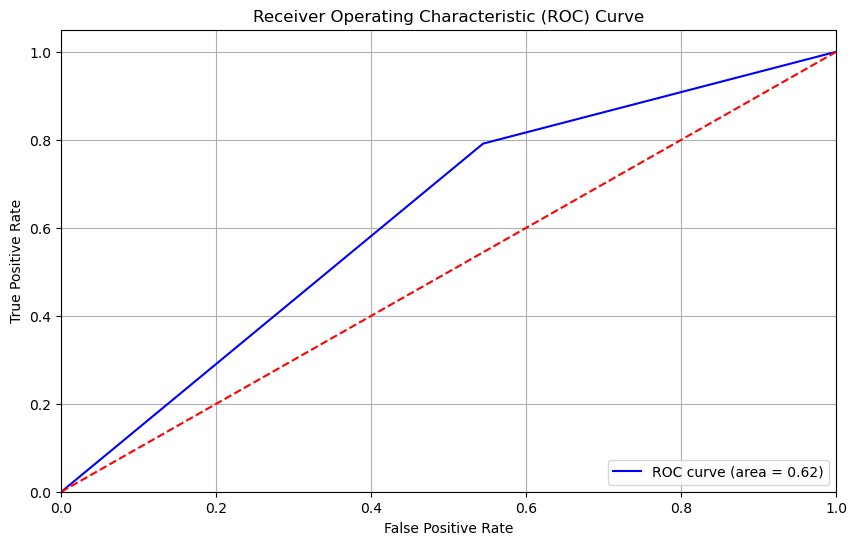

In [278]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC AUC score
roc_auc = roc_auc_score(Y_test, y_pred_custom)
print(f'ROC AUC Score: {roc_auc:.2f}')

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_custom)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

ROC_AUC Score interpretation

Bad ->  50-60%
poor -> 60% - 70%
fair -> 70% - 80%
Good -> 80% - 90%
Excellent -> 90% - 100% 

Gini coefficient: Measure to calculate inequality between Good and Bad in a population

Plot: Cumulative %Bad vs Cumulative % All

Gini coefficient = ROC_AUC_Score*2 - 1

Kolmogorov-Smirnov Coefficient: Maximum Difference between the cumulative distribution functions of 'good' and 'bad' borrowers

greater the difference better the model

In [279]:
validation_df = pd.DataFrame({
        'predicted_proba': y_pred_prob,
        'actual': Y_test.squeeze()
    })

In [280]:
validation_df['predicted'] = np.where(validation_df['predicted_proba'] >= 0.85,1,0)

In [281]:
validation_df.head()

,predicted_proba,actual,predicted
0,0.914994,1,1
1,0.881226,1,1
2,0.872536,1,1
3,0.939166,1,1
4,0.959712,1,1


In [282]:
validation_df = validation_df.sort_values('predicted_proba')

In [283]:
validation_df

,predicted_proba,actual,predicted
17206,0.457968,0,0
64110,0.466788,0,0
60440,0.467424,0,0
82572,0.503425,0,0
37396,0.505330,0,0
...,...,...,...
29205,0.991031,1,1
130535,0.991031,1,1
3729,0.991187,1,1
94717,0.991298,1,1


In [284]:
validation_df = validation_df.reset_index()

In [285]:
validation_df

,index,predicted_proba,actual,predicted
0,17206,0.457968,0,0
1,64110,0.466788,0,0
2,60440,0.467424,0,0
3,82572,0.503425,0,0
4,37396,0.505330,0,0
...,...,...,...,...
139881,29205,0.991031,1,1
139882,130535,0.991031,1,1
139883,3729,0.991187,1,1
139884,94717,0.991298,1,1


In [286]:
validation_df['Cumulative N Population'] = validation_df.index + 1
validation_df['Cumulative N Good'] = validation_df['actual'].cumsum()
validation_df['Cumulative N Bad'] = validation_df['Cumulative N Population'] - validation_df['actual'].cumsum()

In [287]:
validation_df.head()

,index,predicted_proba,actual,predicted,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,17206,0.457968,0,0,1,0,1
1,64110,0.466788,0,0,2,0,2
2,60440,0.467424,0,0,3,0,3
3,82572,0.503425,0,0,4,0,4
4,37396,0.505330,0,0,5,0,5


In [288]:
validation_df['Cumulative Perc Population'] = validation_df['Cumulative N Population'] / (validation_df.shape[0])
validation_df['Cumulative Perc Good'] = validation_df['Cumulative N Good'] / validation_df['actual'].sum()
validation_df['Cumulative Perc Bad'] = validation_df['Cumulative N Bad'] / (validation_df.shape[0] - validation_df['actual'].sum())

In [289]:
validation_df

,index,predicted_proba,actual,predicted,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,17206,0.457968,0,0,1,0,1,0.000007,0.000000,0.000065
1,64110,0.466788,0,0,2,0,2,0.000014,0.000000,0.000130
2,60440,0.467424,0,0,3,0,3,0.000021,0.000000,0.000195
3,82572,0.503425,0,0,4,0,4,0.000029,0.000000,0.000260
4,37396,0.505330,0,0,5,0,5,0.000036,0.000000,0.000325
...,...,...,...,...,...,...,...,...,...,...
139881,29205,0.991031,1,1,139882,124500,15382,0.999971,0.999968,1.000000
139882,130535,0.991031,1,1,139883,124501,15382,0.999979,0.999976,1.000000
139883,3729,0.991187,1,1,139884,124502,15382,0.999986,0.999984,1.000000
139884,94717,0.991298,1,1,139885,124503,15382,0.999993,0.999992,1.000000


Text(0.5, 1.0, 'Gini')

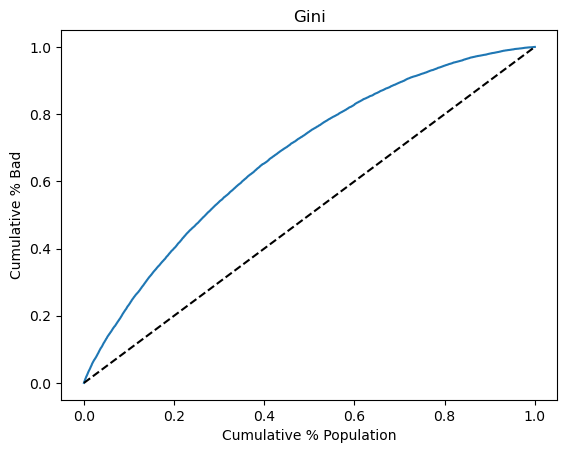

In [290]:
plt.plot(validation_df['Cumulative Perc Population'], validation_df['Cumulative Perc Bad'])
plt.plot(validation_df['Cumulative Perc Population'], validation_df['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [291]:
Gini = roc_auc * 2 - 1
Gini

0.24702083189199664

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

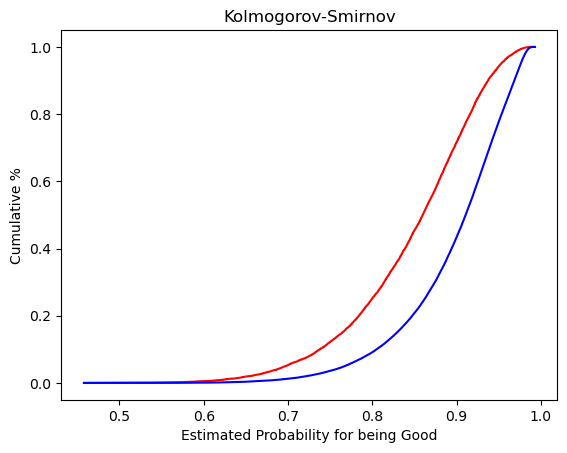

In [292]:
plt.plot(validation_df['predicted_proba'], validation_df['Cumulative Perc Bad'], color = 'r')
plt.plot(validation_df['predicted_proba'], validation_df['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [293]:
KS = max(validation_df['Cumulative Perc Bad'] - validation_df['Cumulative Perc Good'])
KS

0.2866935171821207

https://ginimachine.com/academia-post/ml-model-performance-evaluation/


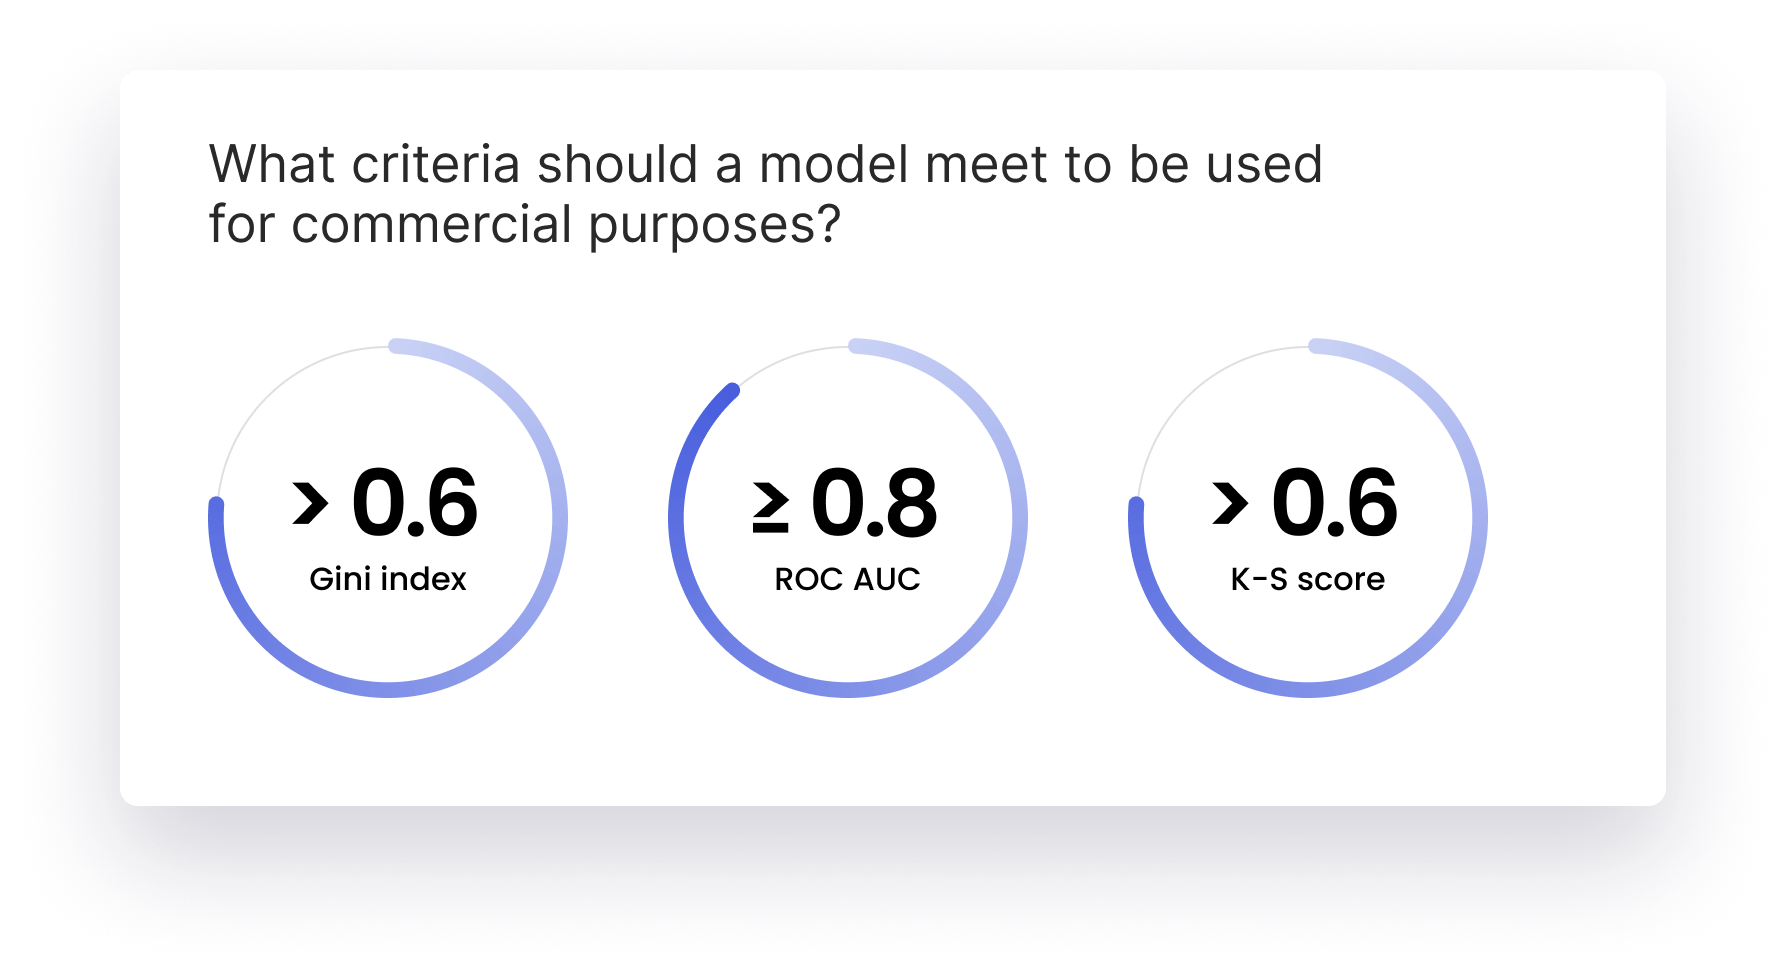

In [294]:
X_train_cleaned.columns.to_list()

['grade:A',
 'grade:B',
 'grade:C',
 'grade:D',
 'grade:E',
 'grade:F',
 'initial_list_status:w',
 'purpose:house_other_ren_en_med',
 'purpose:wedding_vaccation_debt',
 'purpose:home_improv_major_purchase_car_credit_card',
 'addr_state:NM_VA',
 'addr_state:OK_TN_MO_LA_MD_NC',
 'addr_state:UT_KY_AZ_NJ',
 'addr_state:AR_MI_PA_OH_MN',
 'addr_state:RI_MA_DE_SD_IN',
 'addr_state:GA_WA_OR',
 'addr_state:WI_MT',
 'addr_state:IL_CT',
 'addr_state:KS_SC_CO_VT_AK_MS',
 'addr_state:WV_NH_WY_DC_ME_ID',
 'term:36',
 'annual_inc:30K-40K',
 'annual_inc:40K-50K',
 'annual_inc:50K-60K',
 'annual_inc:60K-70K',
 'annual_inc:70K-80K',
 'annual_inc:80K-90K',
 'annual_inc:90K-100K',
 'annual_inc:100K-120K',
 'annual_inc:120K-140K',
 'annual_inc:>140K',
 'delinq_2yrs:0',
 'delinq_2yrs:1-3',
 'inq_last_6mths:0',
 'inq_last_6mths:1-2',
 'inq_last_6mths:3-6',
 'mths_since_earliest_cr_line:141-164',
 'mths_since_earliest_cr_line:165-247',
 'mths_since_earliest_cr_line:248-270',
 'mths_since_earliest_cr_line:271-